In [1]:
from src.ga.chromosome.vent_hole import VentHole
from src.ga.gene.shape.shape_variations import (
    donut_params,
    circle_params,
    triangle_params,
    wing_params,
    hole_params,
    trapezoid_params,
    double_parabolic_params,
    ray_params
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)
from src.ga.gene.shape.shape_gene import ShapeGene
from src.ga.gene.pattern.pattern_gene import PatternGene

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

# Chromosome generation test

In [2]:
from random import choice

vent_list: list[VentHole] = []

COUNT = 100
SCALE = 10**20
RAND_SHAPE = [
    donut_params,
    circle_params,
    triangle_params,
    wing_params,
    hole_params,
    trapezoid_params,
    double_parabolic_params,
    ray_params

]
RAND_PATTERN = [circular_params, corn_params, grid_params]

shape_genes: list[ShapeGene] = []
pattern_genes: list[PatternGene] = []

# RESET STORAGE
ShapeGene.pdf_storage.reset()
PatternGene.pdf_storage.reset()
ShapeGene.parameter_storage.reset()

# GENERATE RANDOM GENES
for i in range(COUNT):
    shape_selection = choice(RAND_SHAPE)
    pattern_selection = choice(RAND_PATTERN)

    shape_gene = ShapeGene(shape_selection(SCALE), gene_id=i)
    pattern_gene = PatternGene(pattern_selection(SCALE), gene_id=i)

    shape_gene.mutate("rand")
    pattern_gene.mutate("rand")

    pattern_genes.append(pattern_gene)
    shape_genes.append(shape_gene)

# SAVE GENES
ShapeGene.pdf_storage.save()
PatternGene.pdf_storage.save()
ShapeGene.parameter_storage.save()

# MUTATE GENES
for i in range(COUNT):
    rand_vent = VentHole(
        vent_id=i,
        gene_tuple=(
            shape_genes[i],
            pattern_genes[i],
        ),
        pattern_bound=((-50 * SCALE, 50 * SCALE), (-50 * SCALE, 50 * SCALE)),
    )
    rand_vent.mutate_genes()

    vent_list.append(rand_vent)


ShapeGene.pdf_storage.save()
PatternGene.pdf_storage.save()
ShapeGene.parameter_storage.save()

[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[Storage]: JSON data

# Crossover test

In [3]:
# Crossover
from src.ga.p4_crossover.behaviors import (
    one_point_crossover,
    two_point_crossover,
    uniform_crossover,
)

child_vent_list: list[VentHole] = []

for i in range(COUNT - 1):
    child_vent = vent_list[i].crossover(
        one_point_crossover,
        # two_point_crossover,
        # uniform_crossover,
        vent_list[i + 1],
    )

    child_vent_list.append(child_vent)

# Visualization test

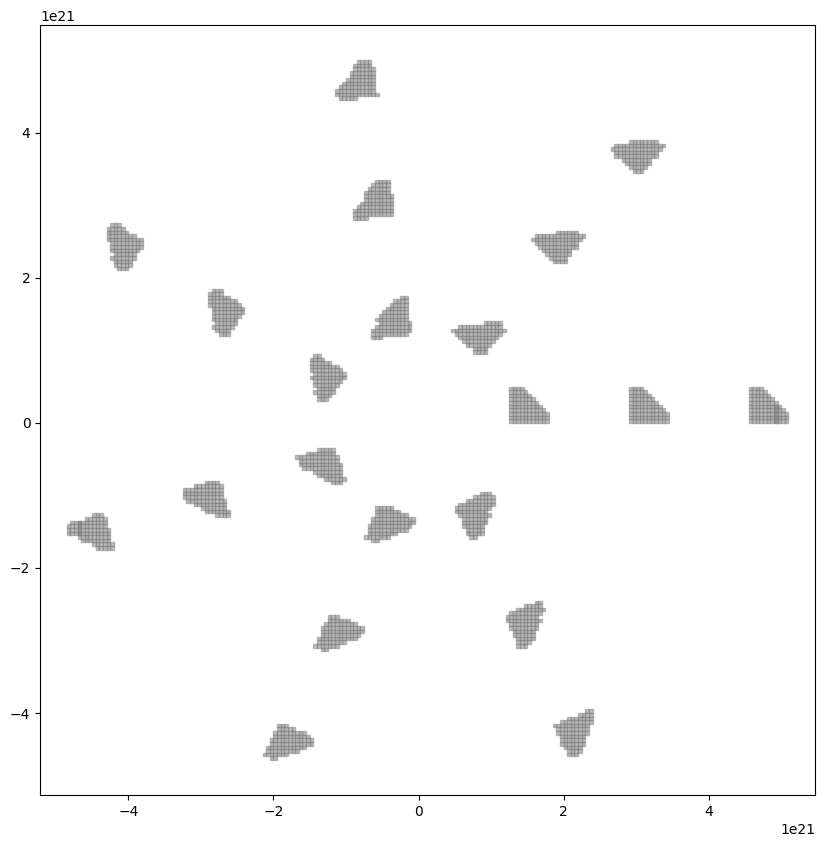

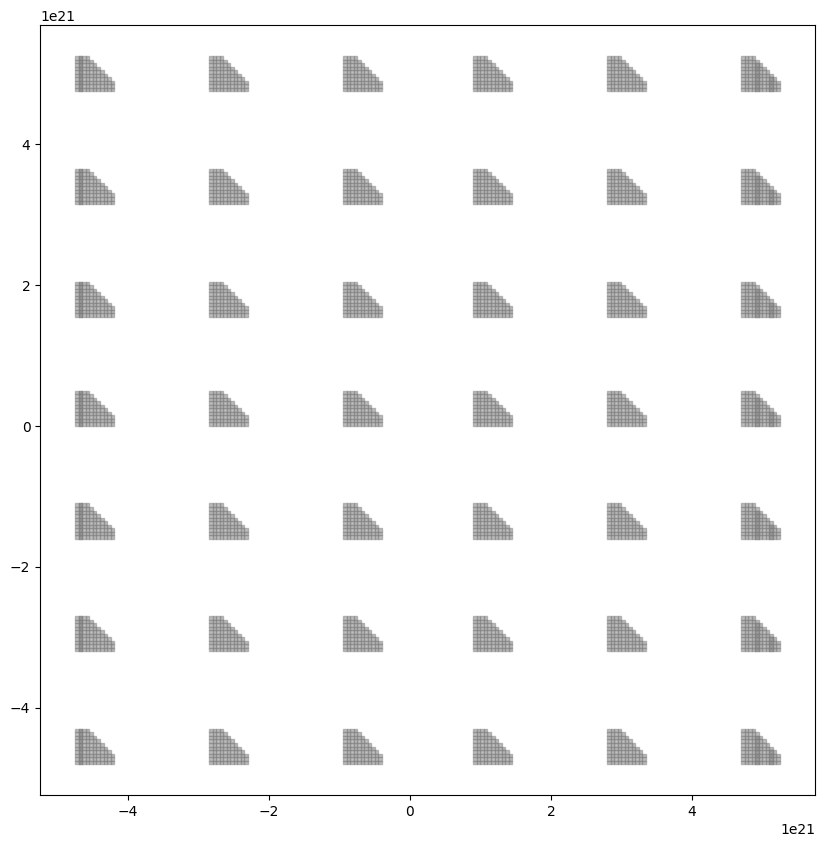

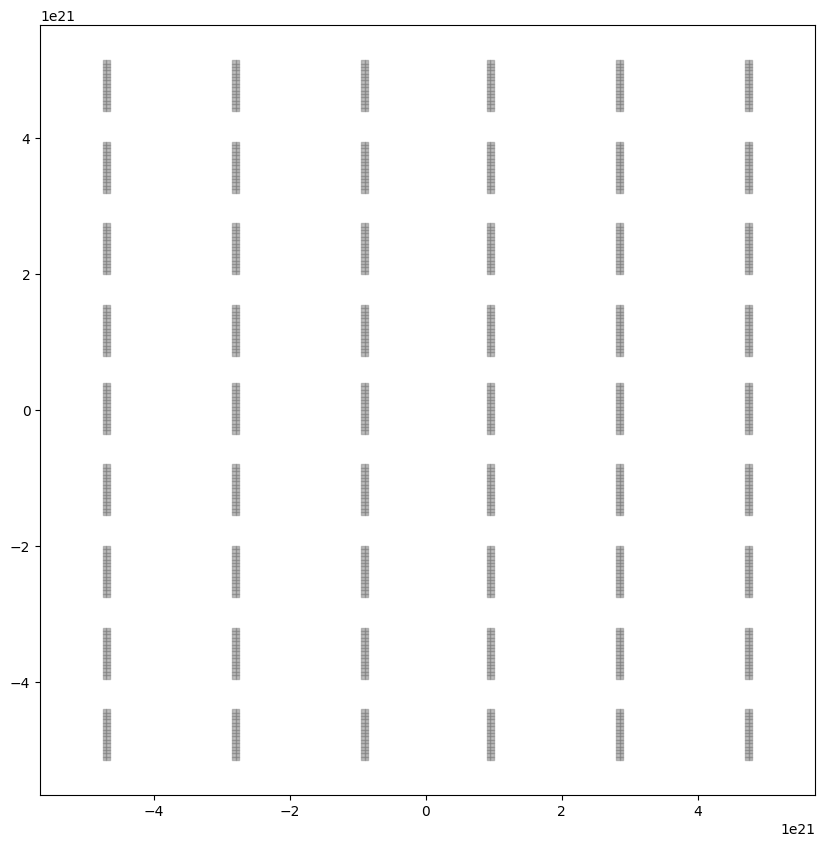

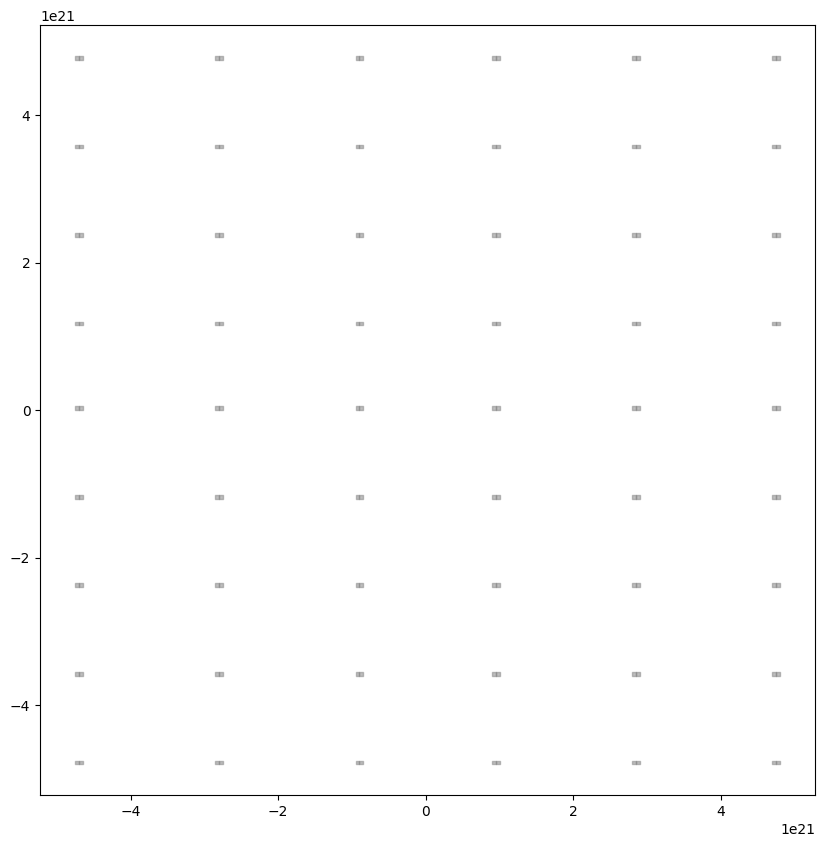

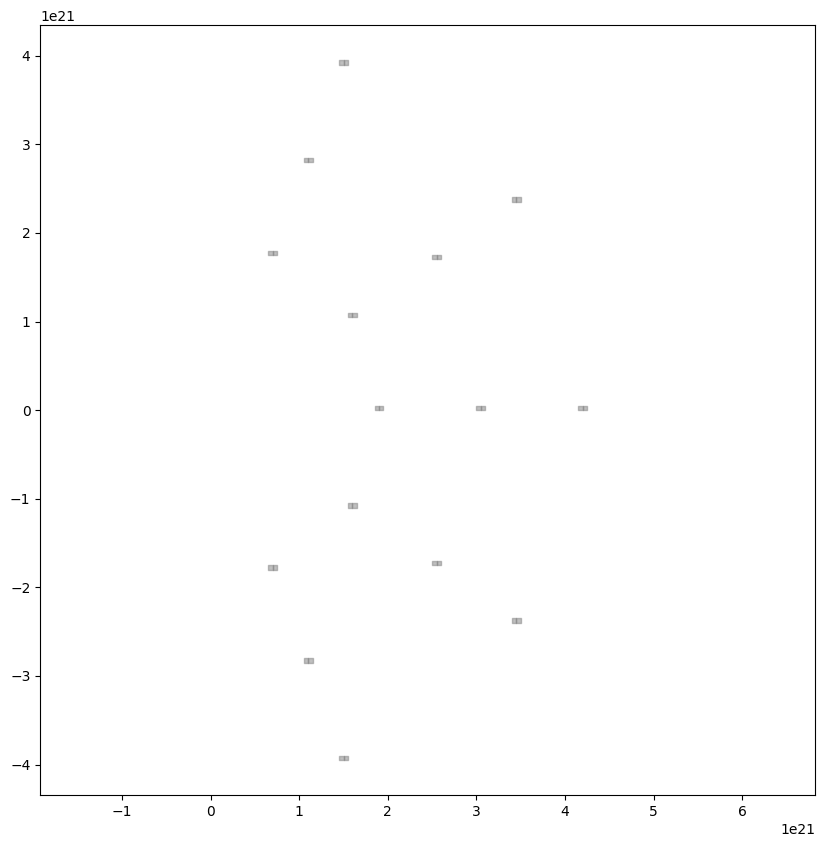

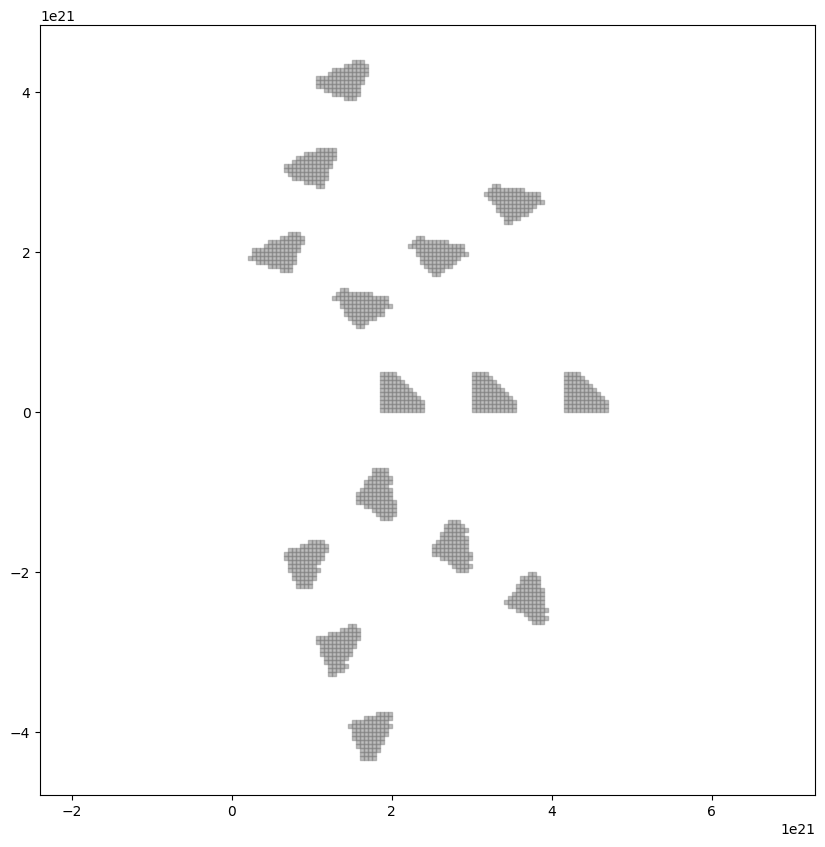

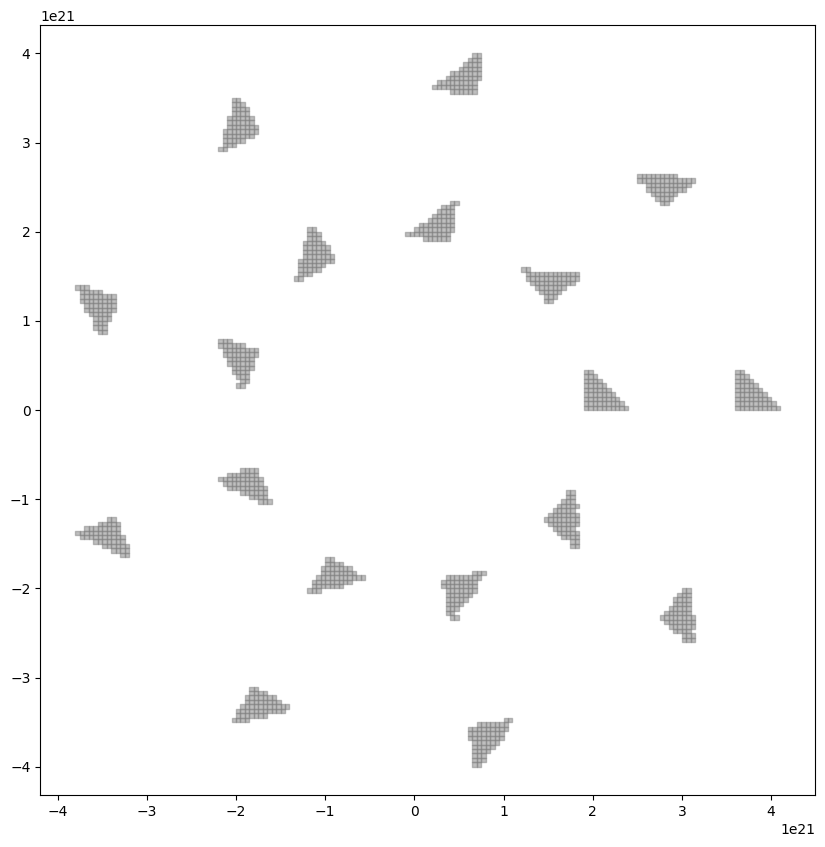

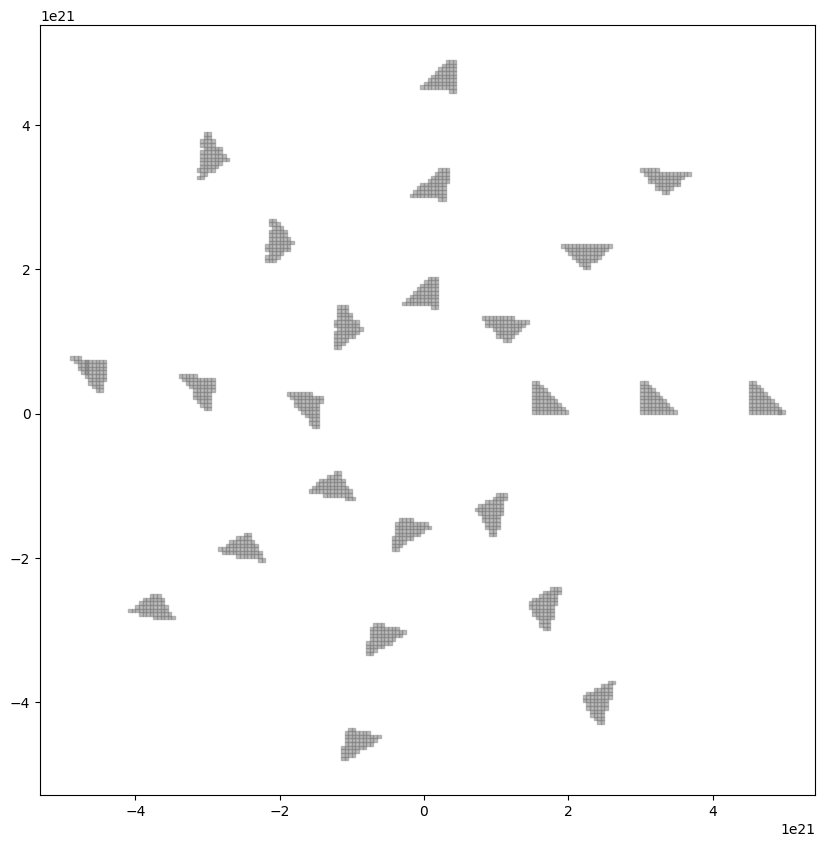

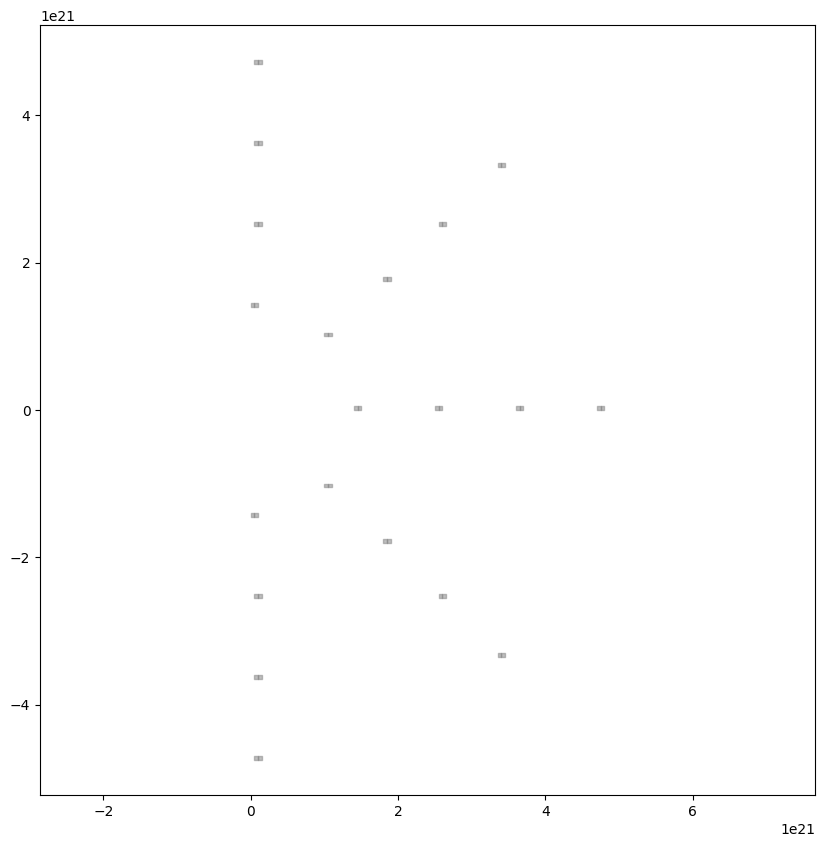

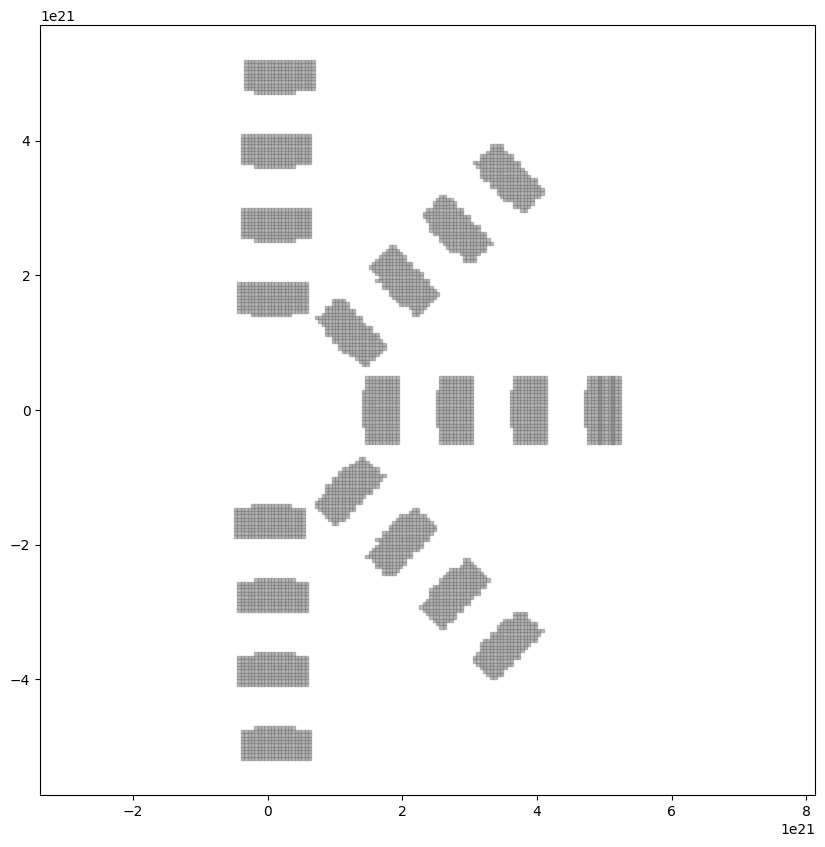

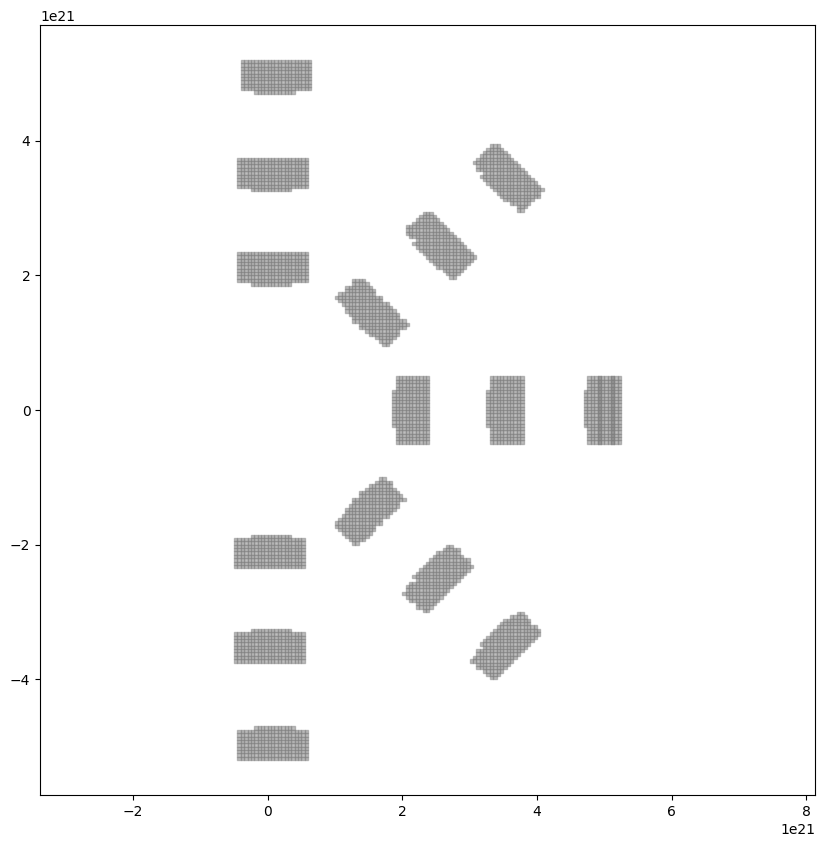

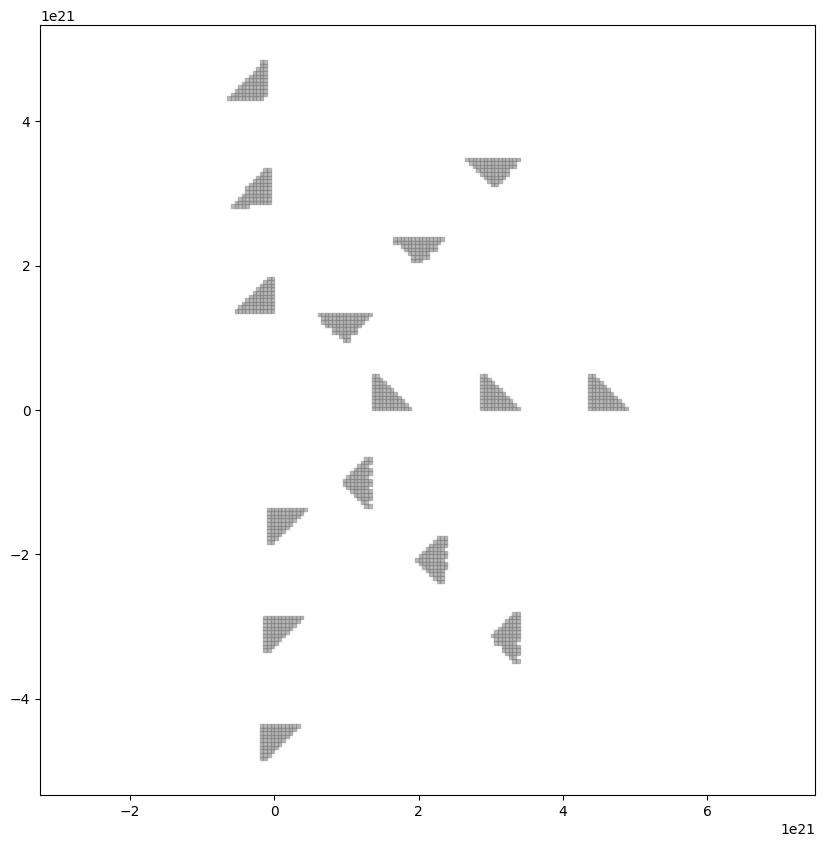

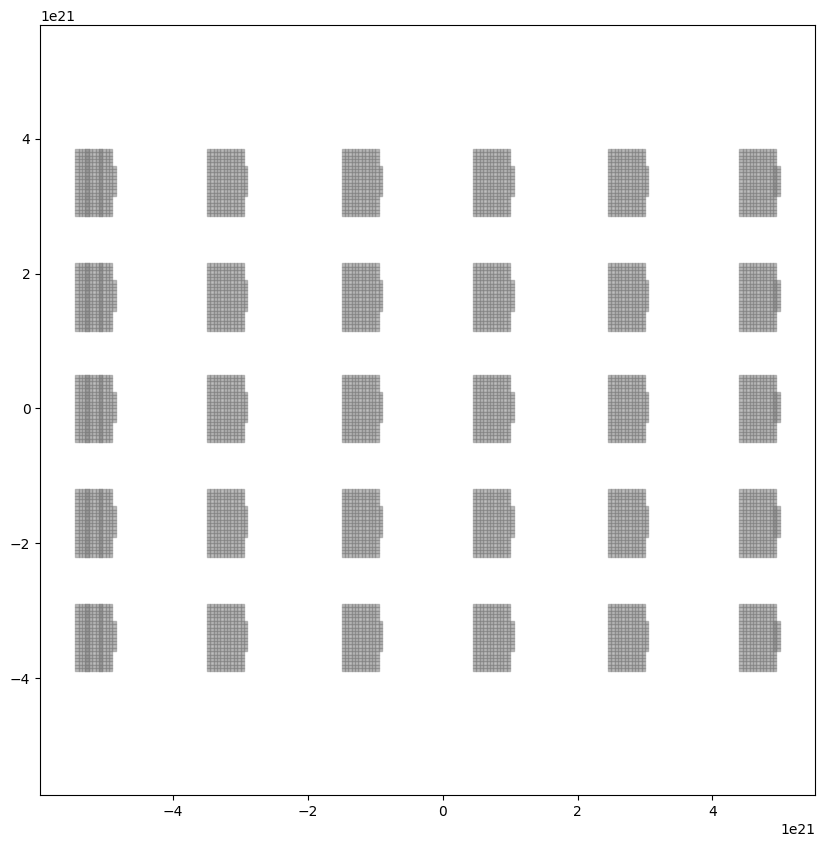

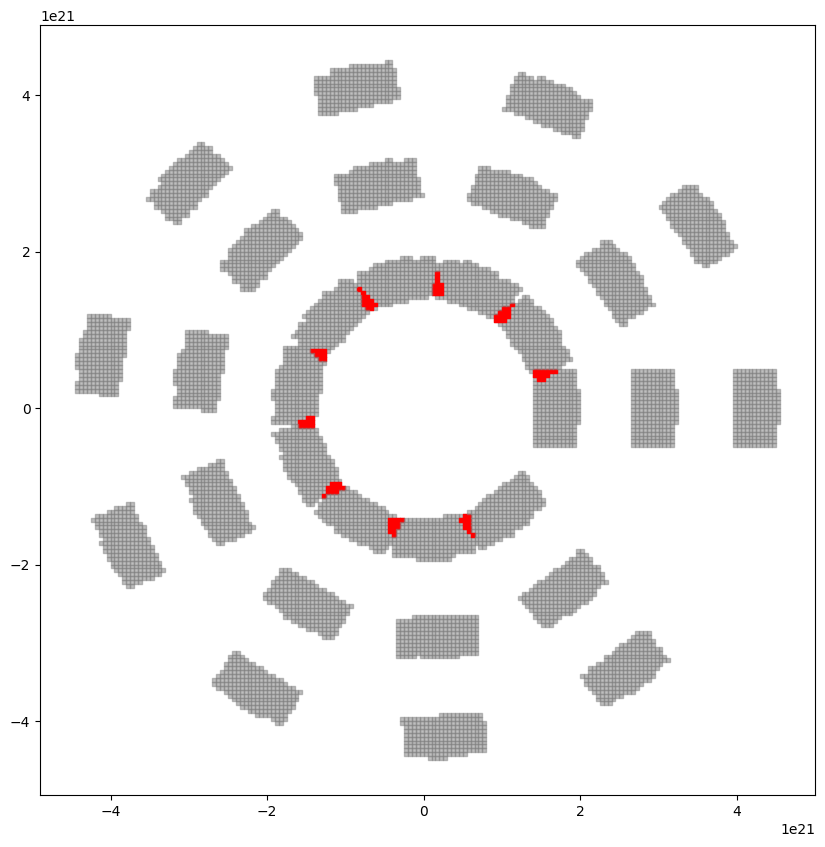

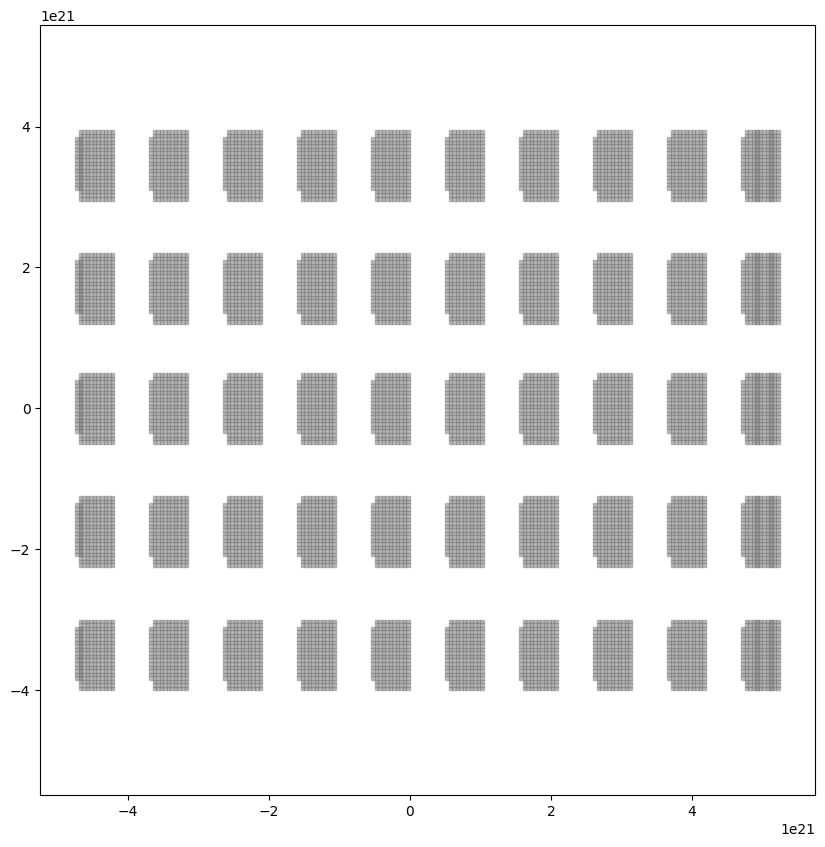

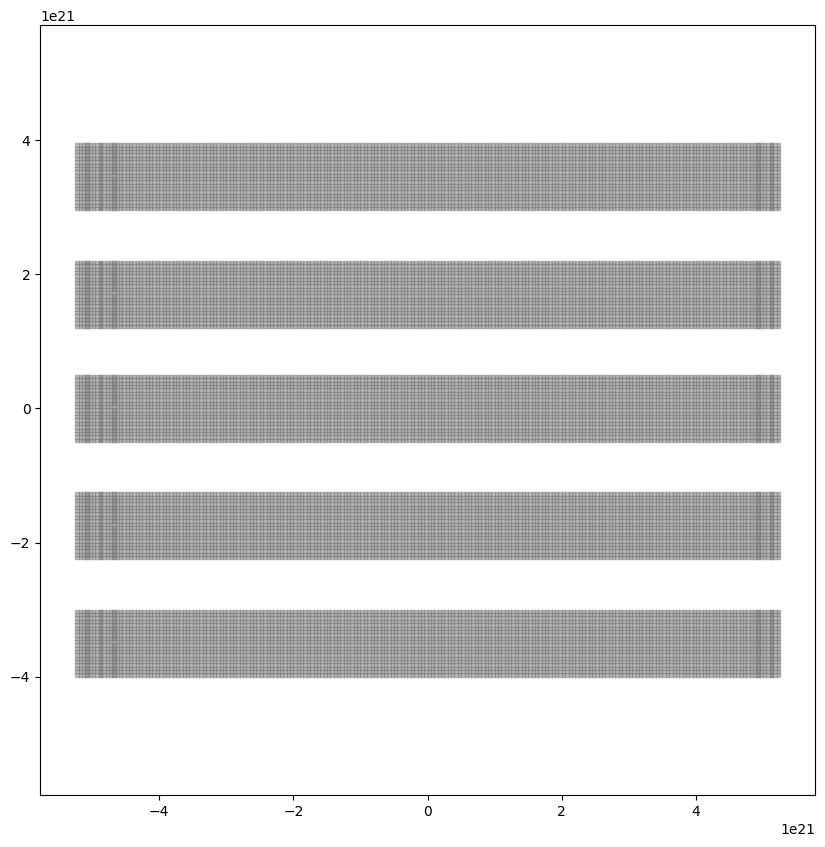

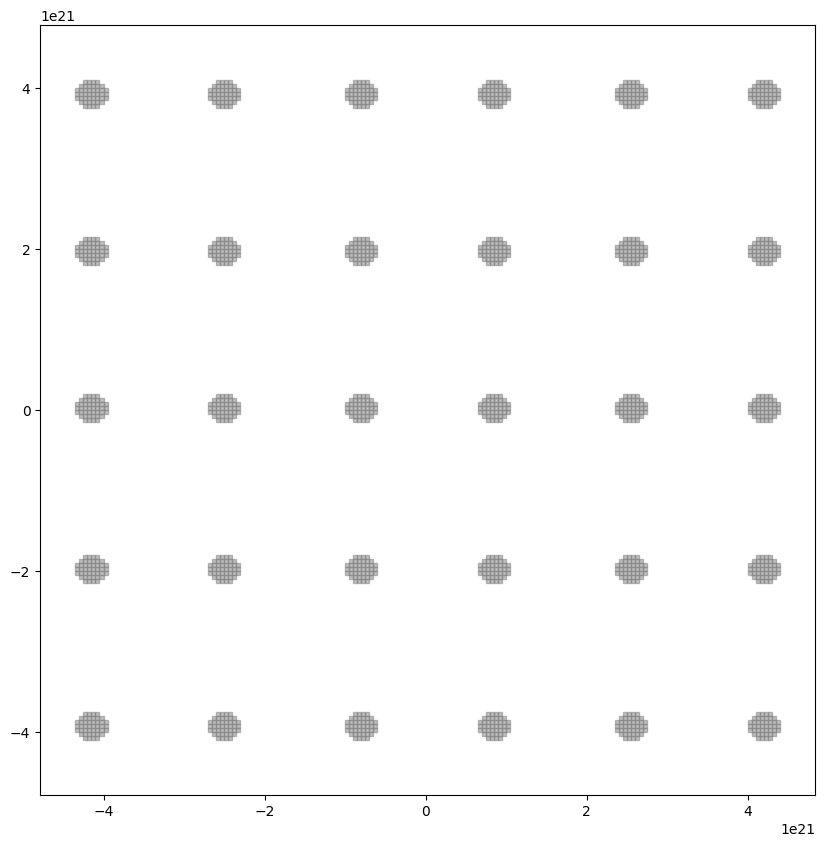

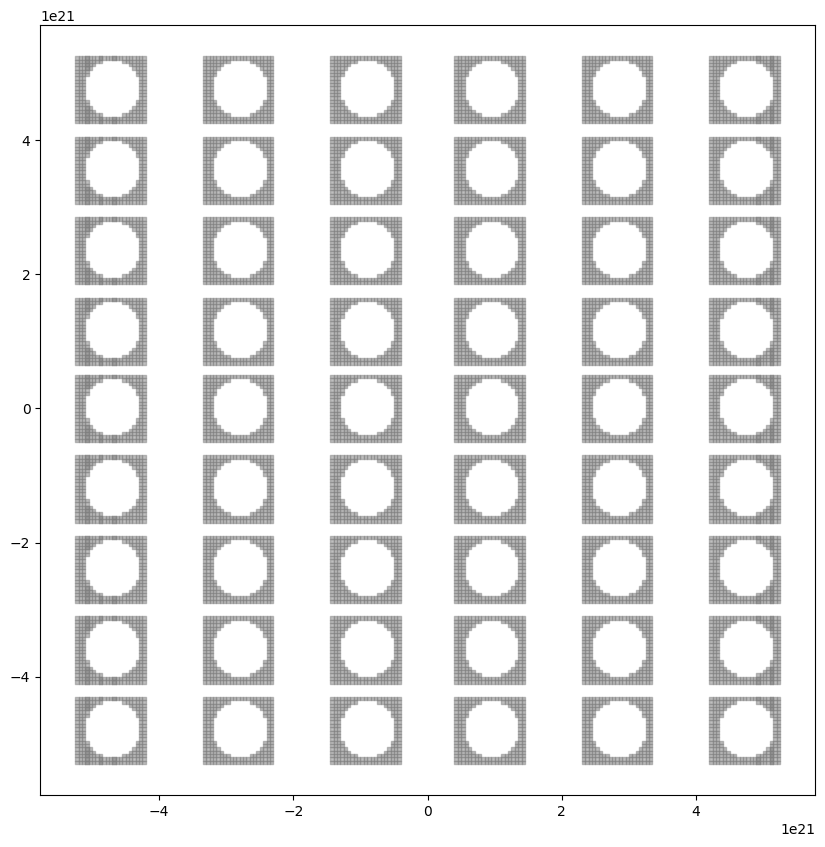

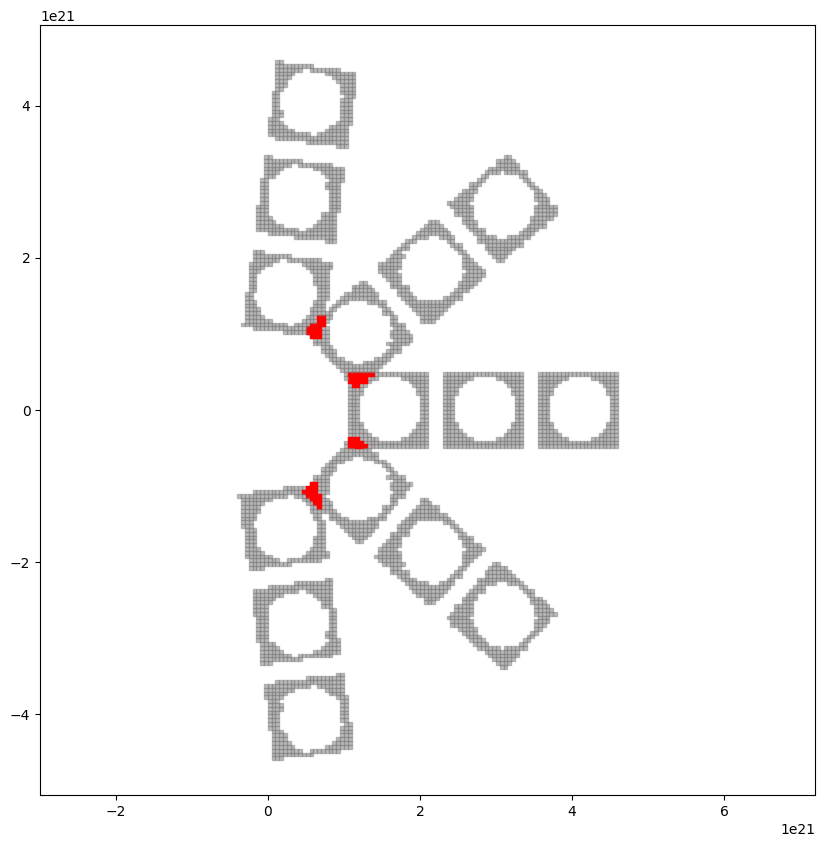

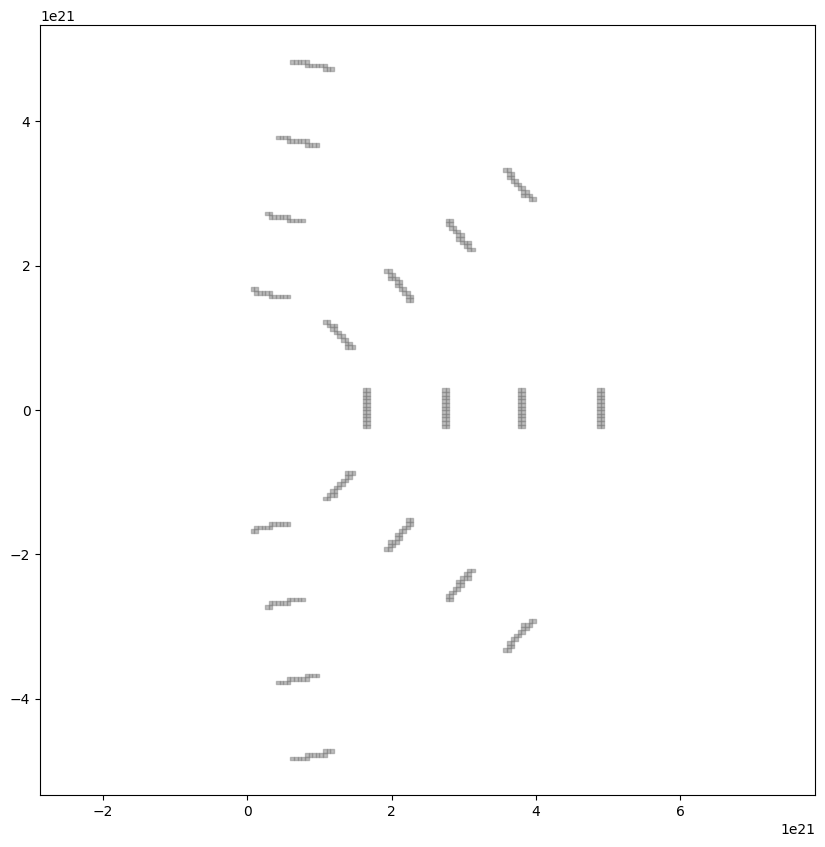

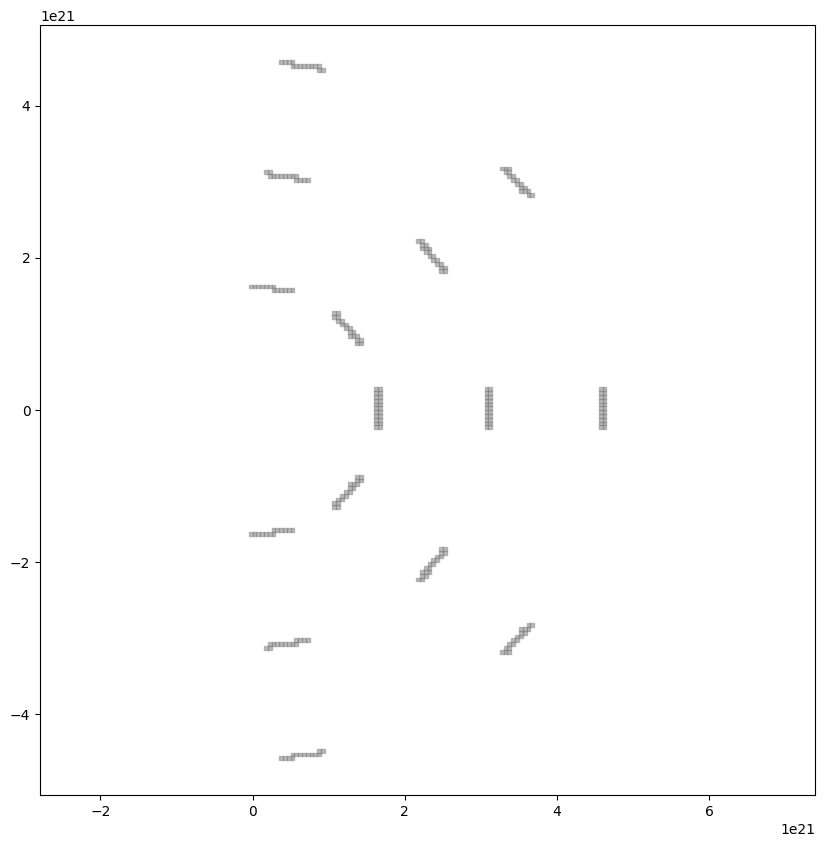

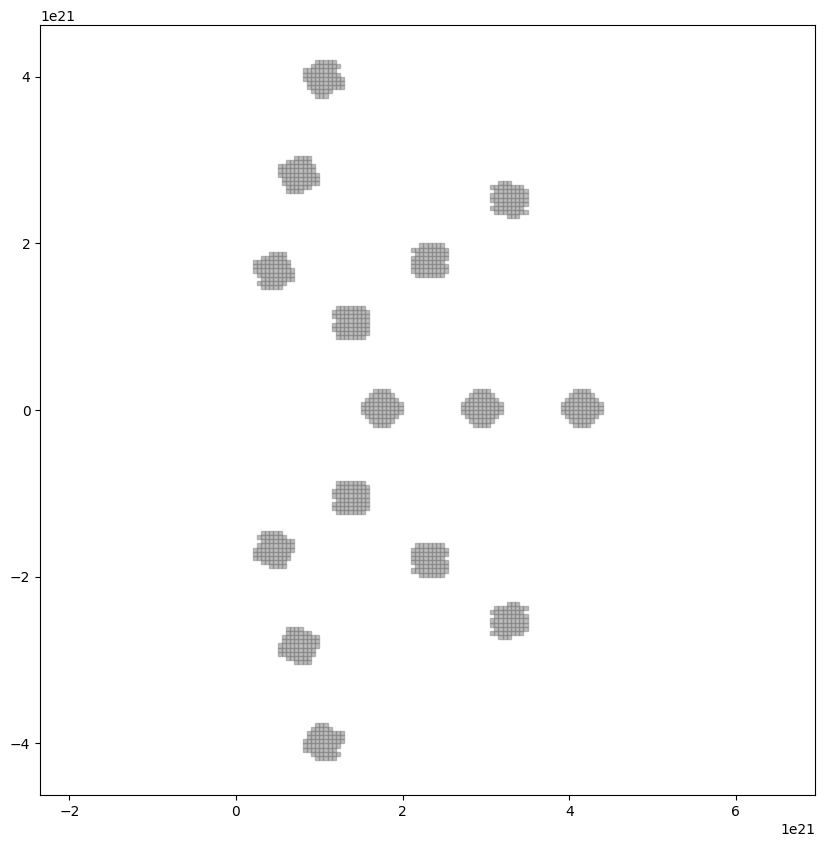

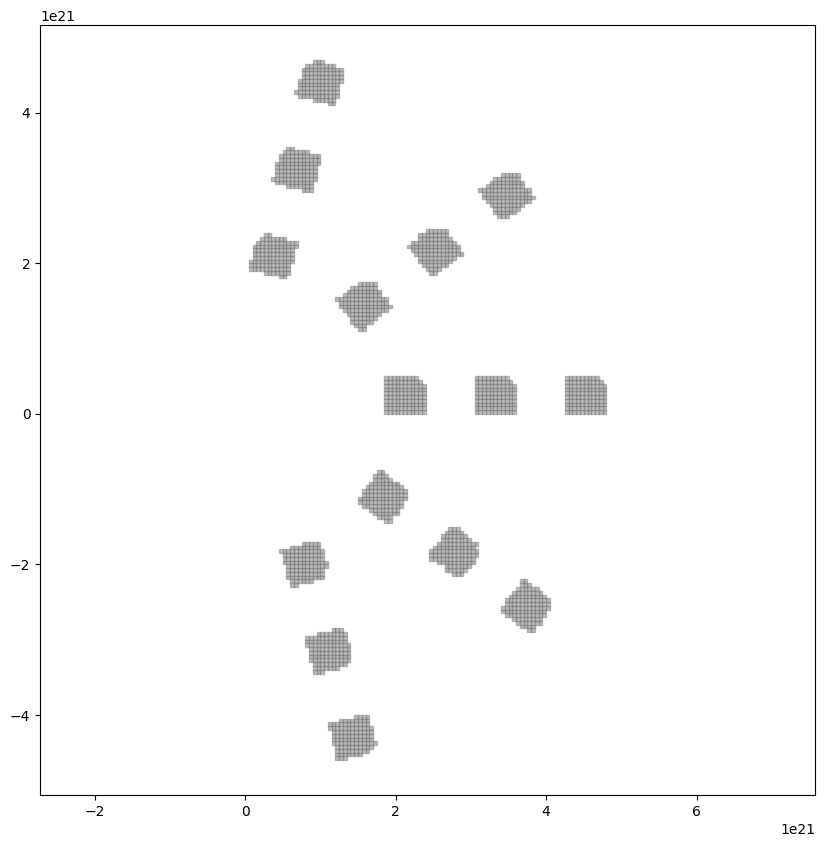

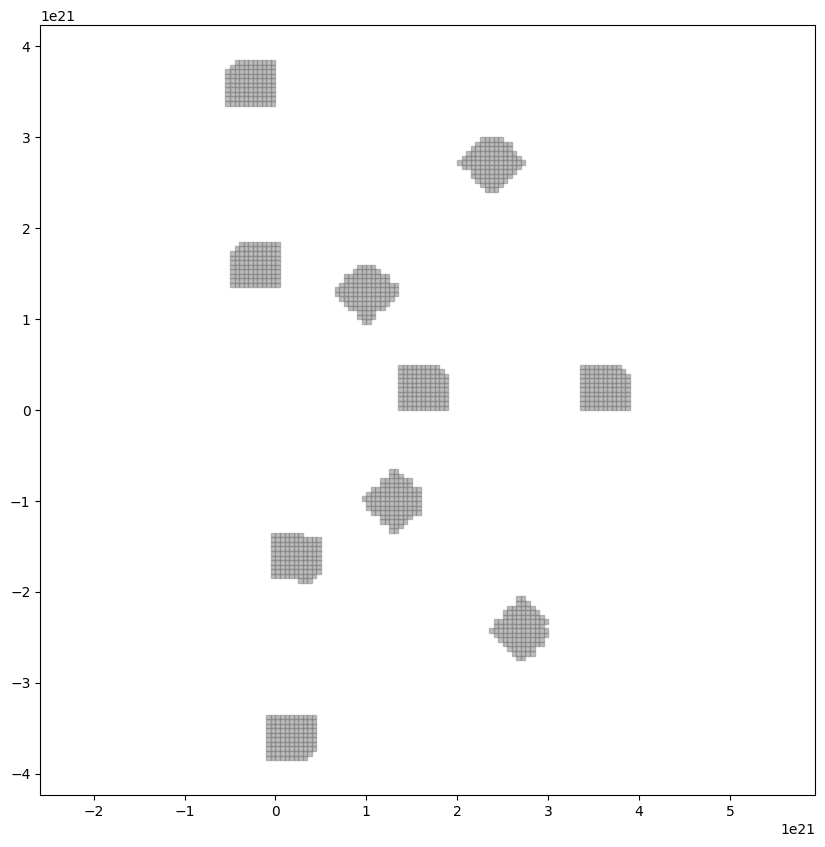

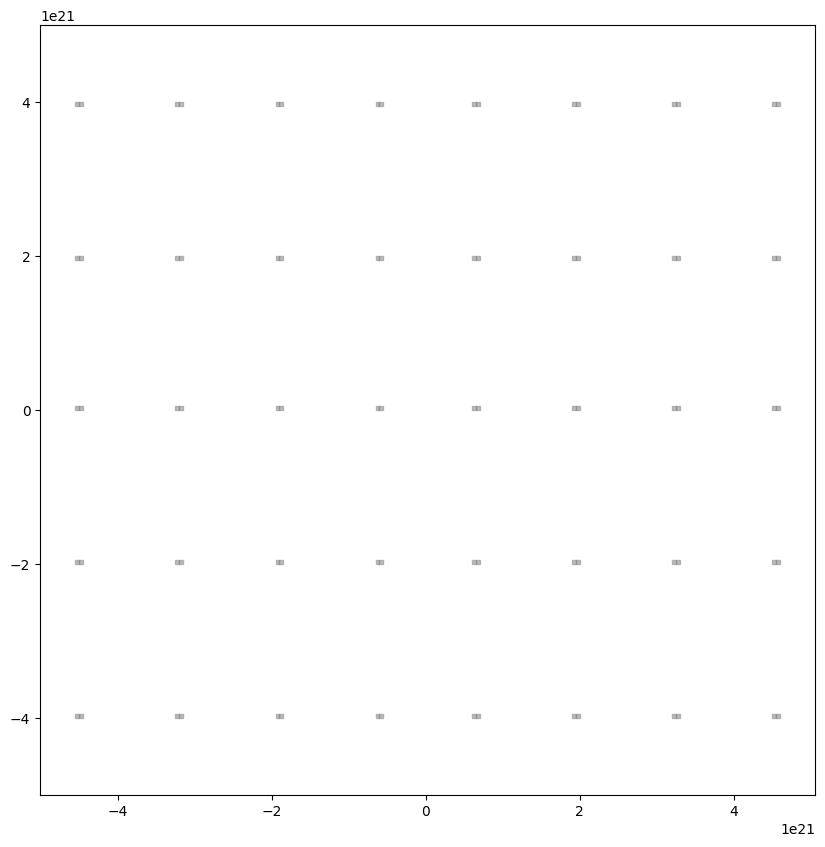

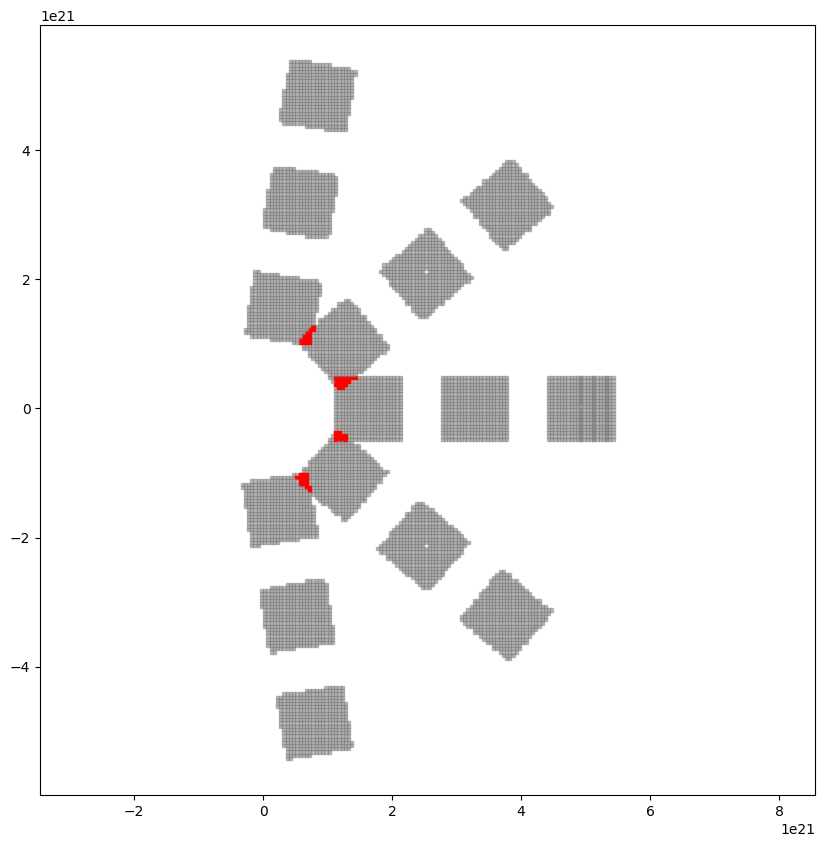

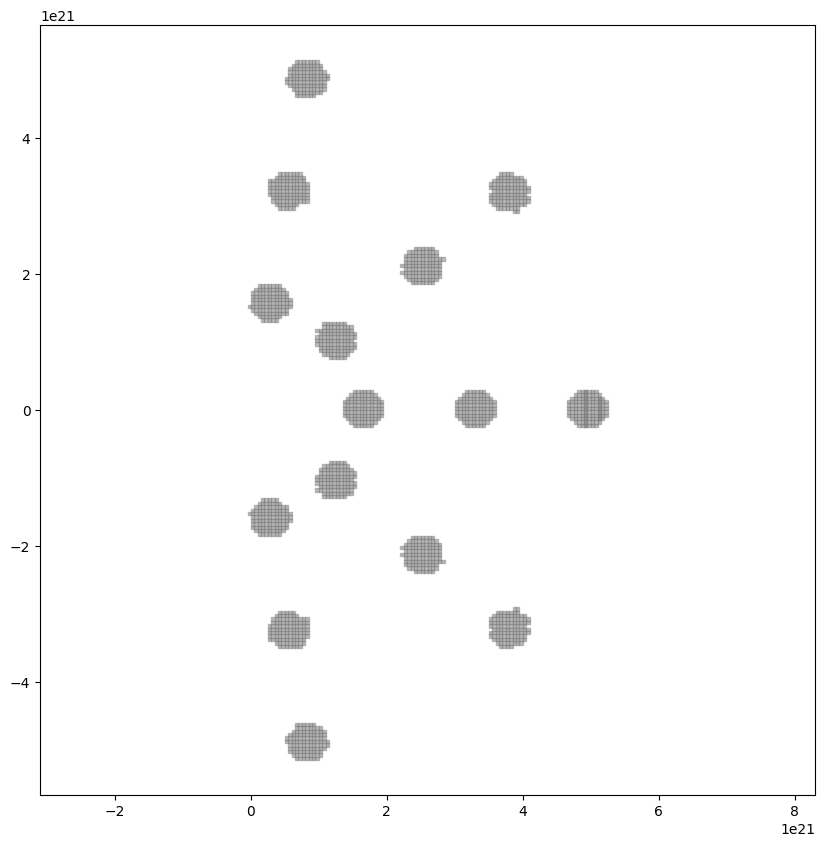

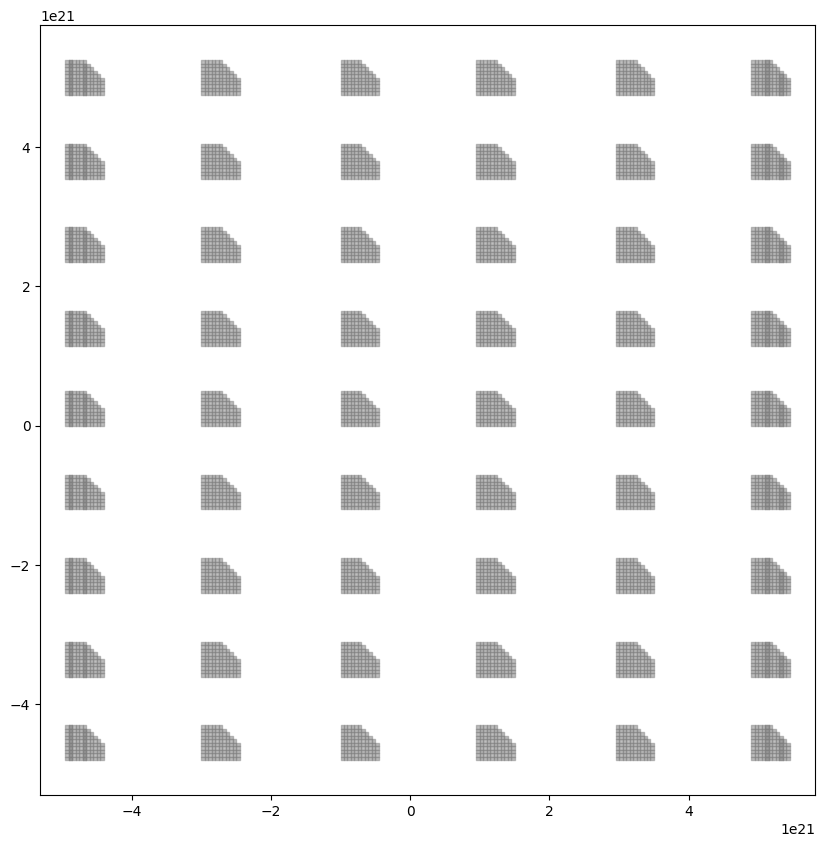

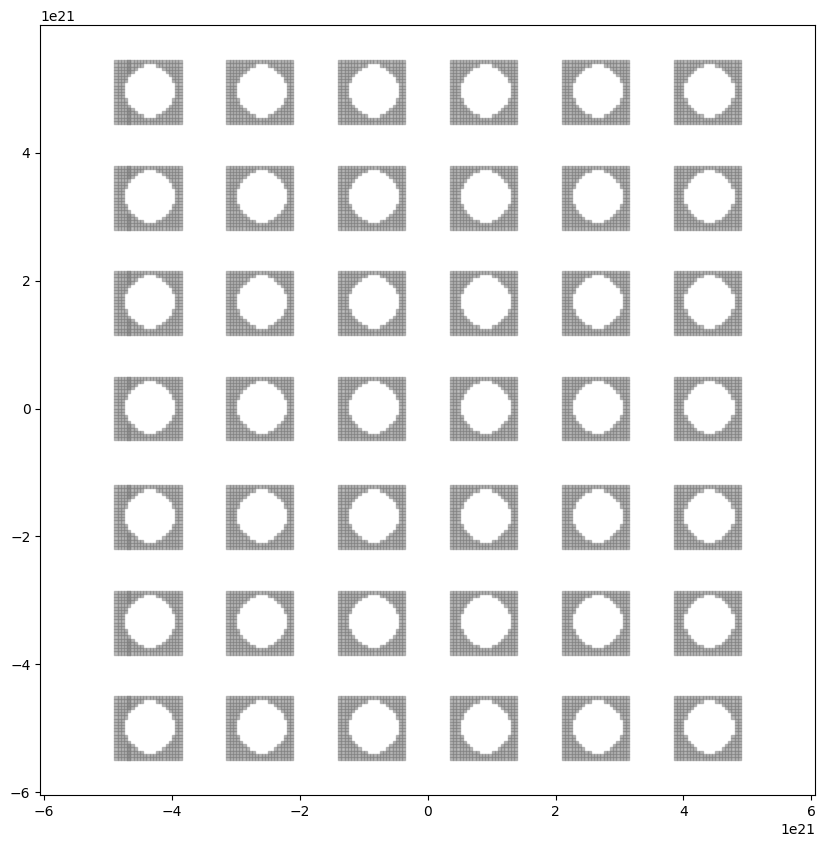

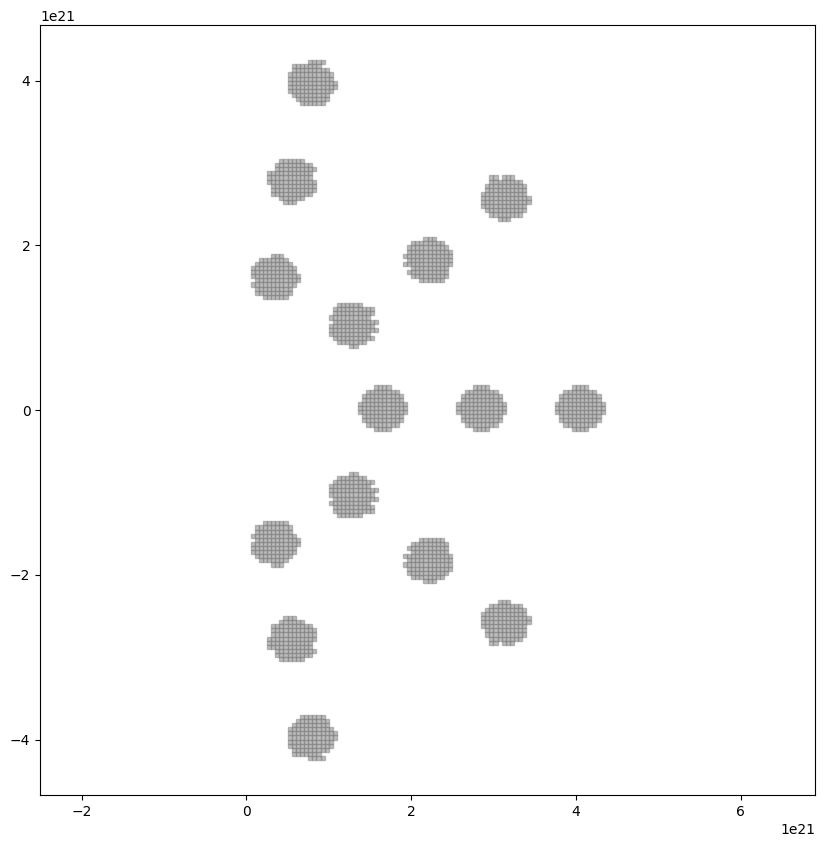

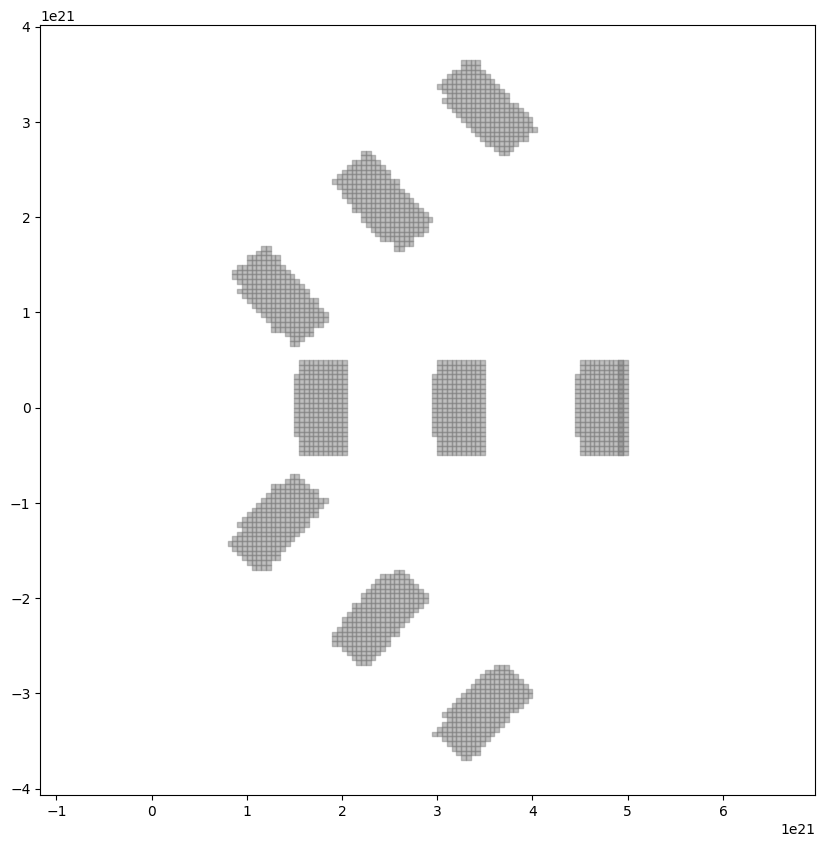

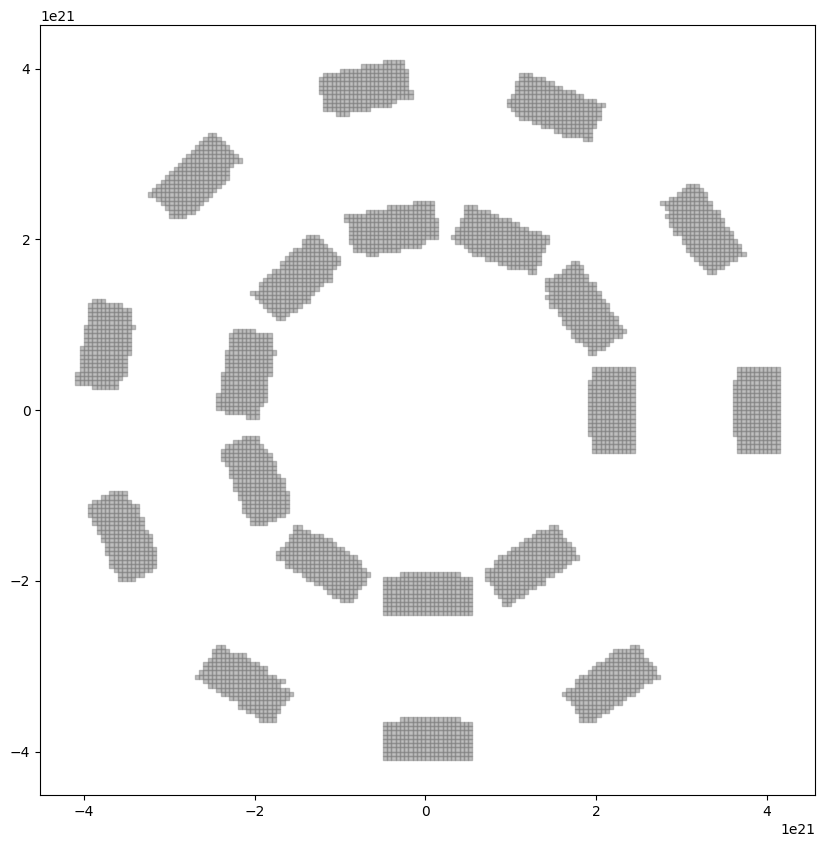

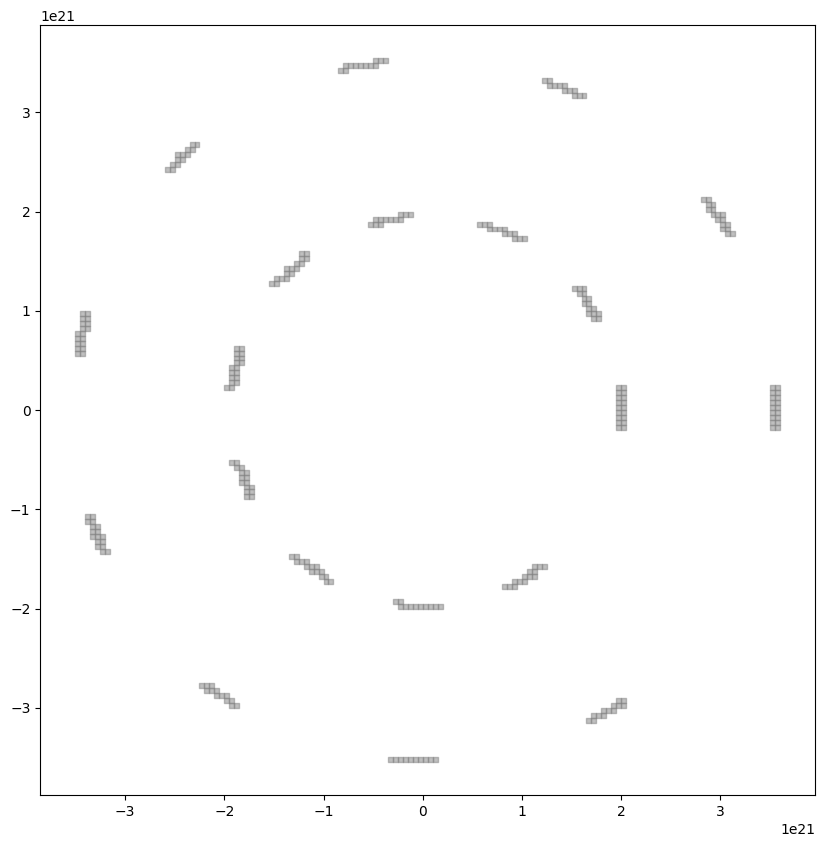

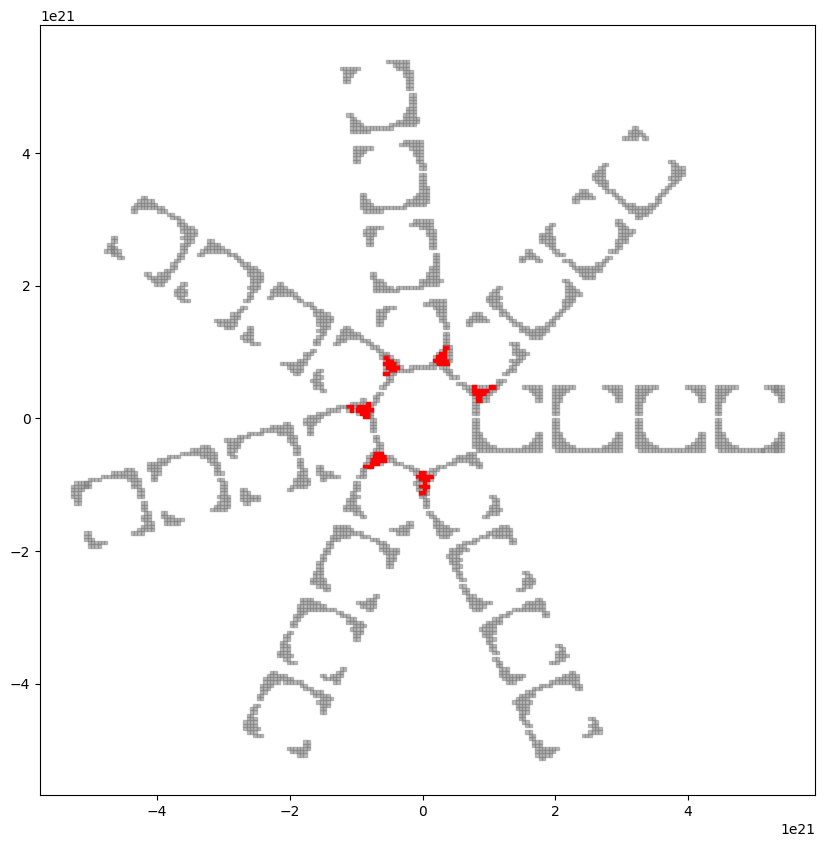

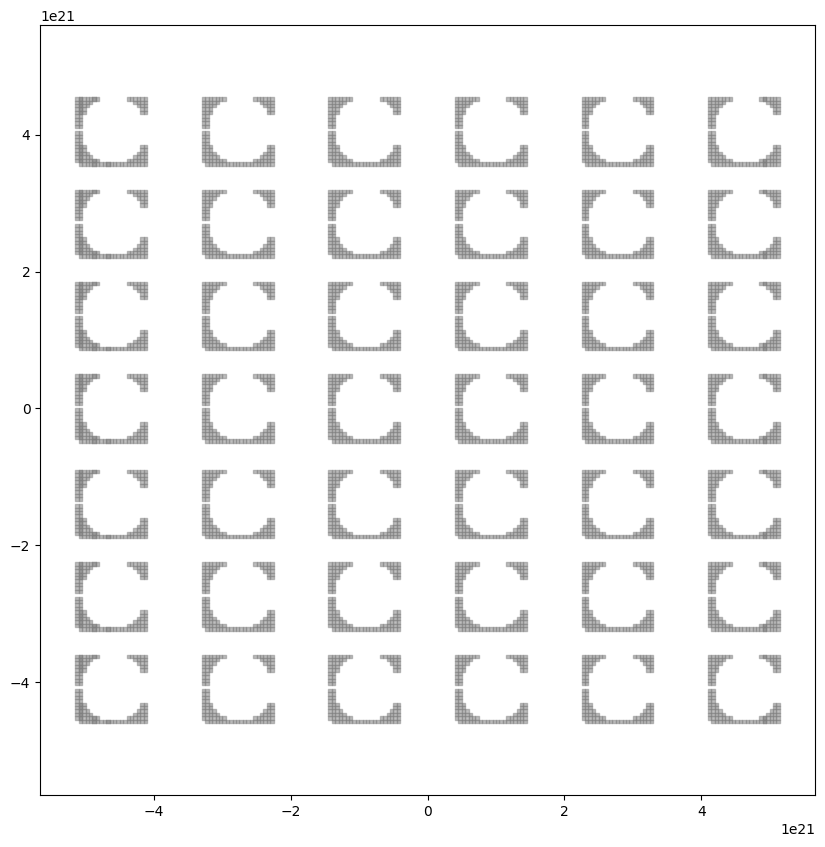

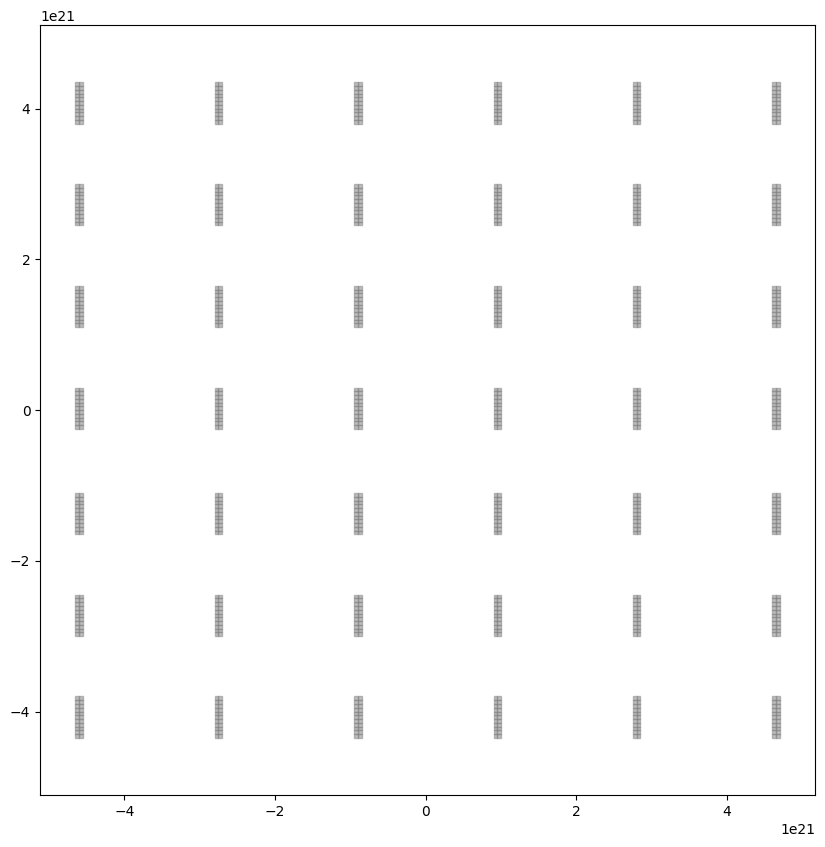

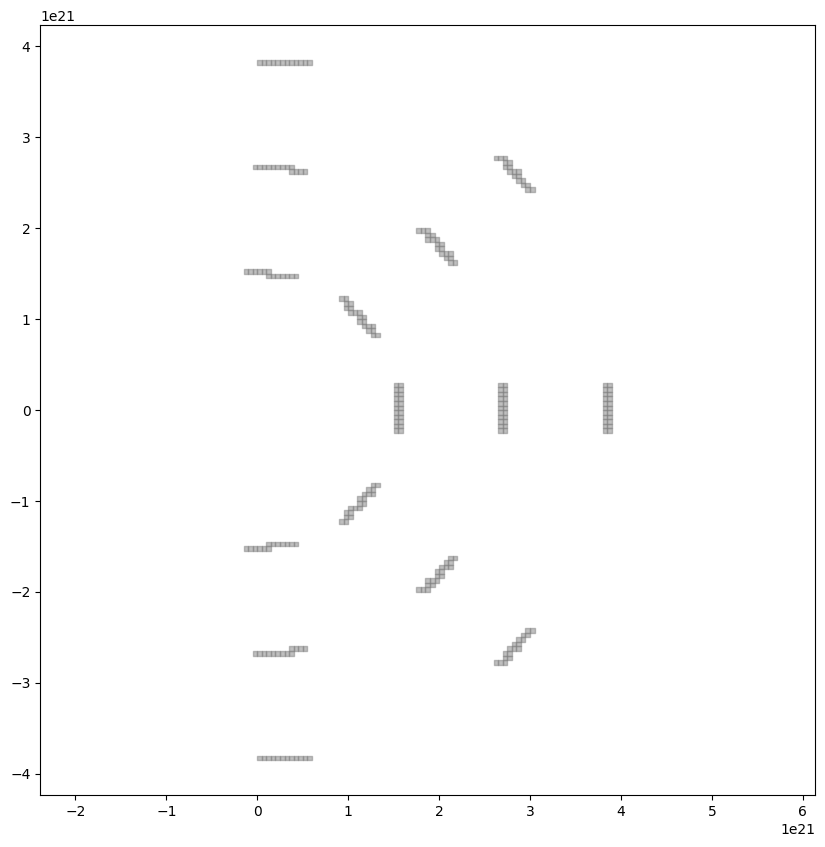

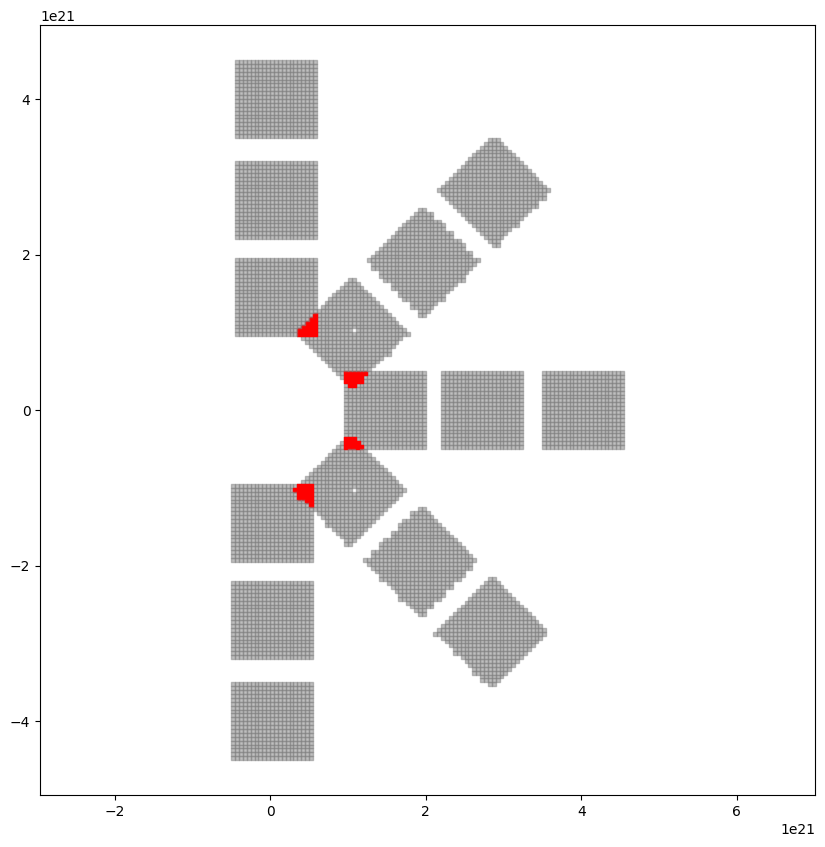

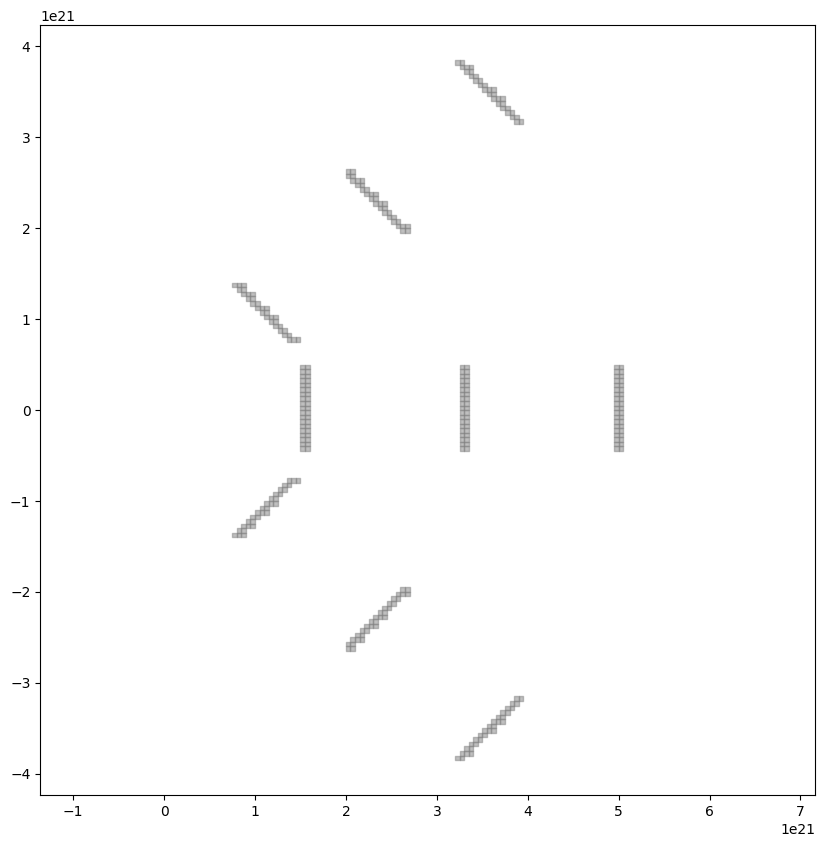

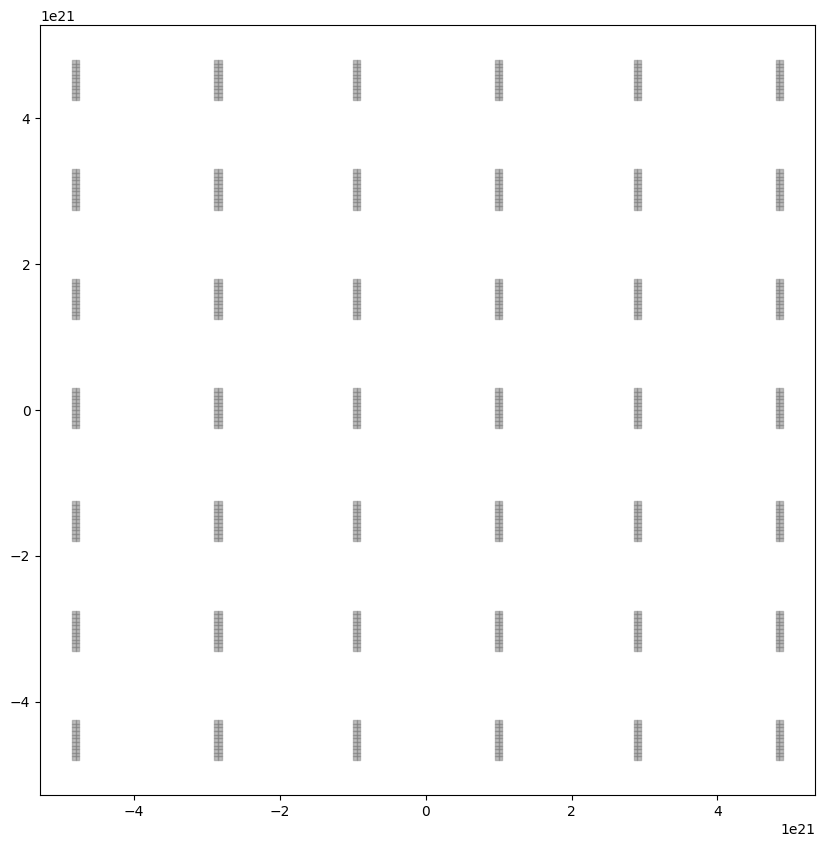

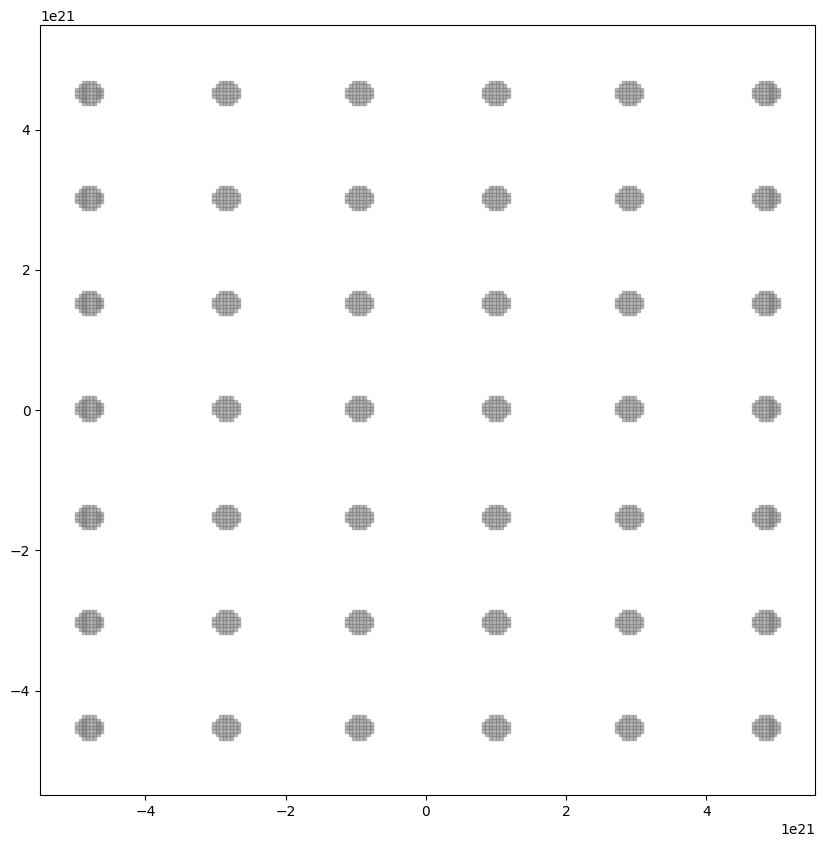

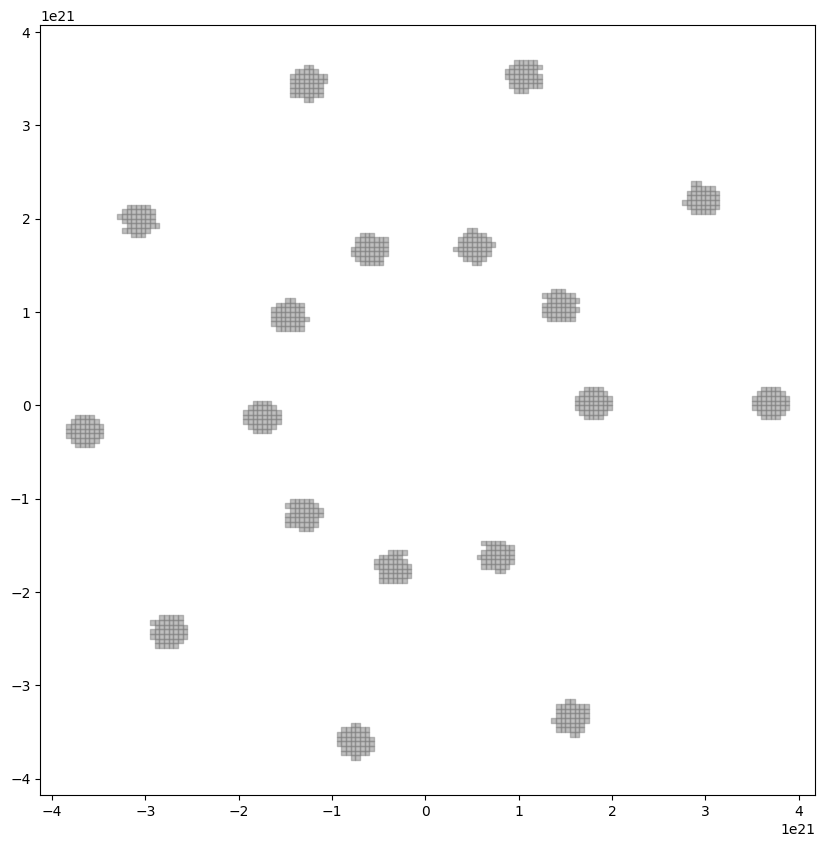

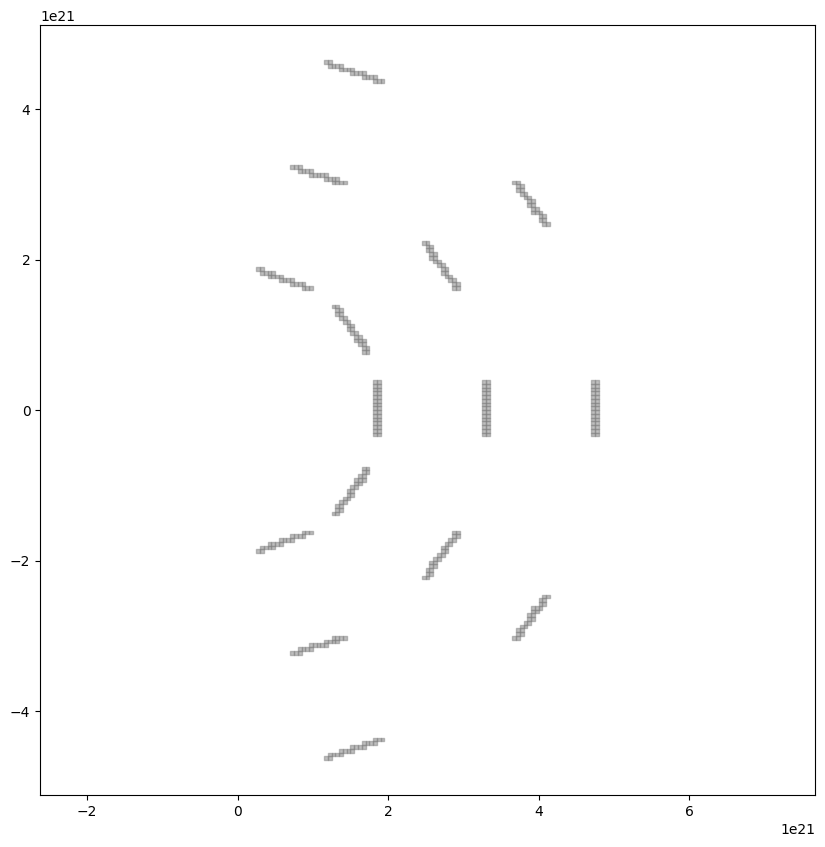

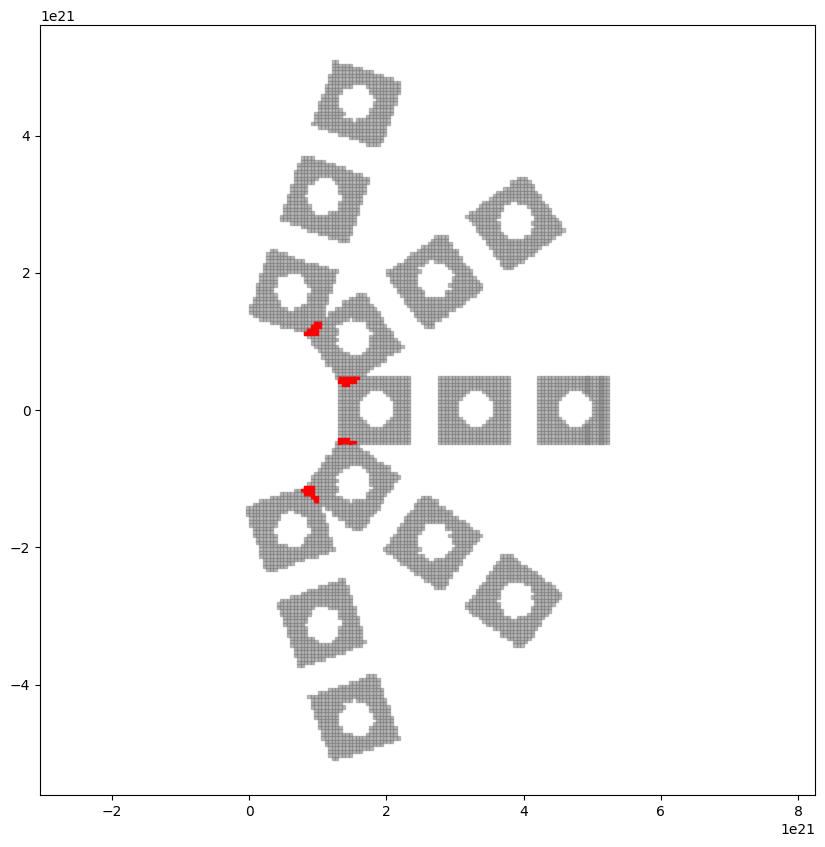

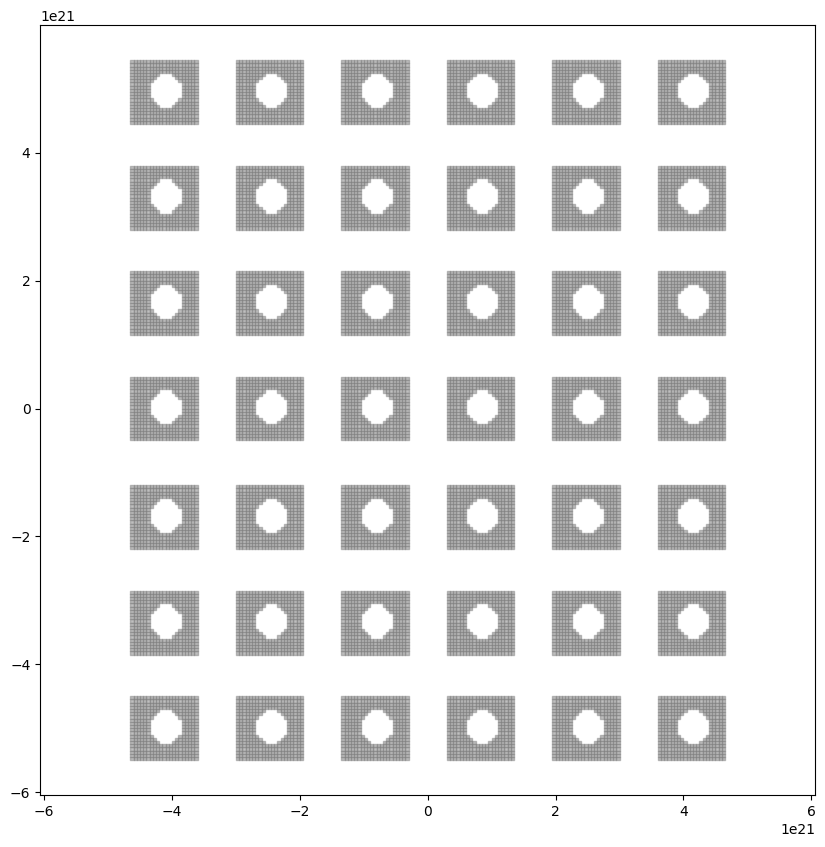

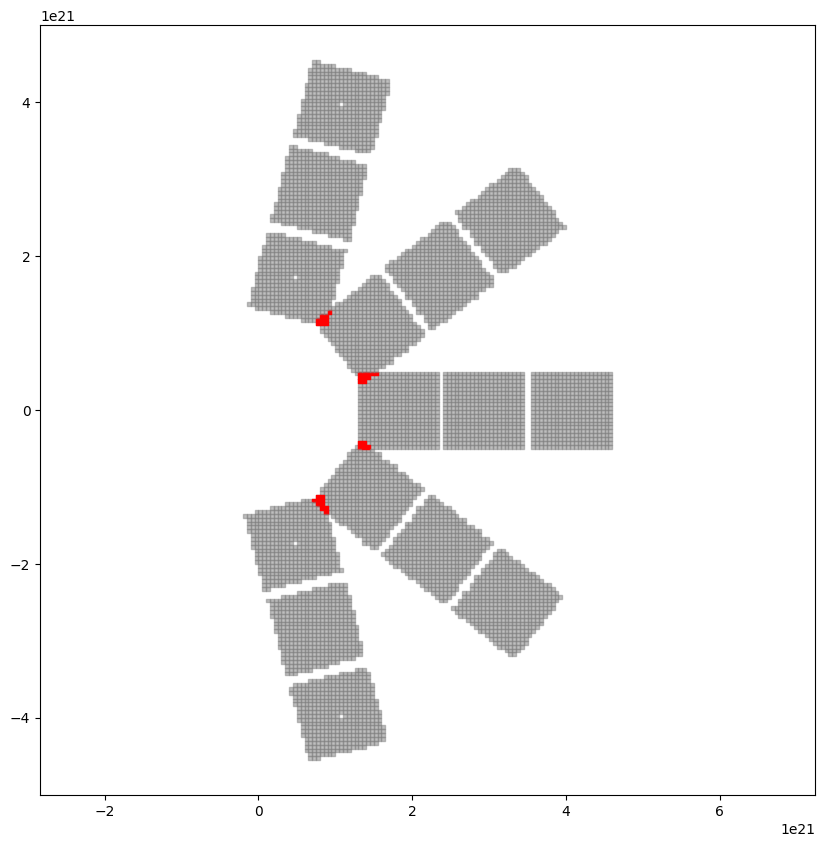

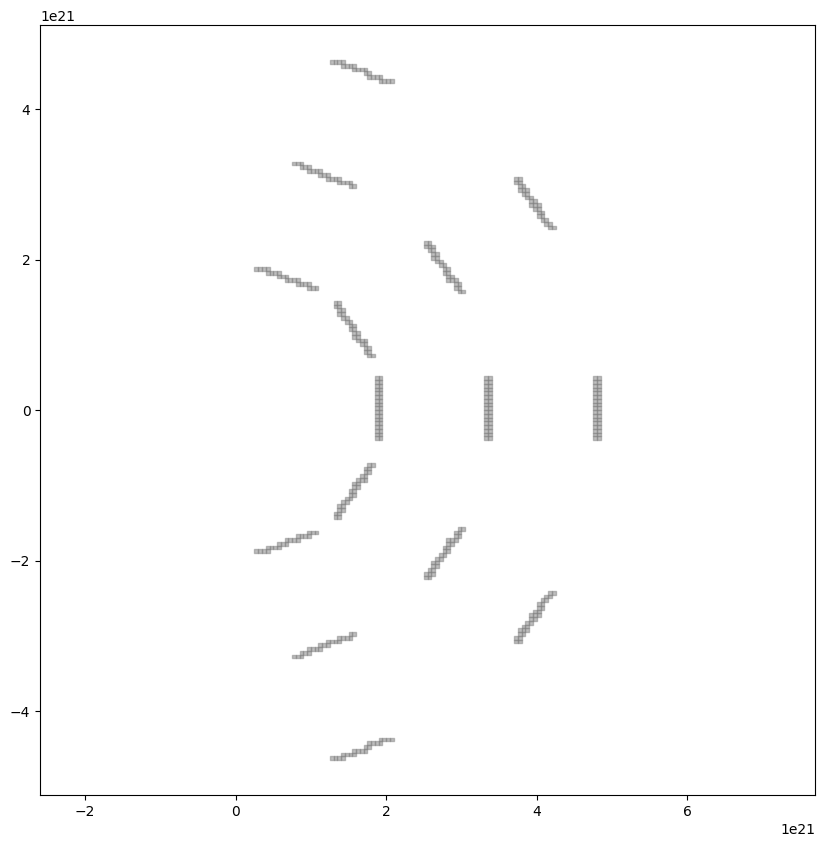

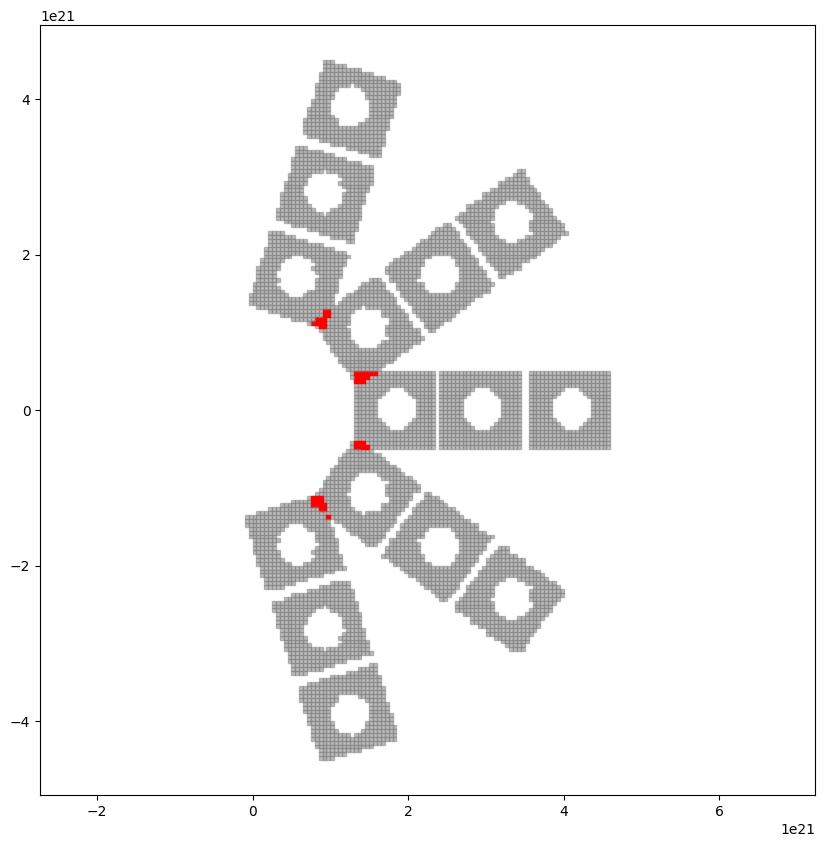

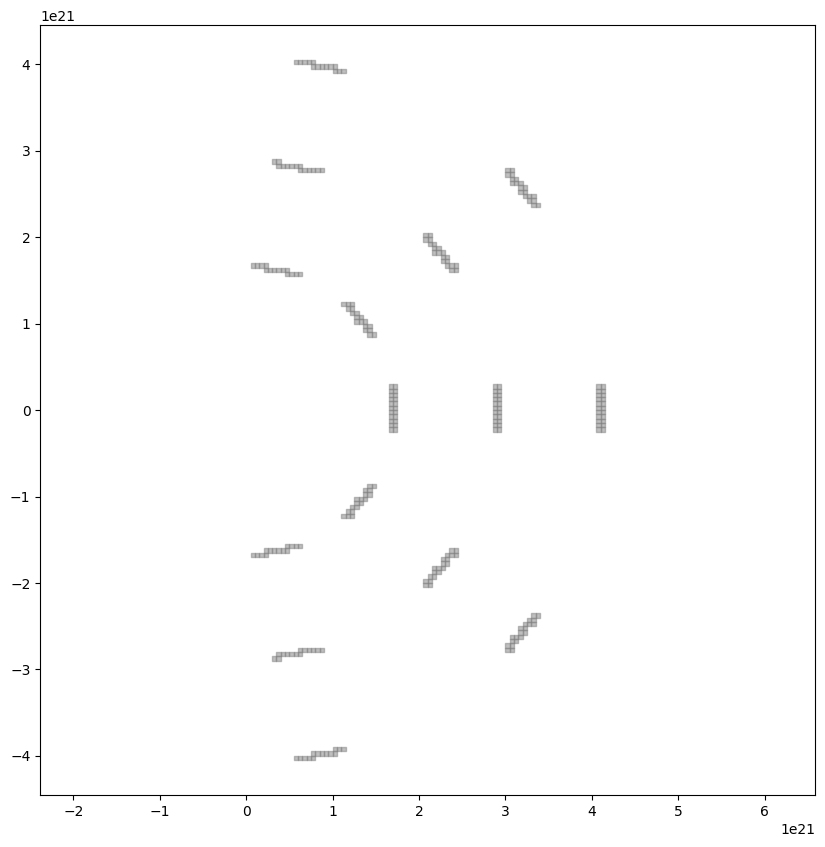

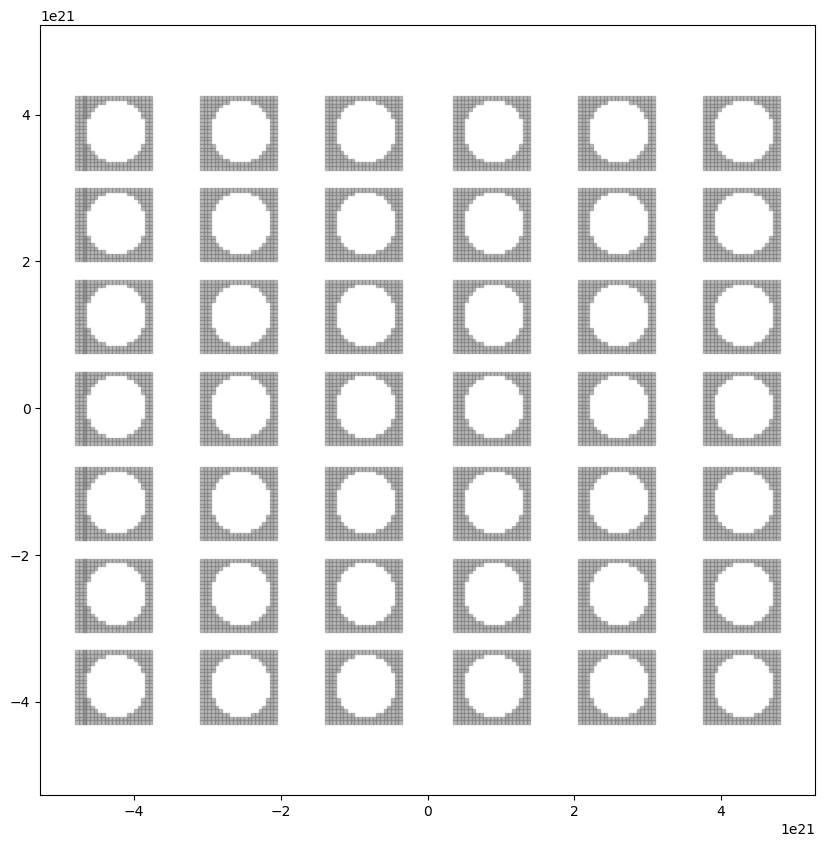

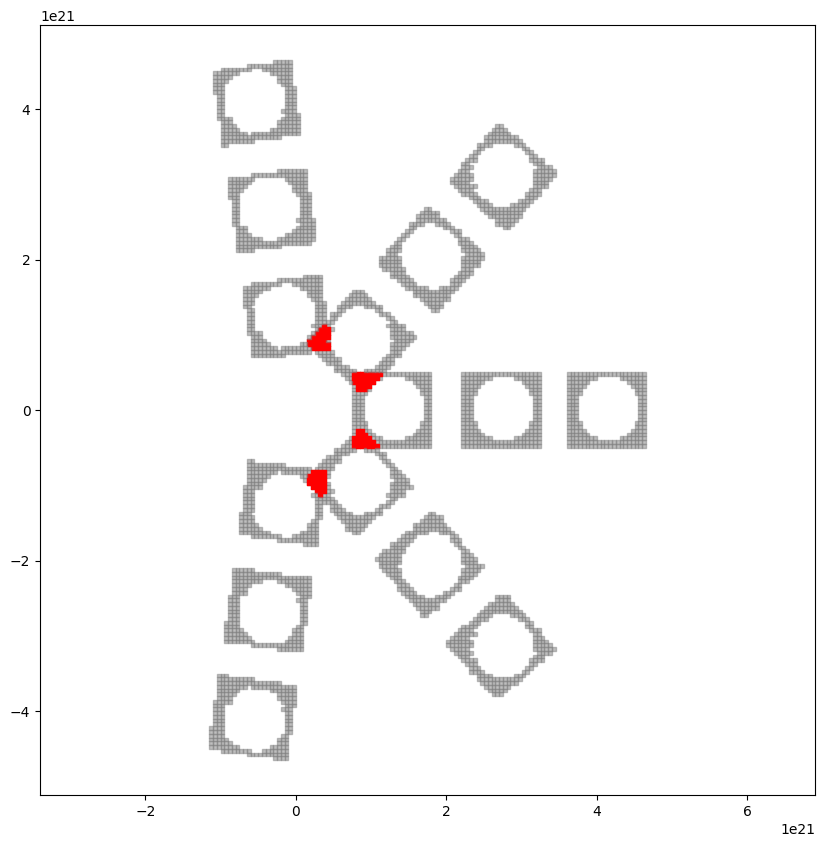

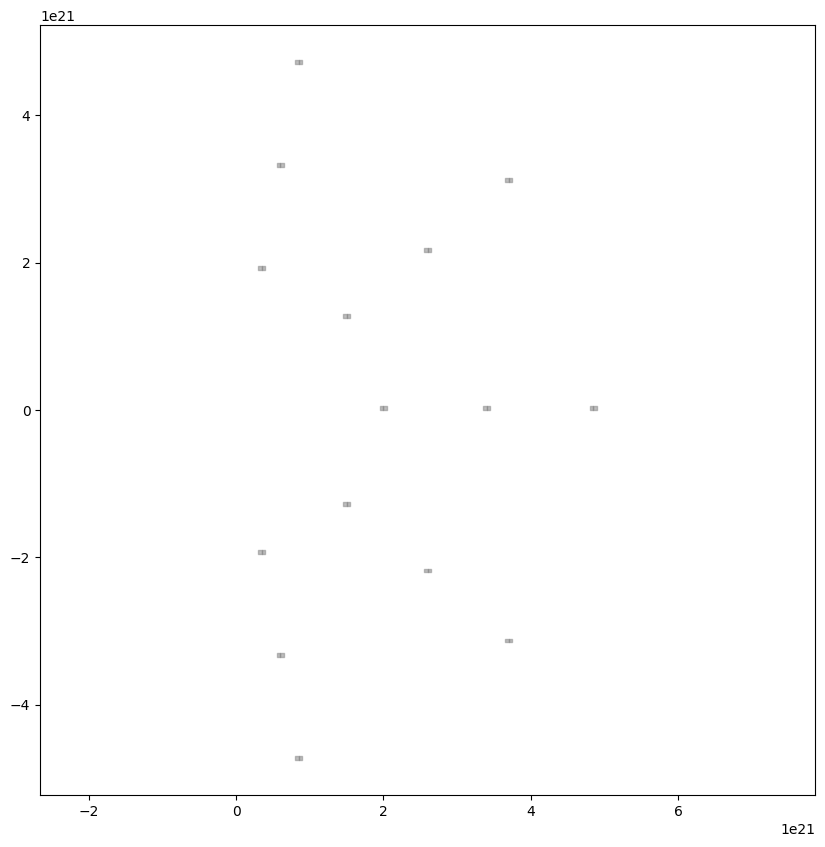

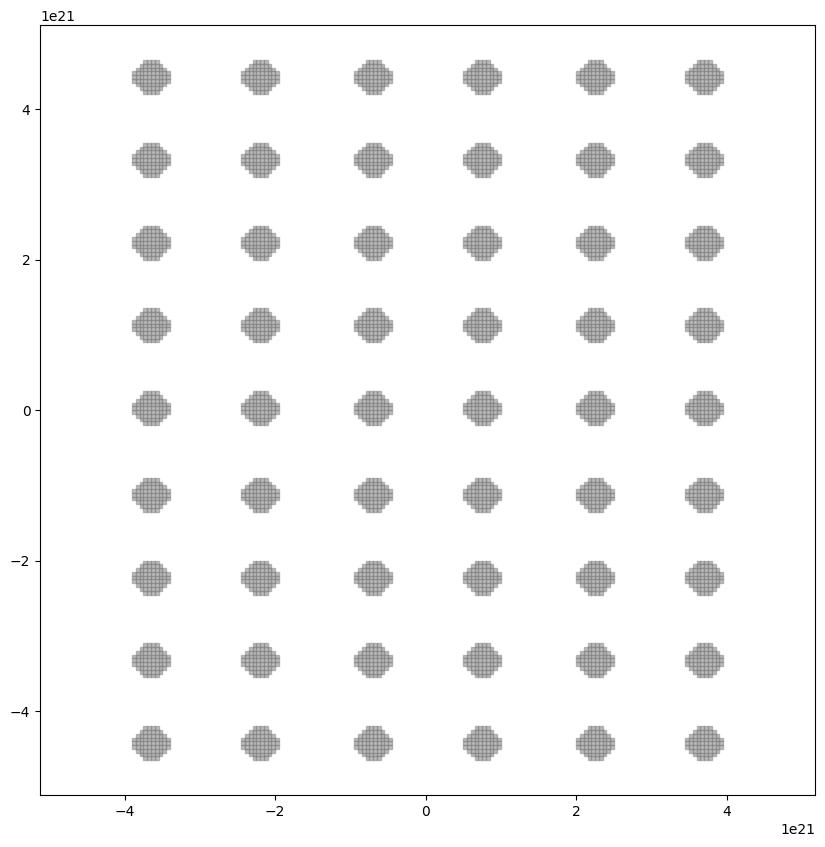

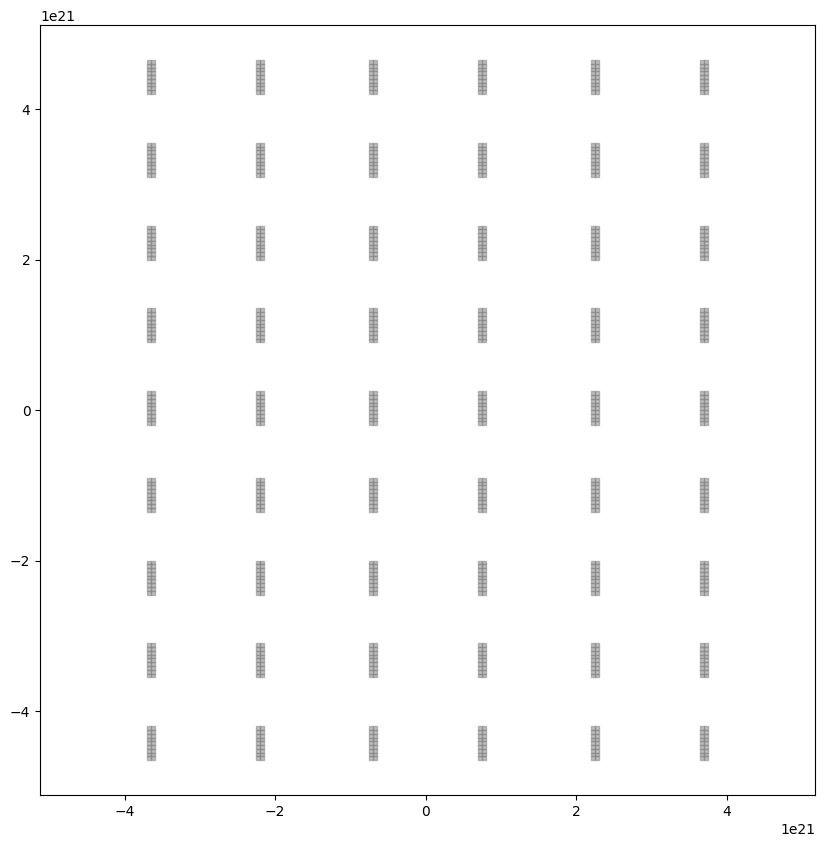

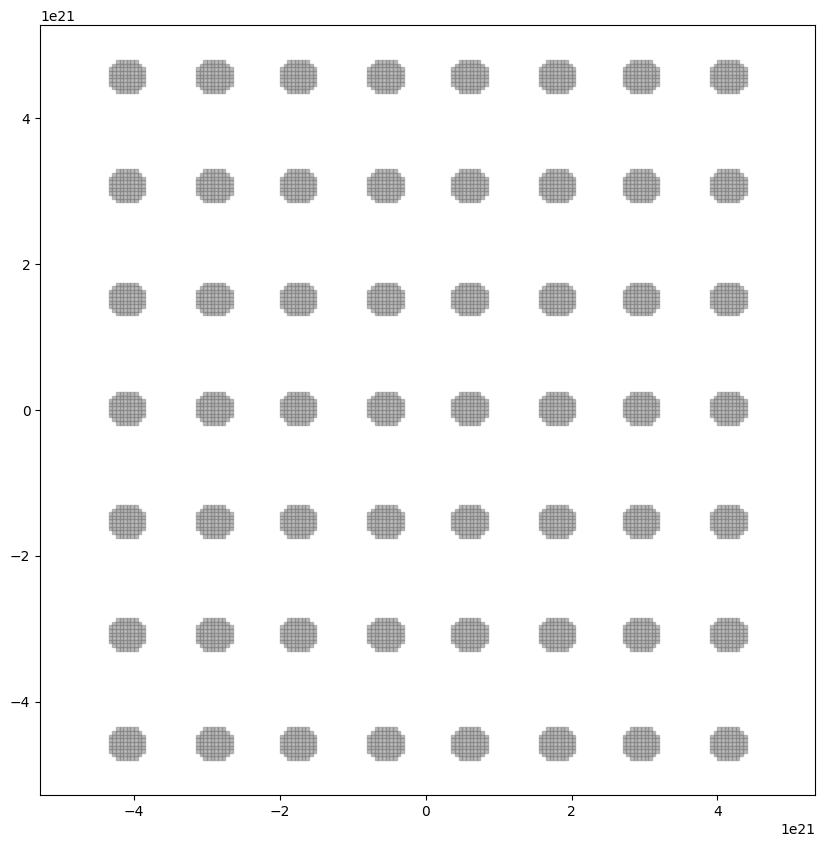

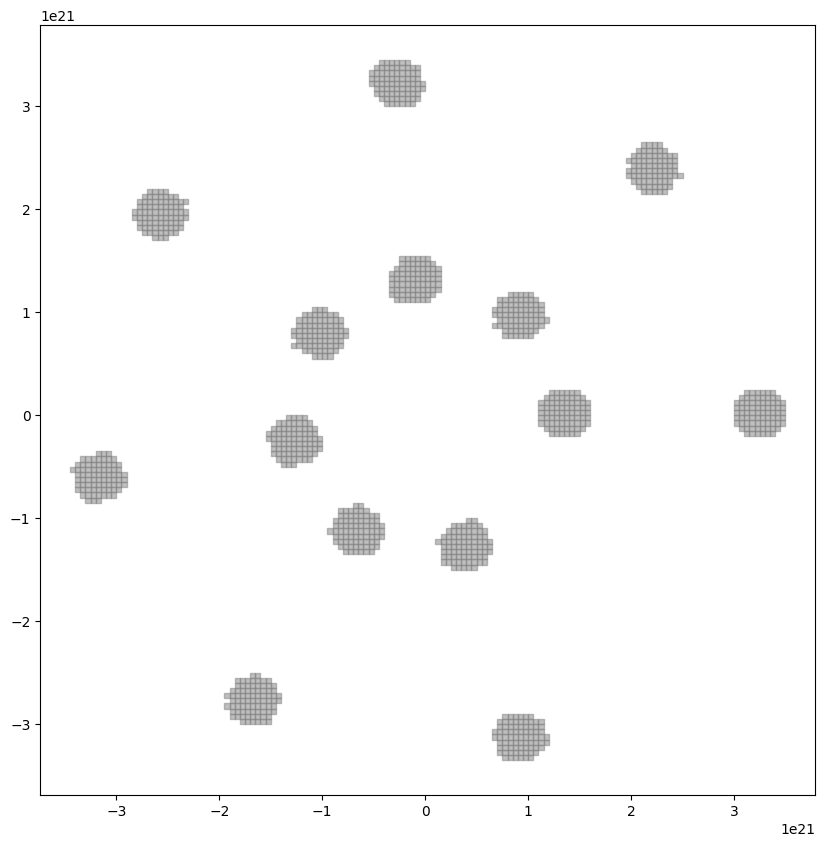

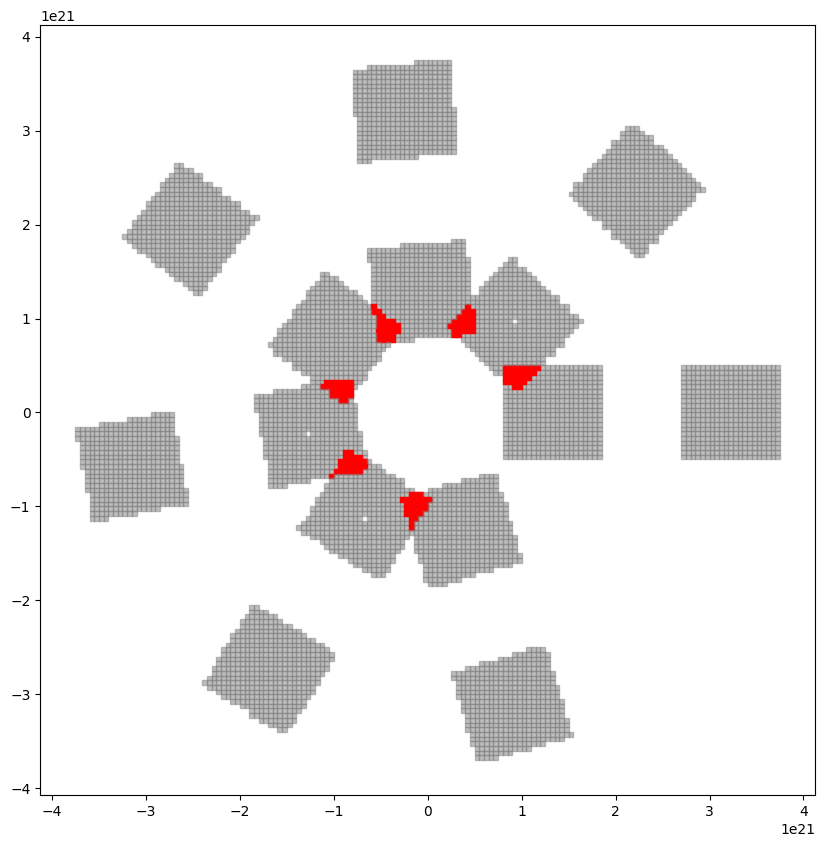

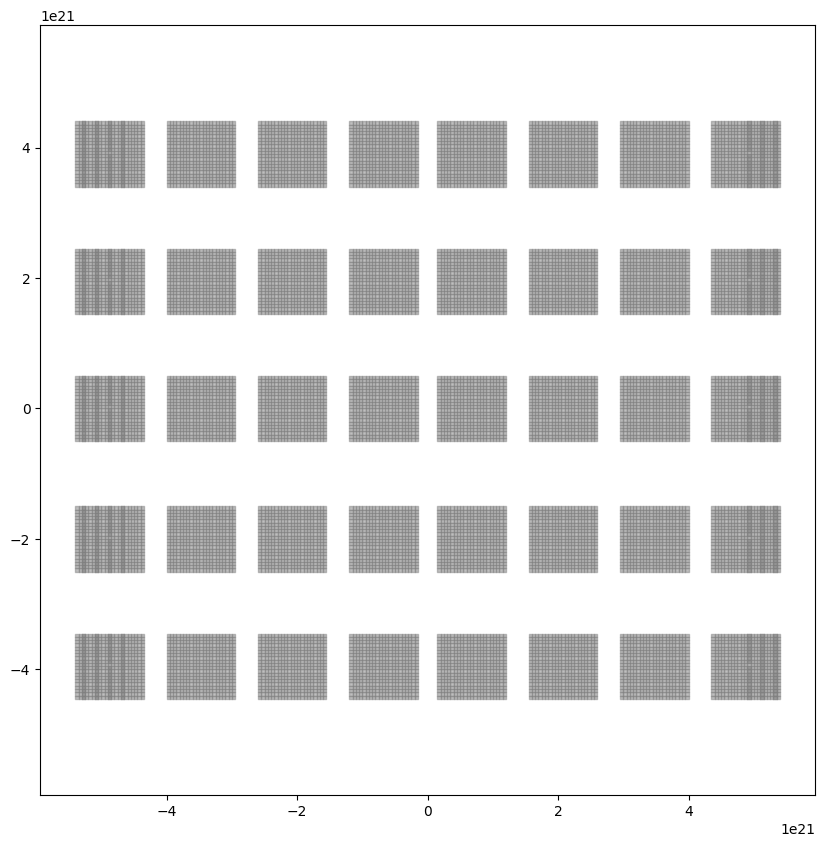

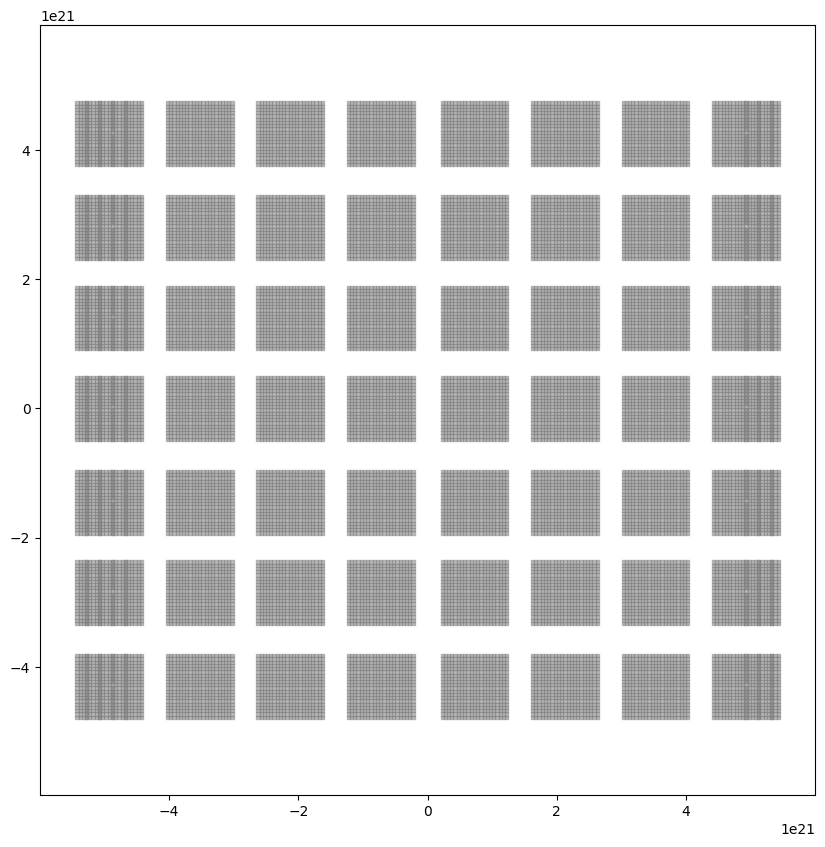

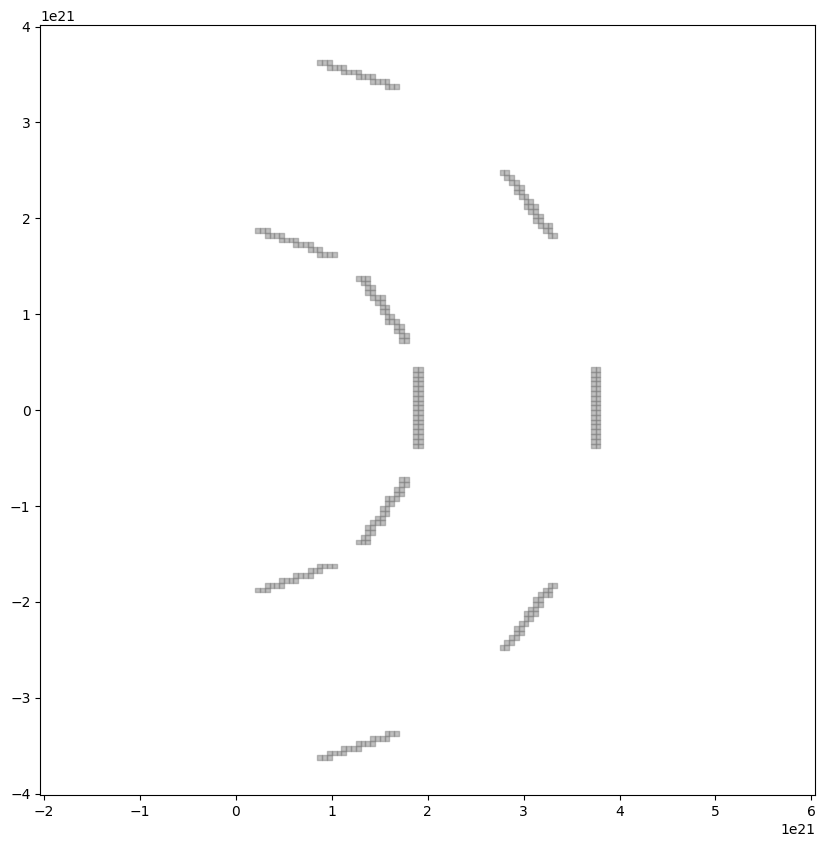

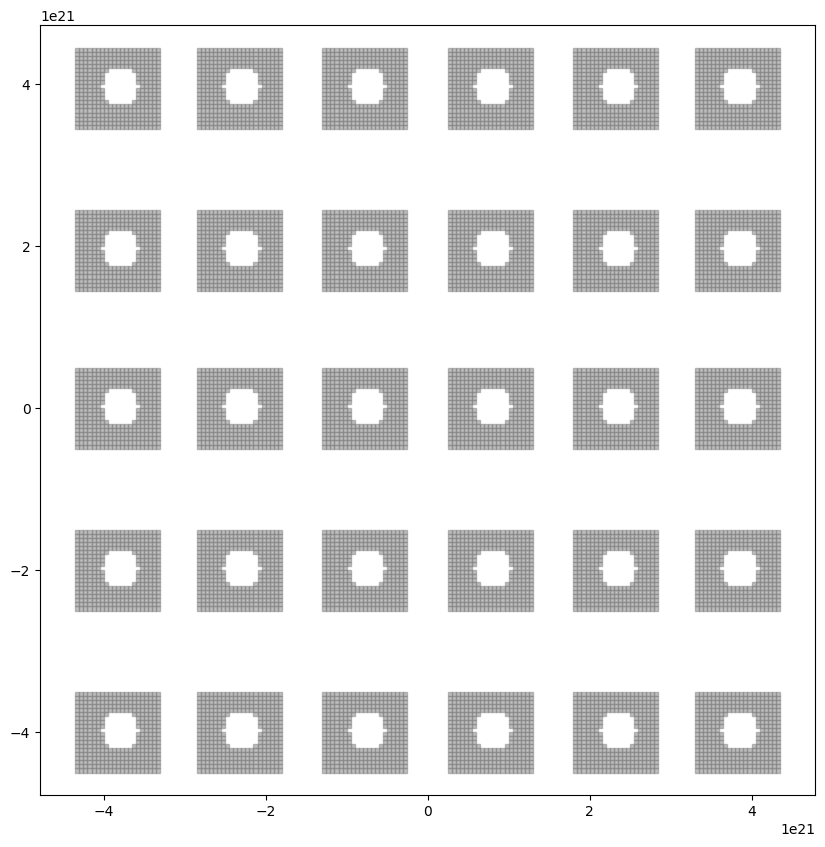

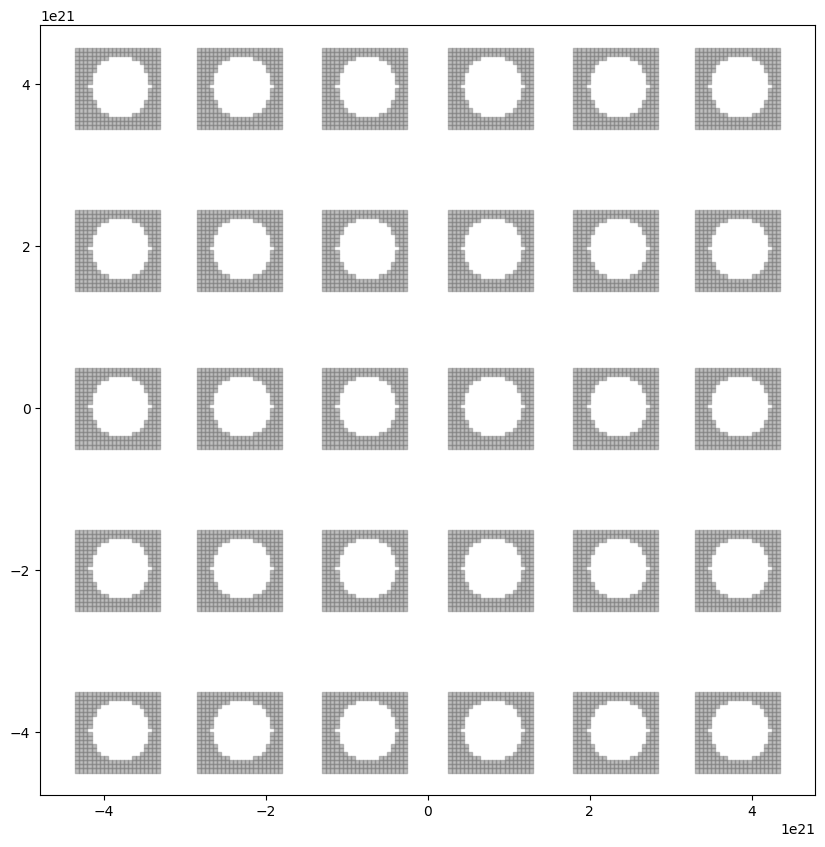

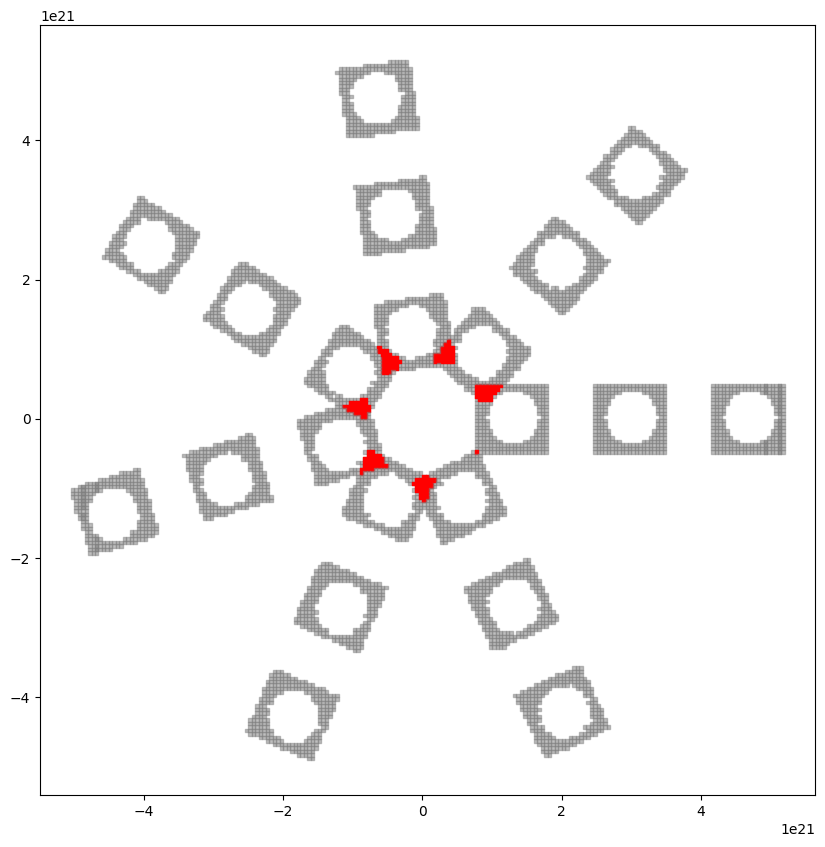

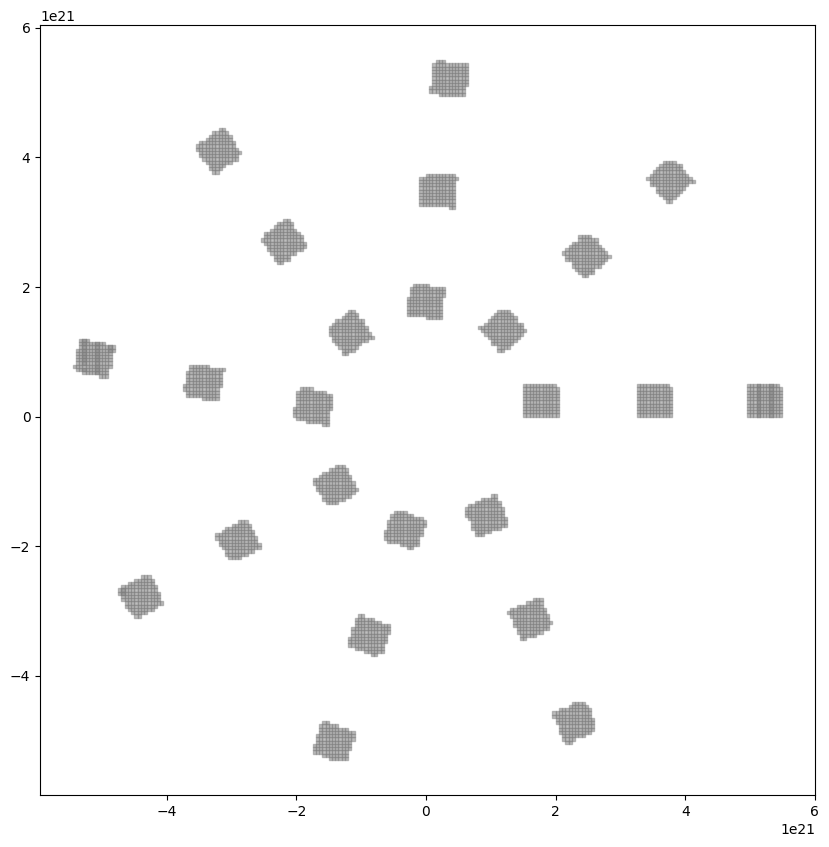

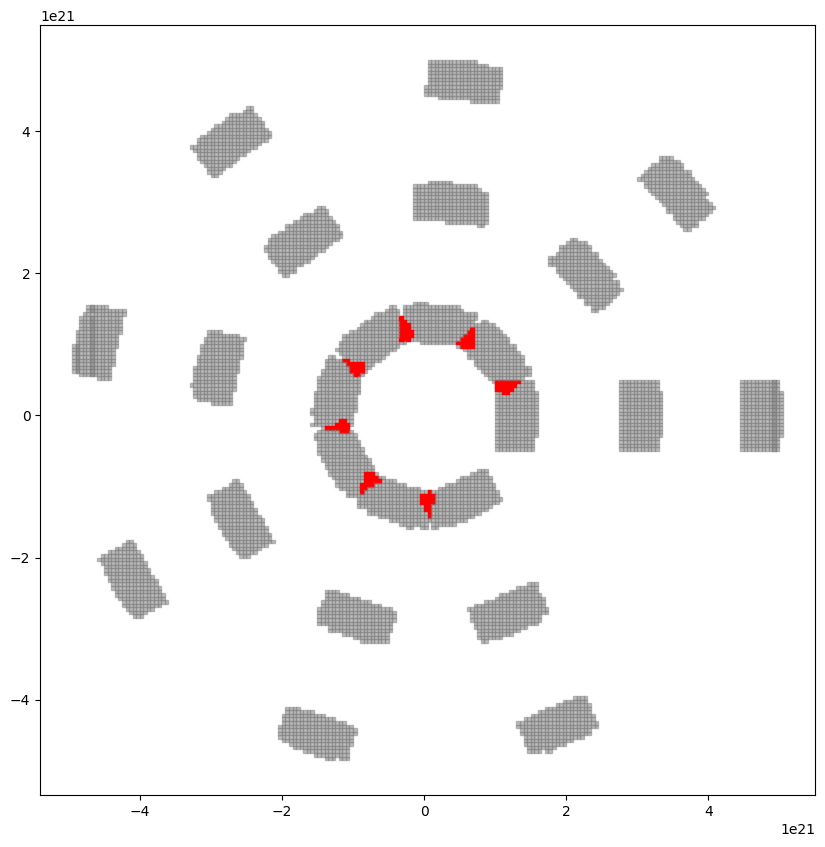

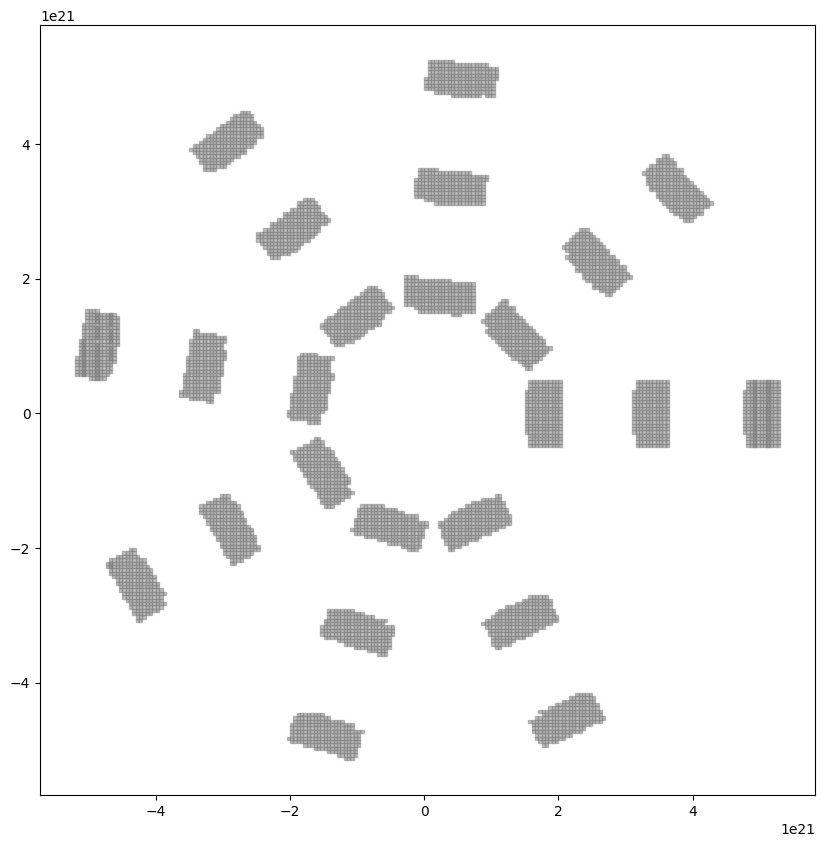

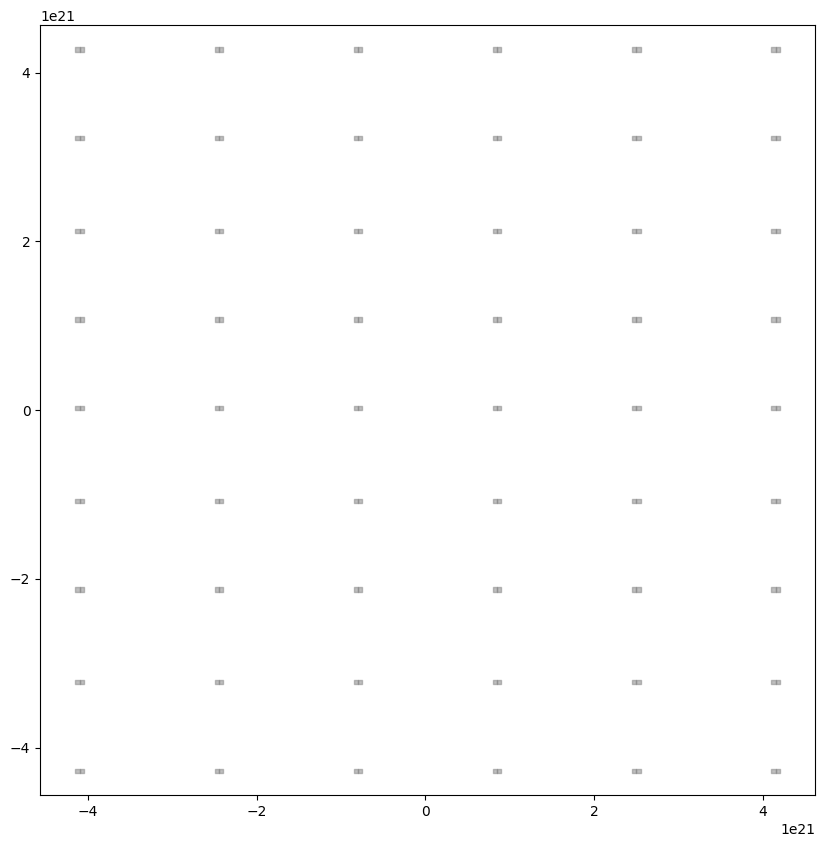

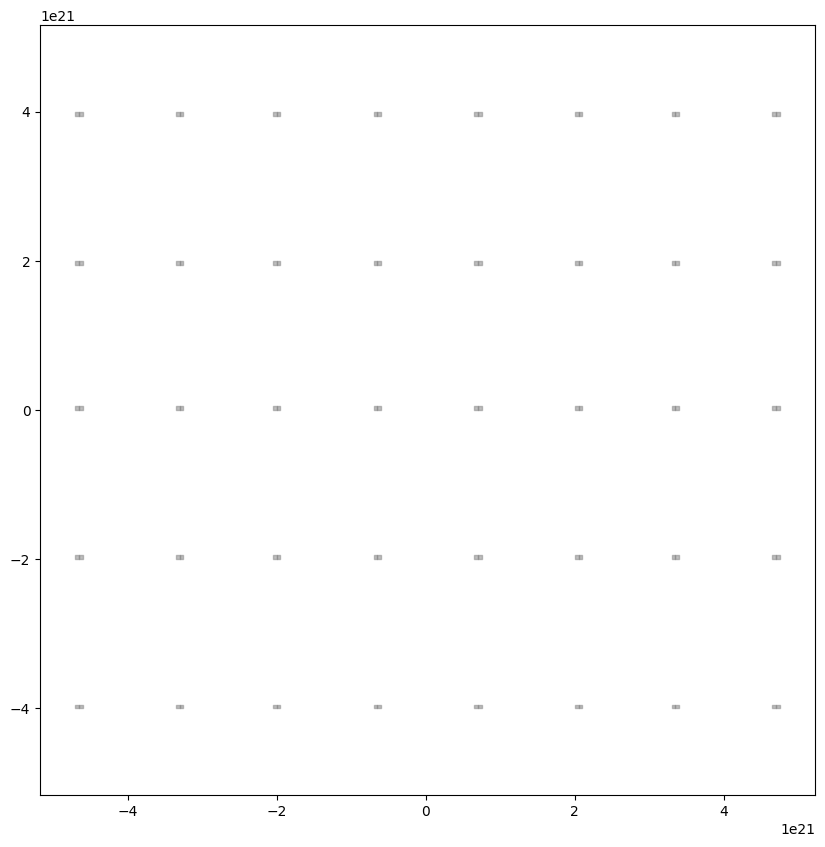

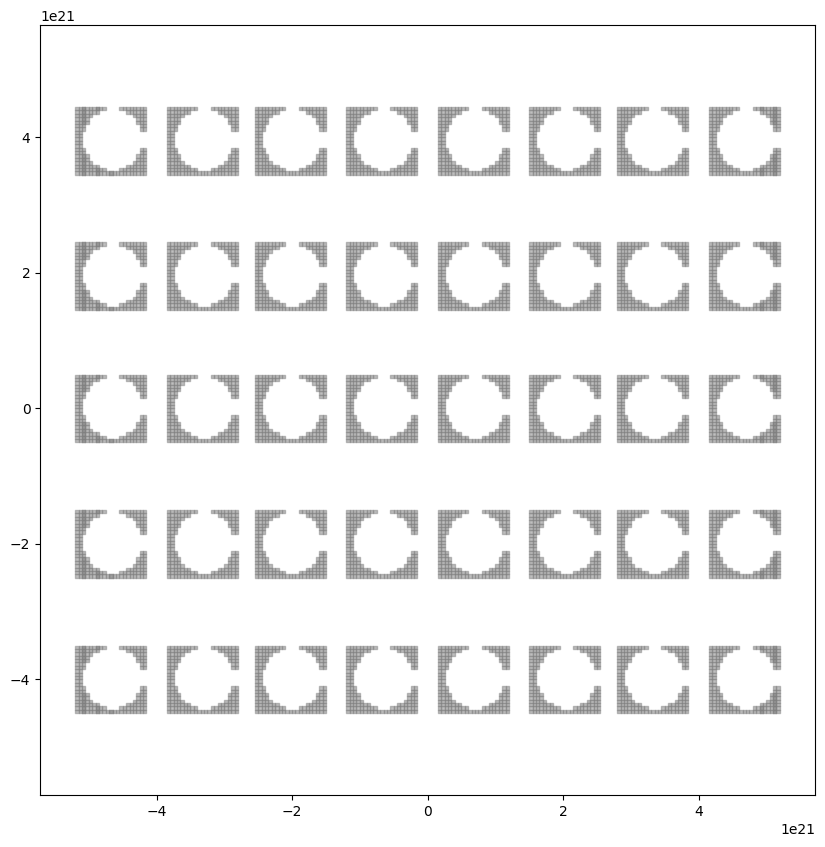

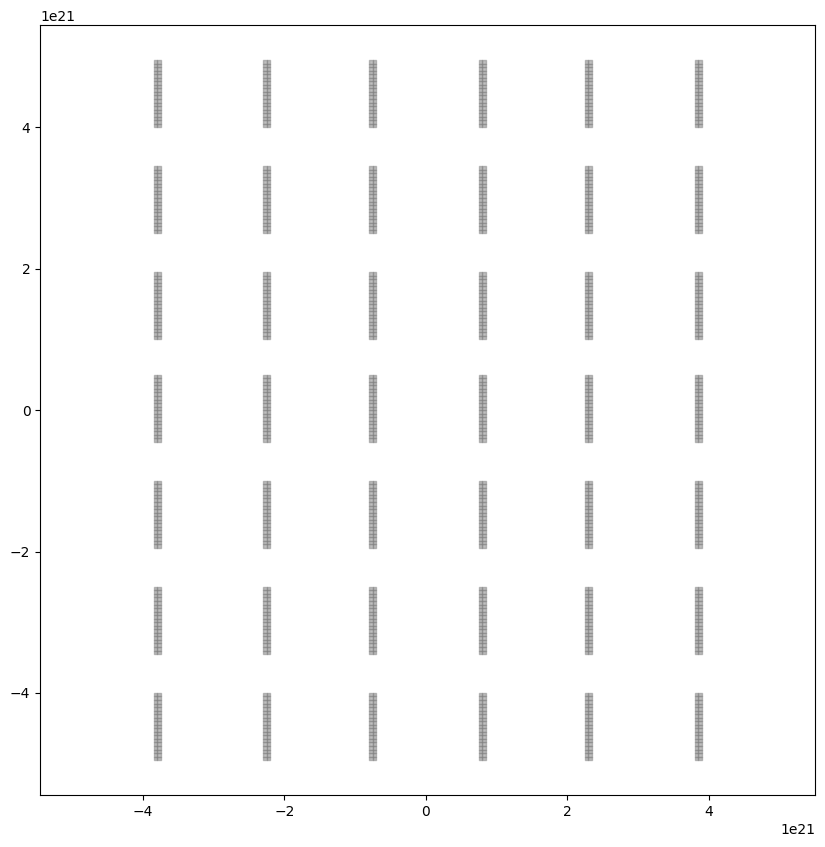

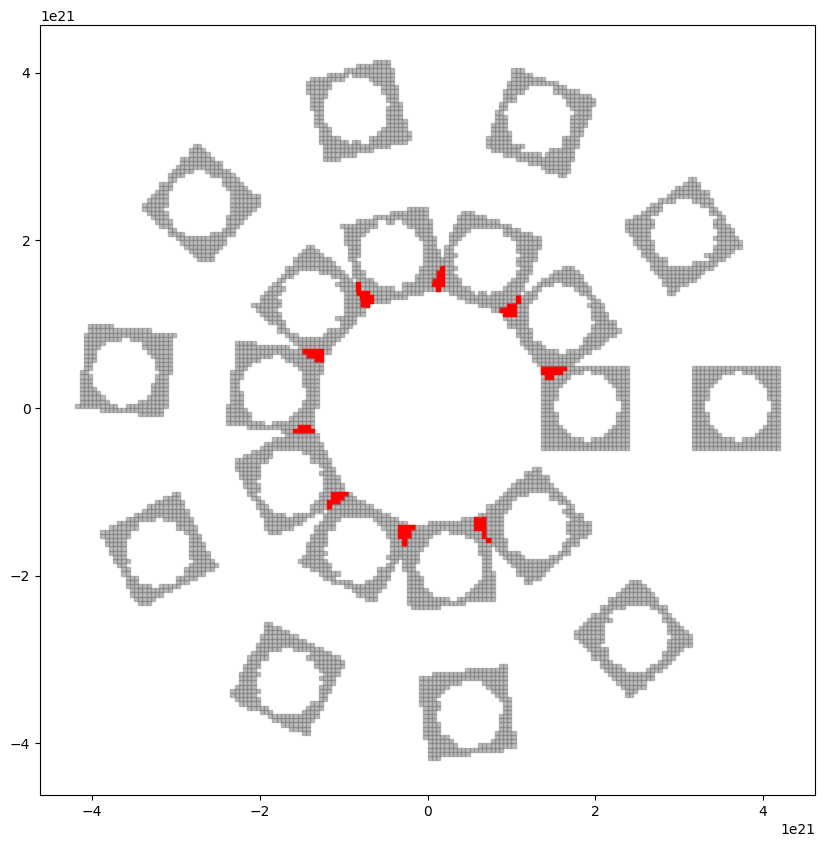

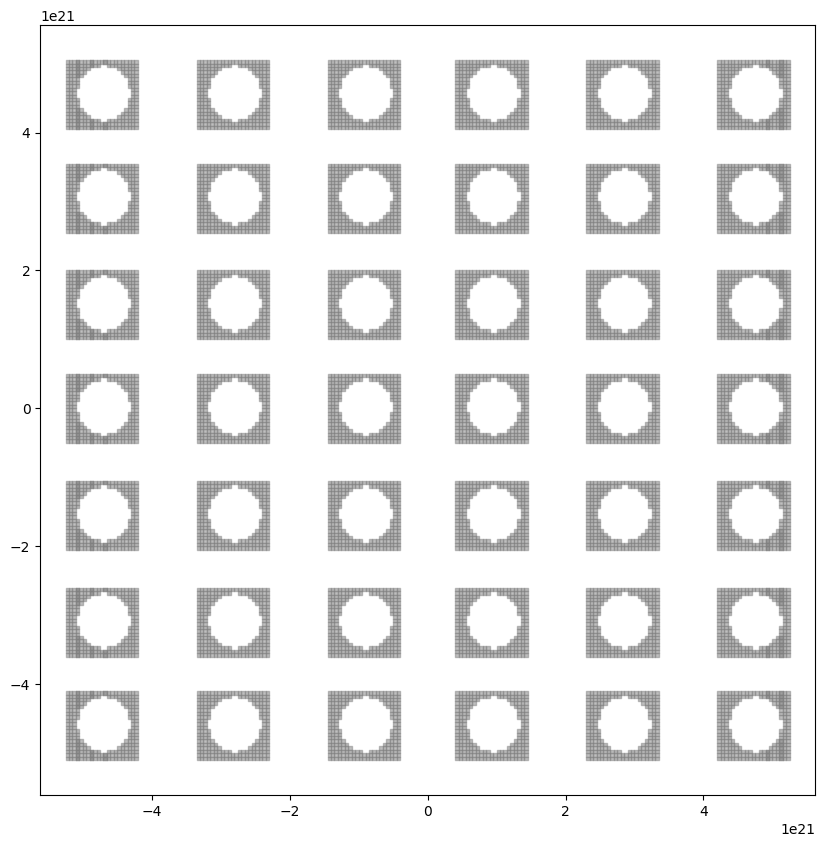

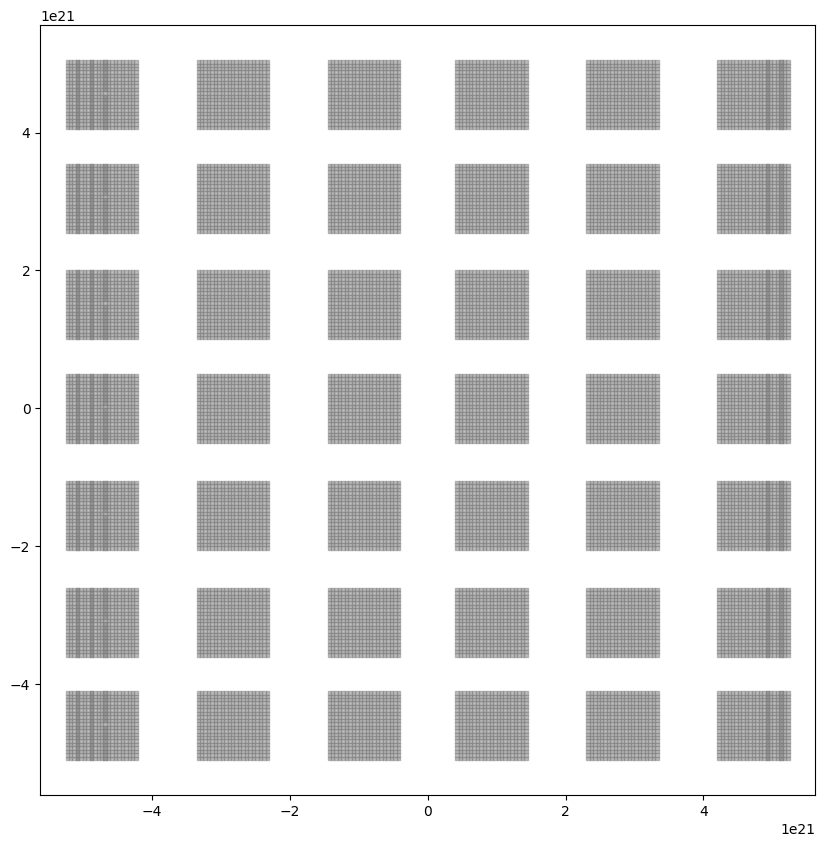

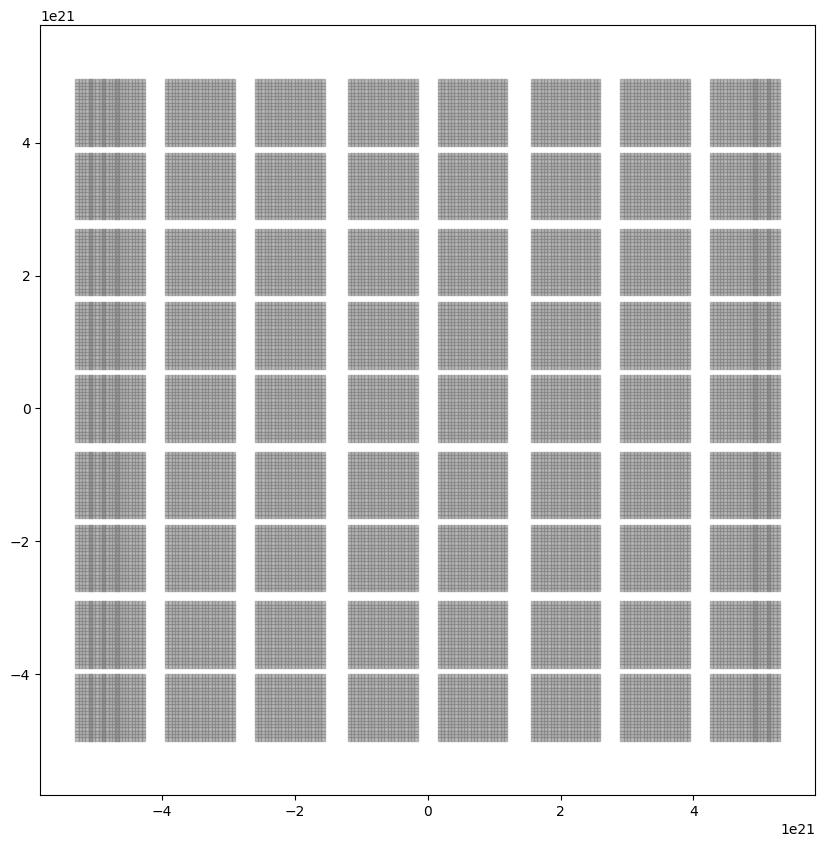

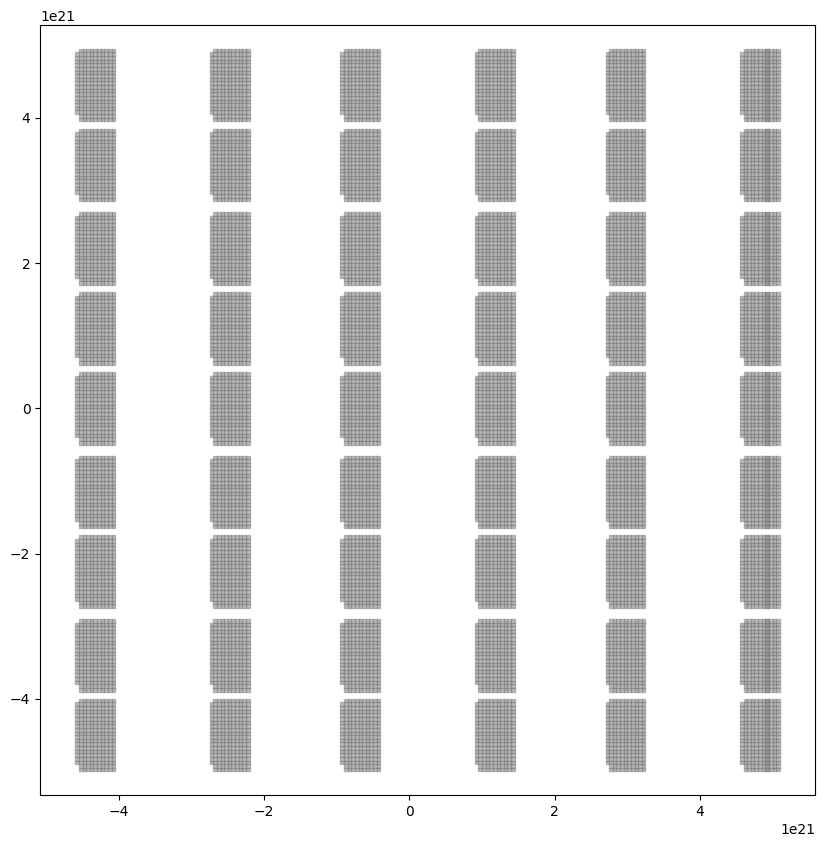

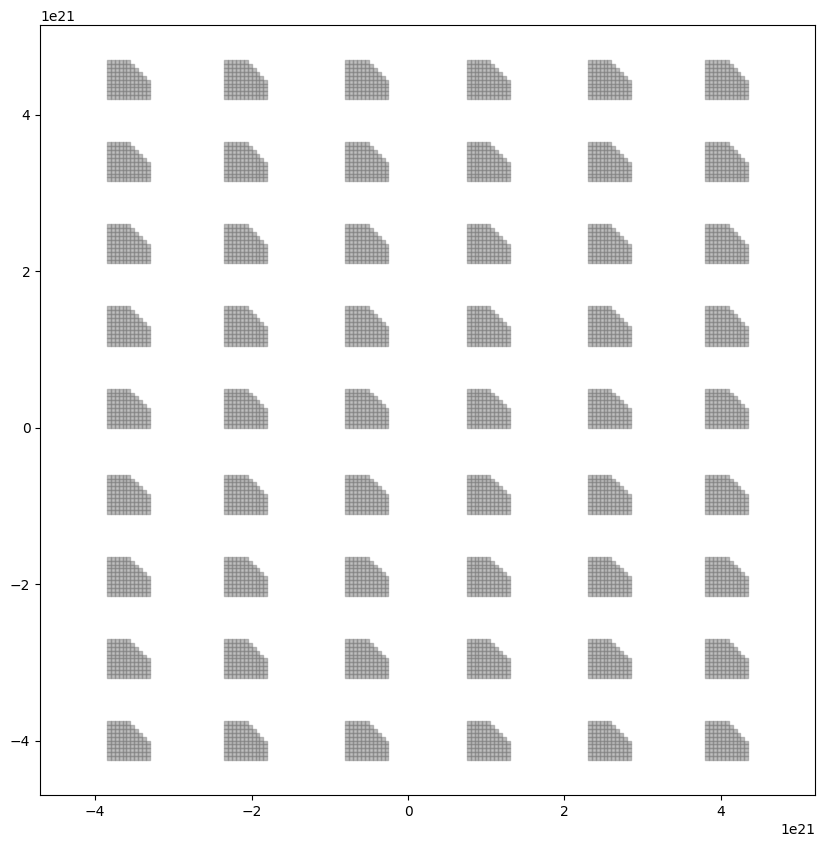

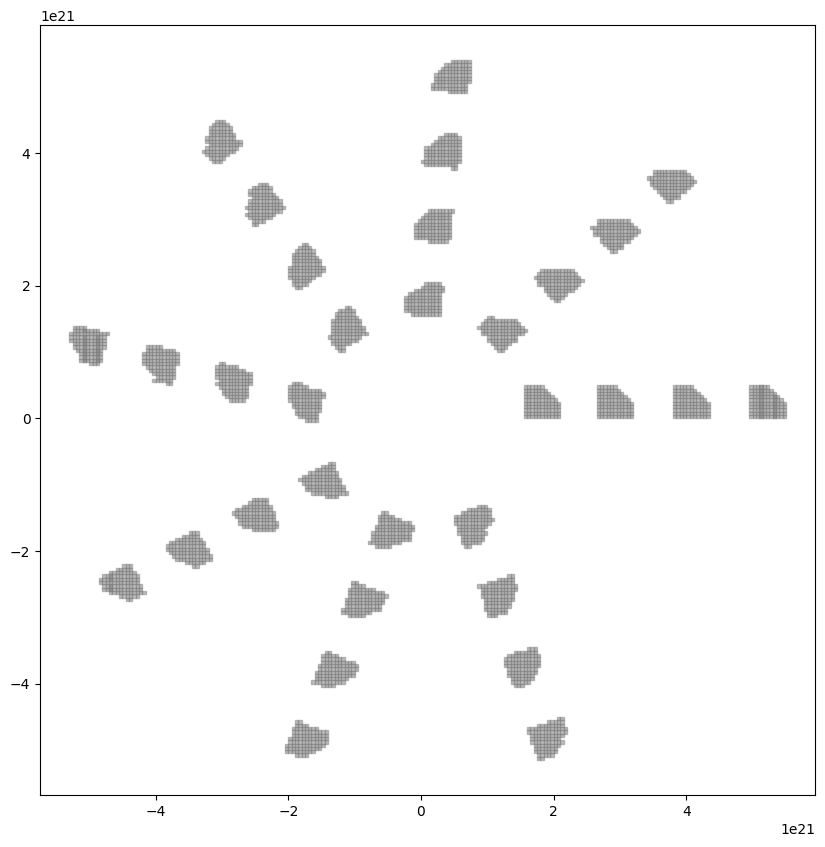

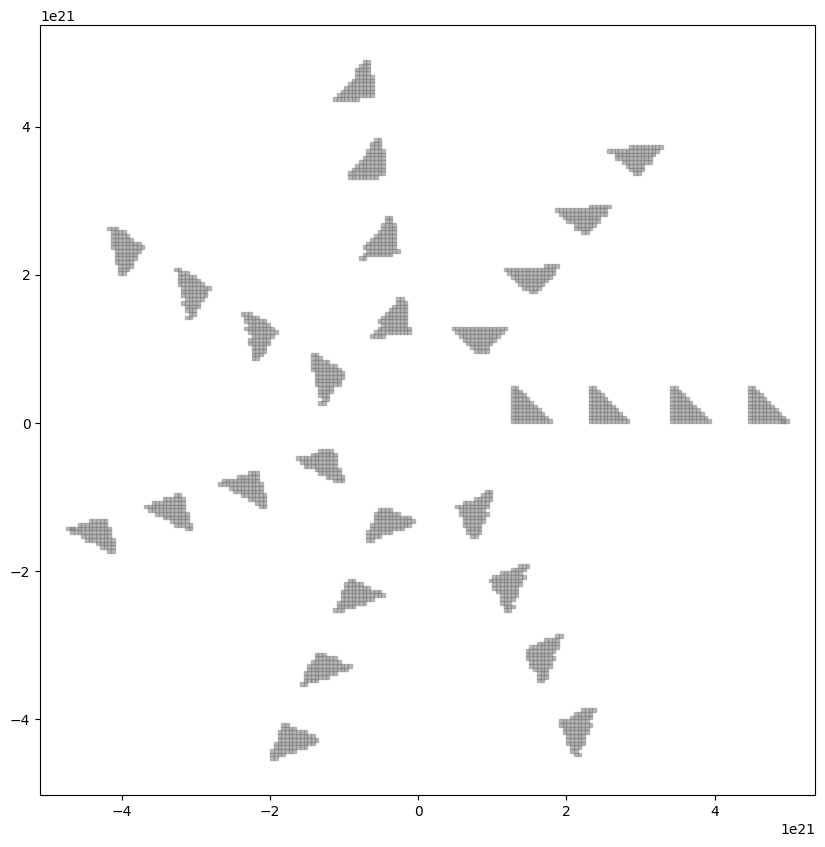

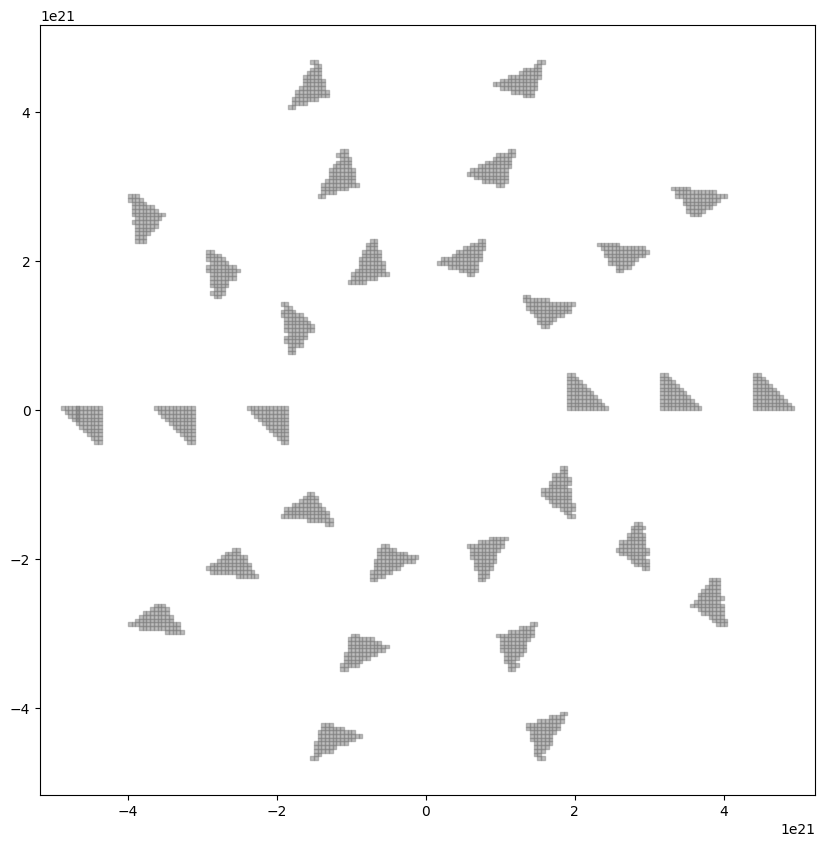

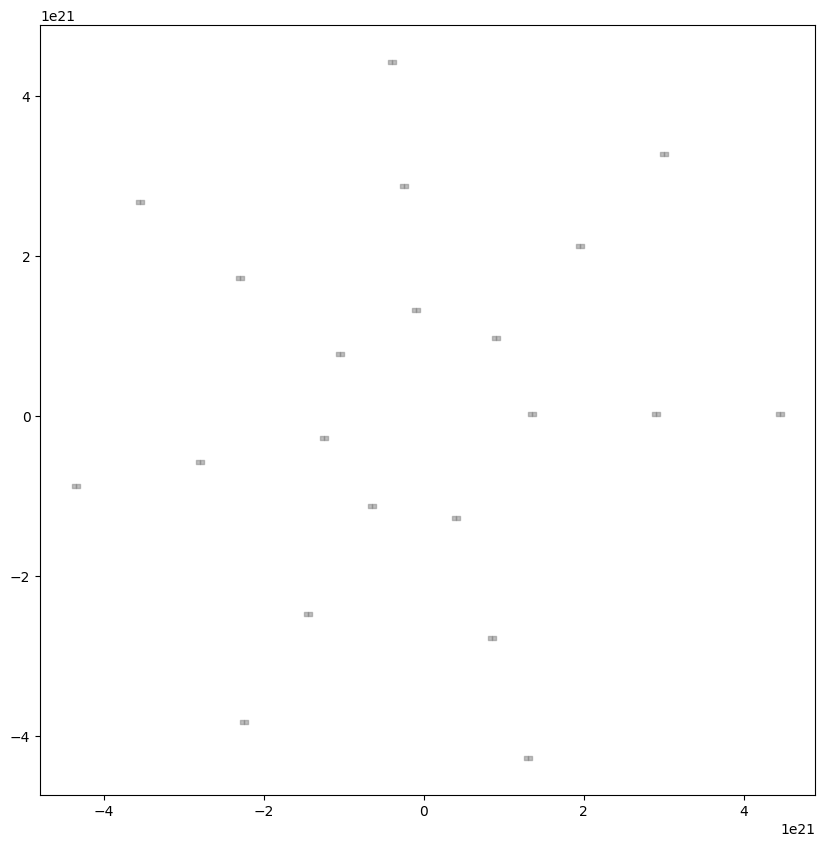

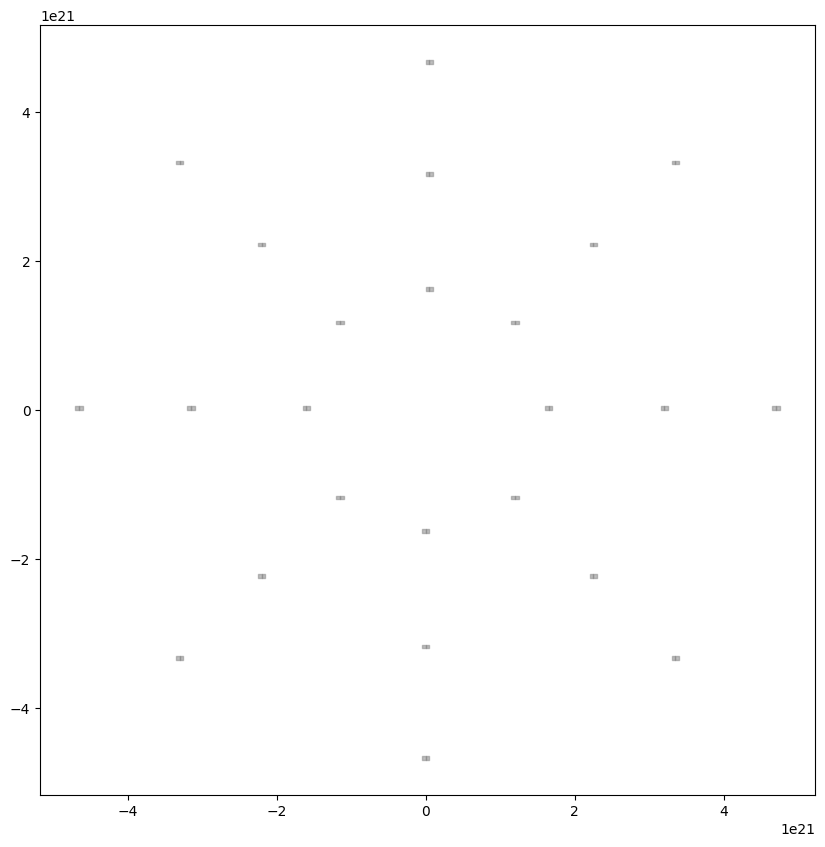

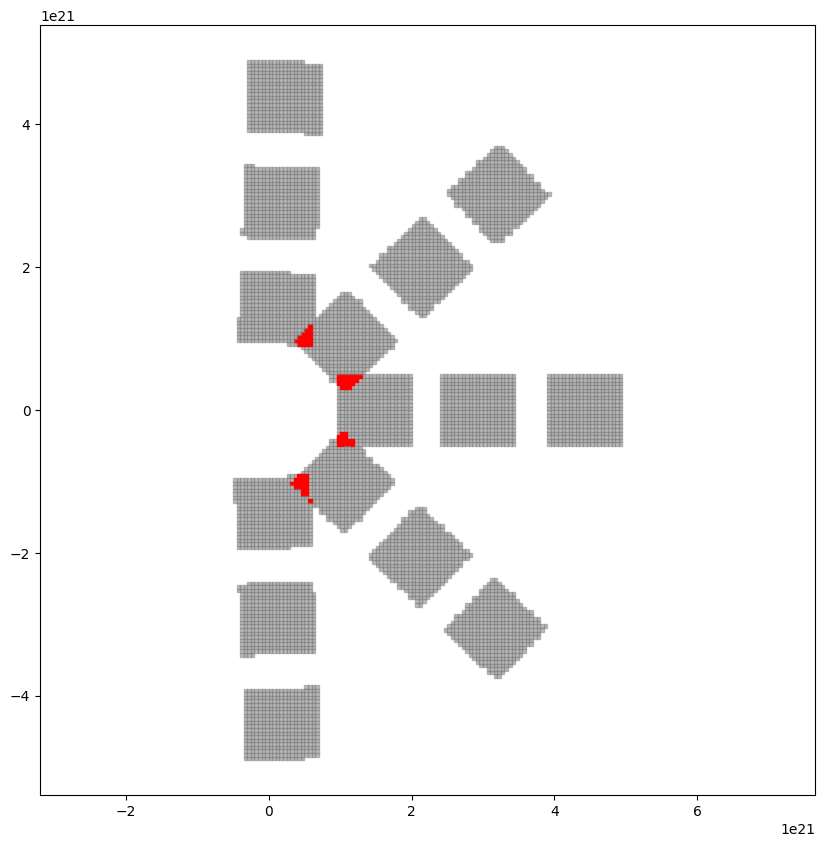

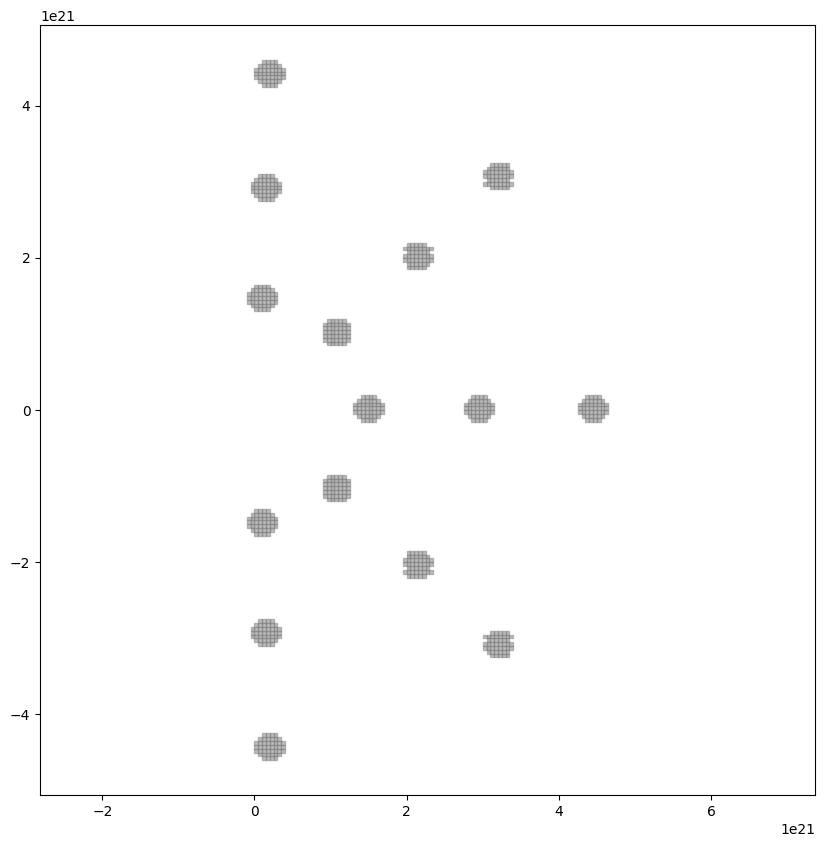

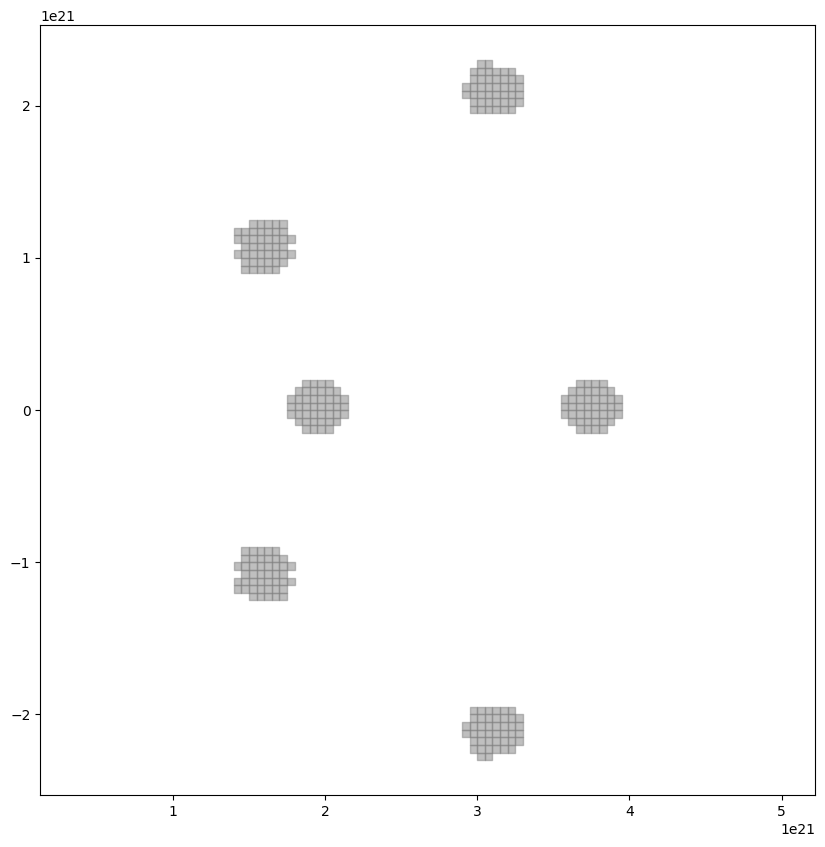

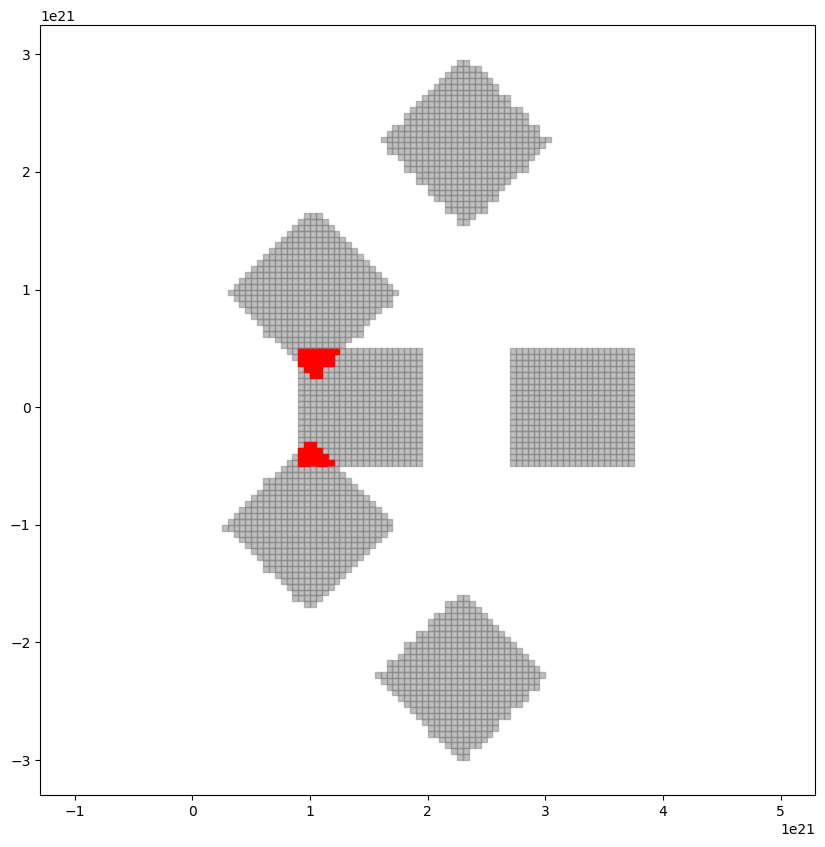

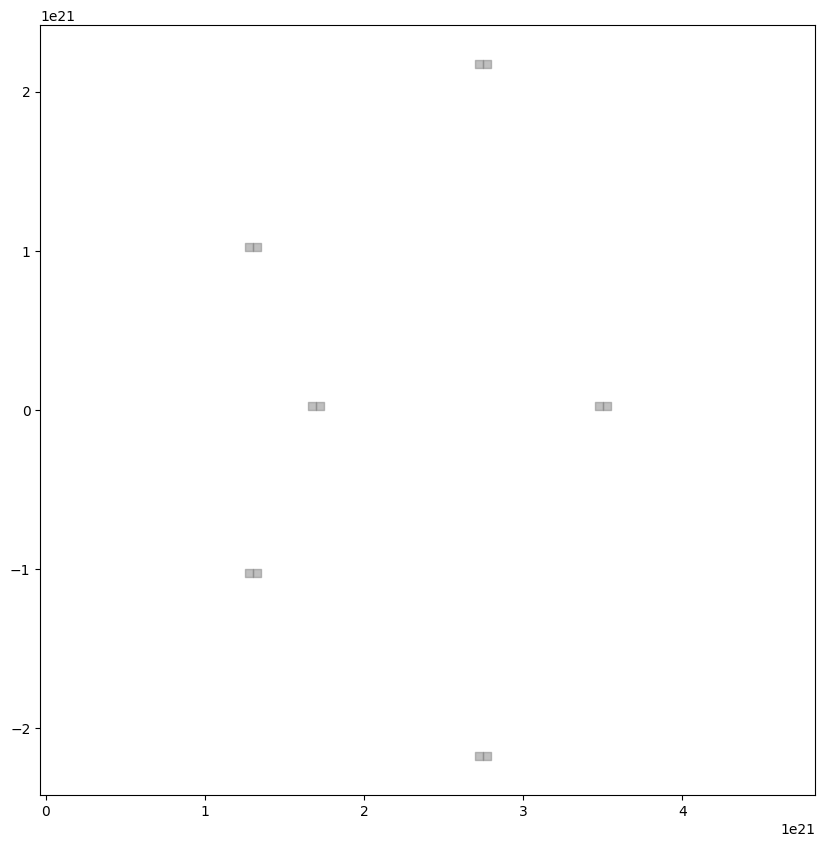

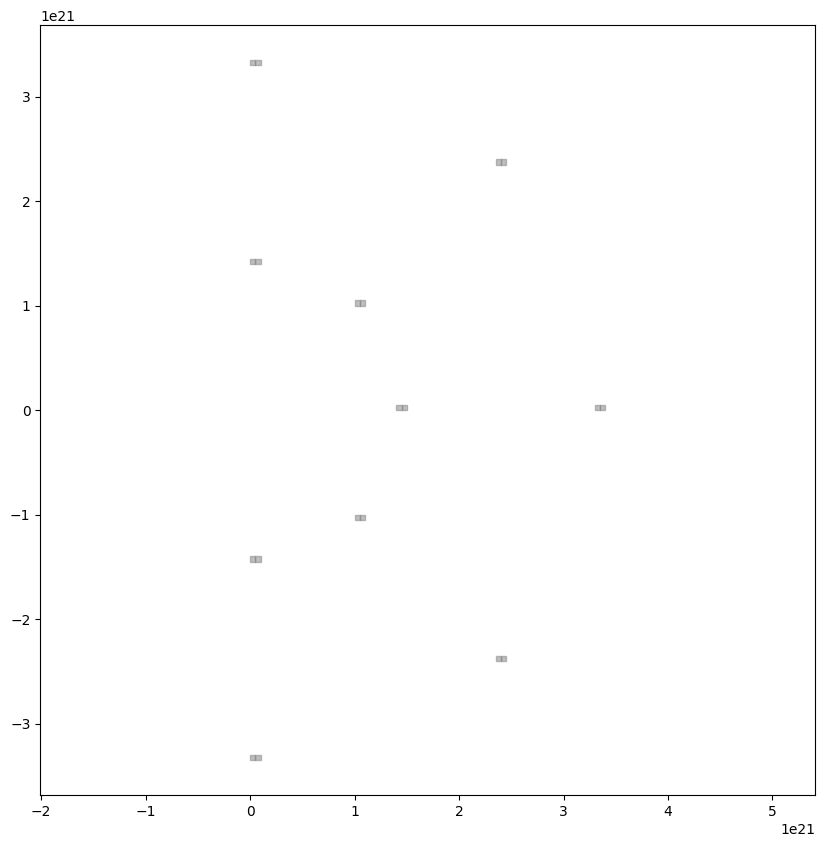

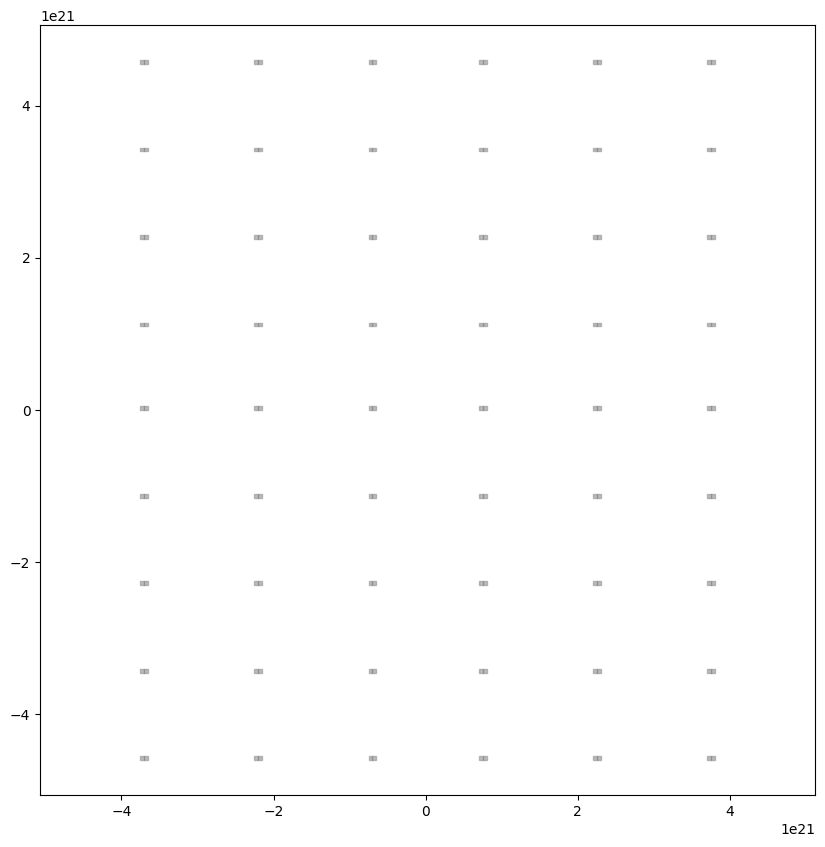

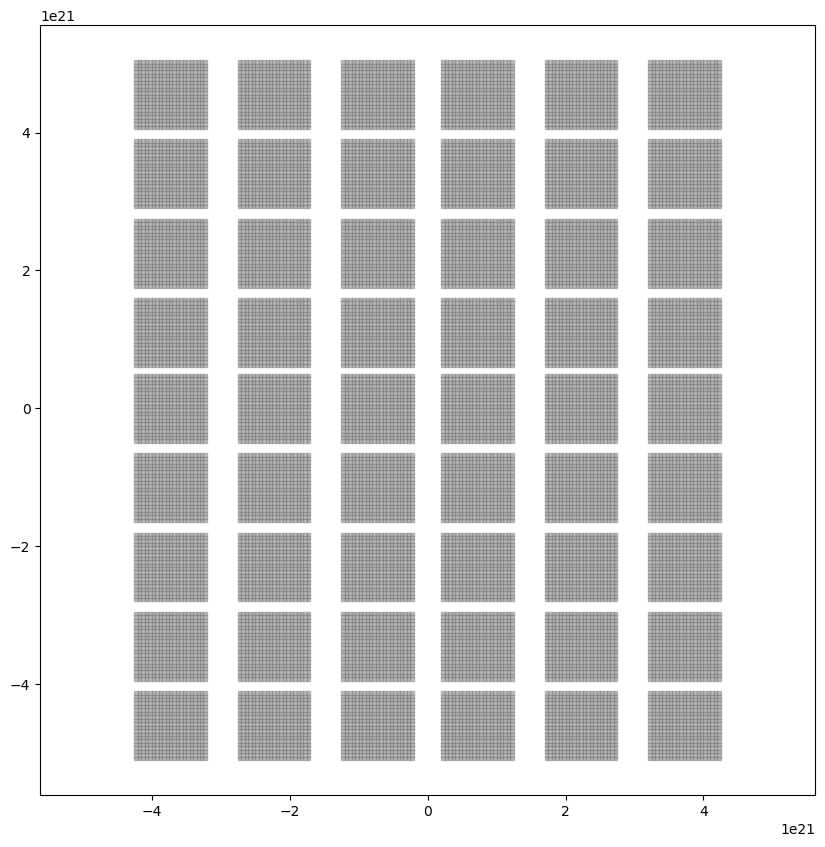

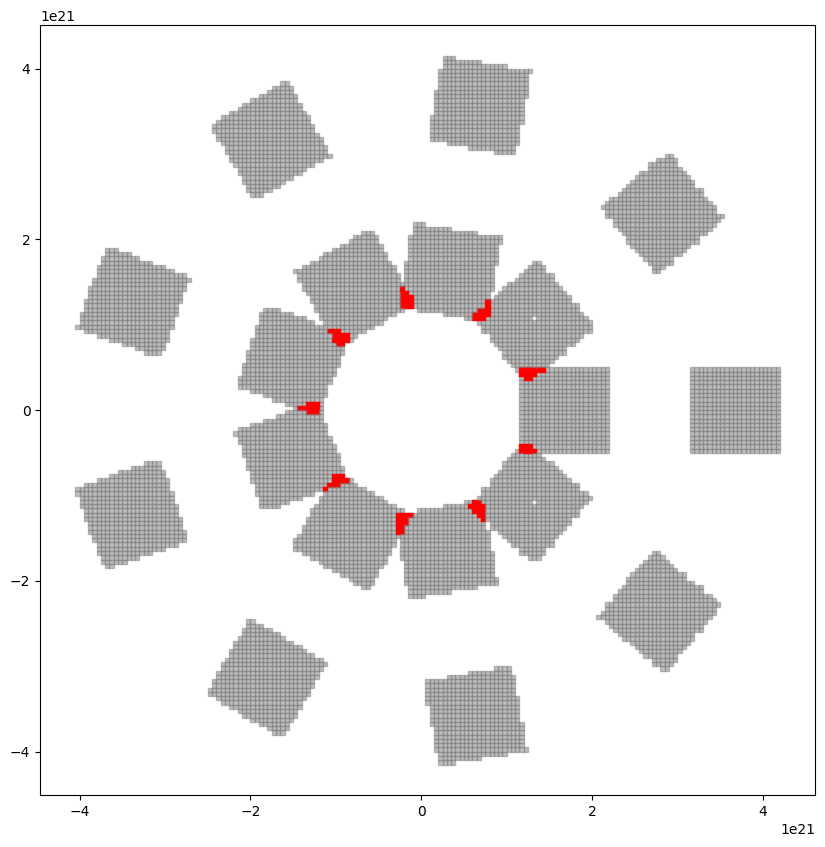

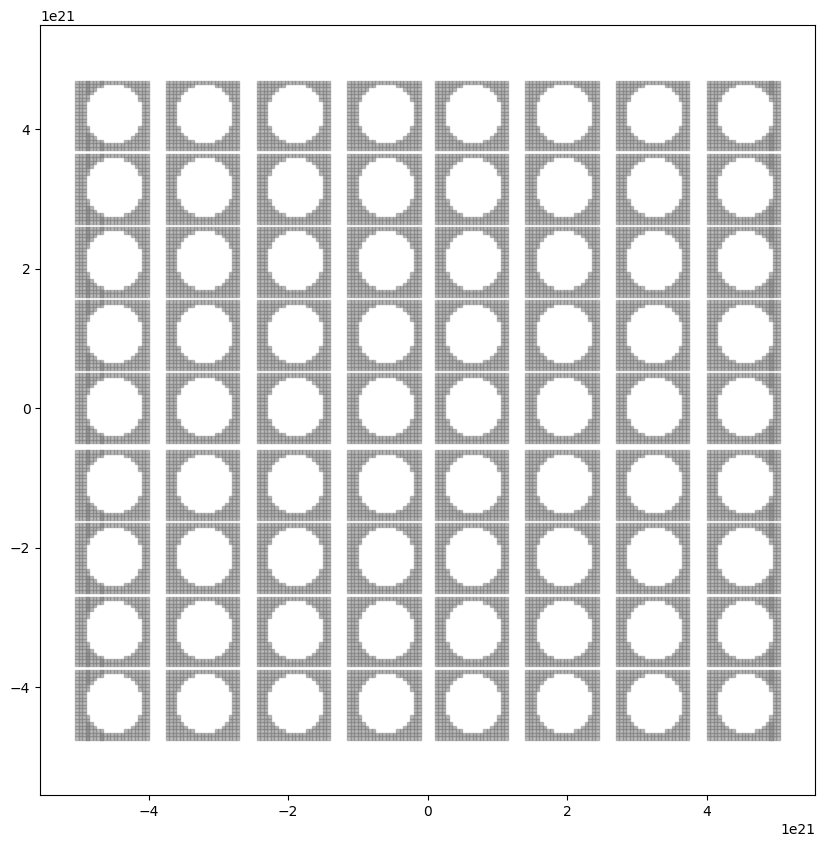

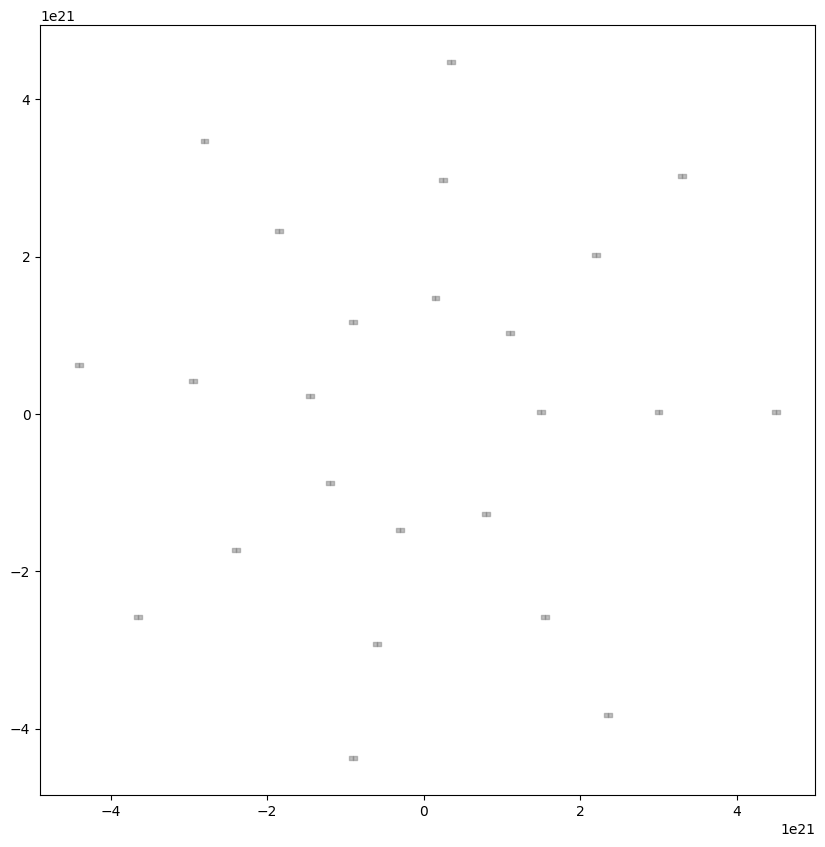

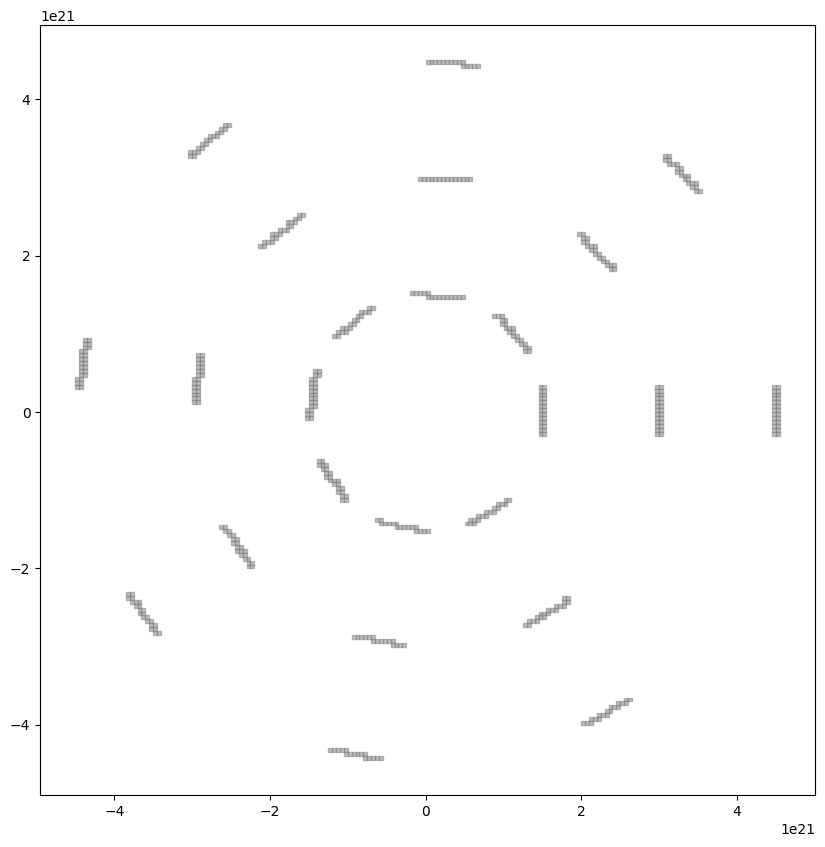

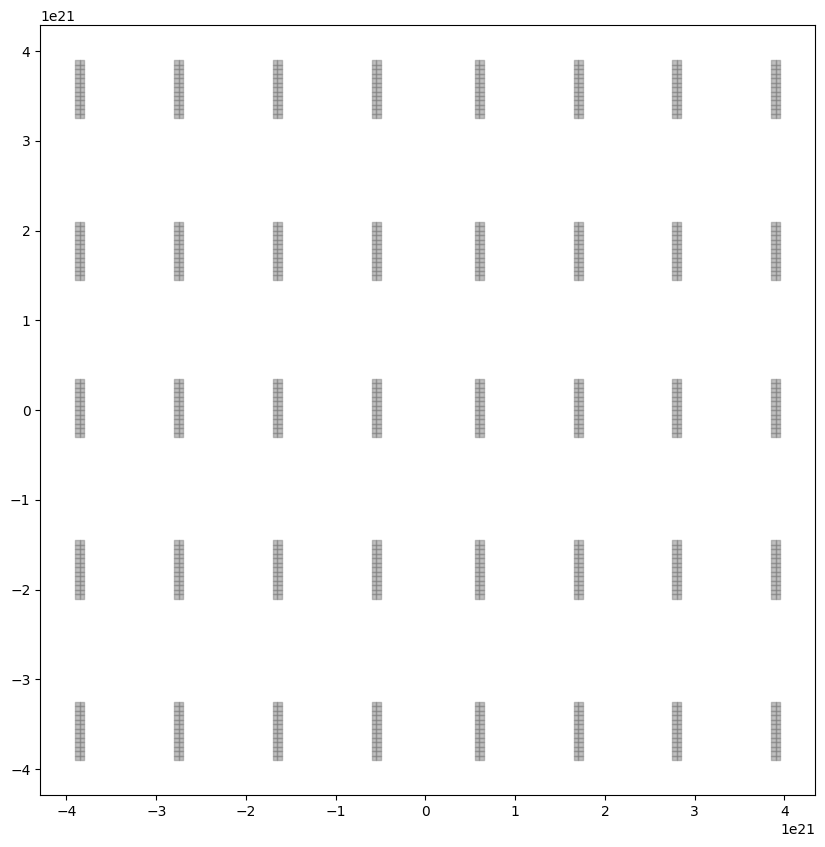

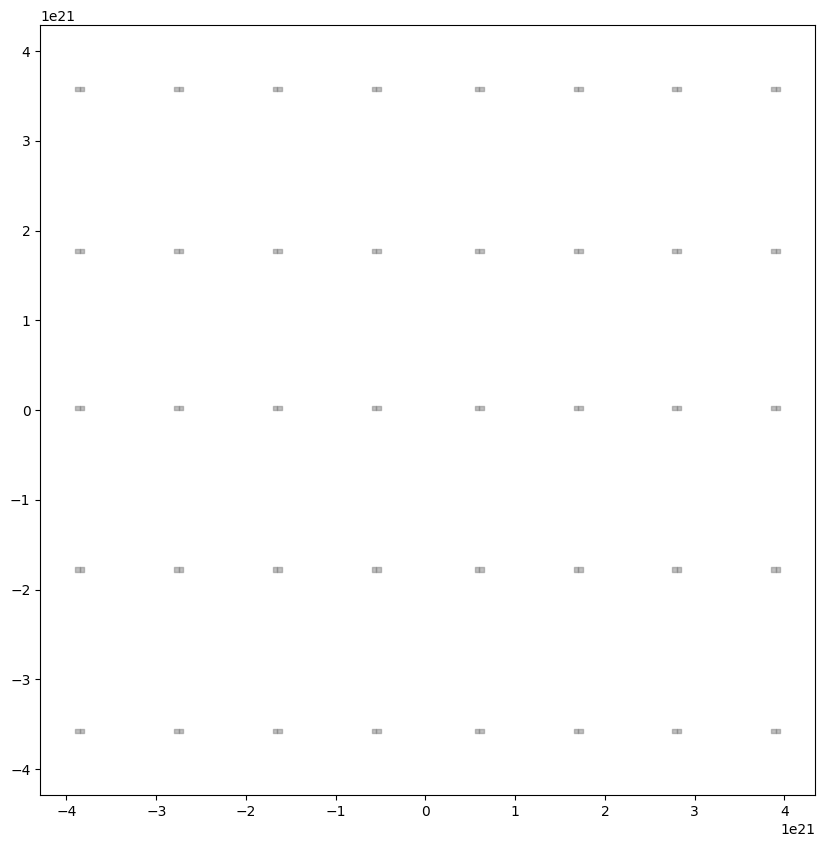

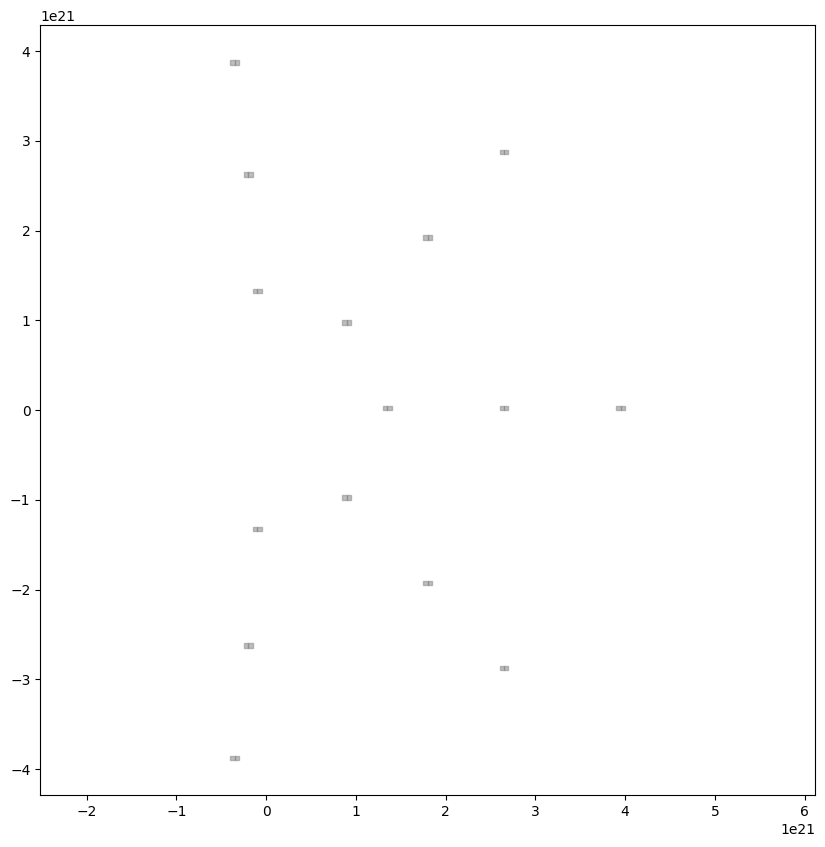

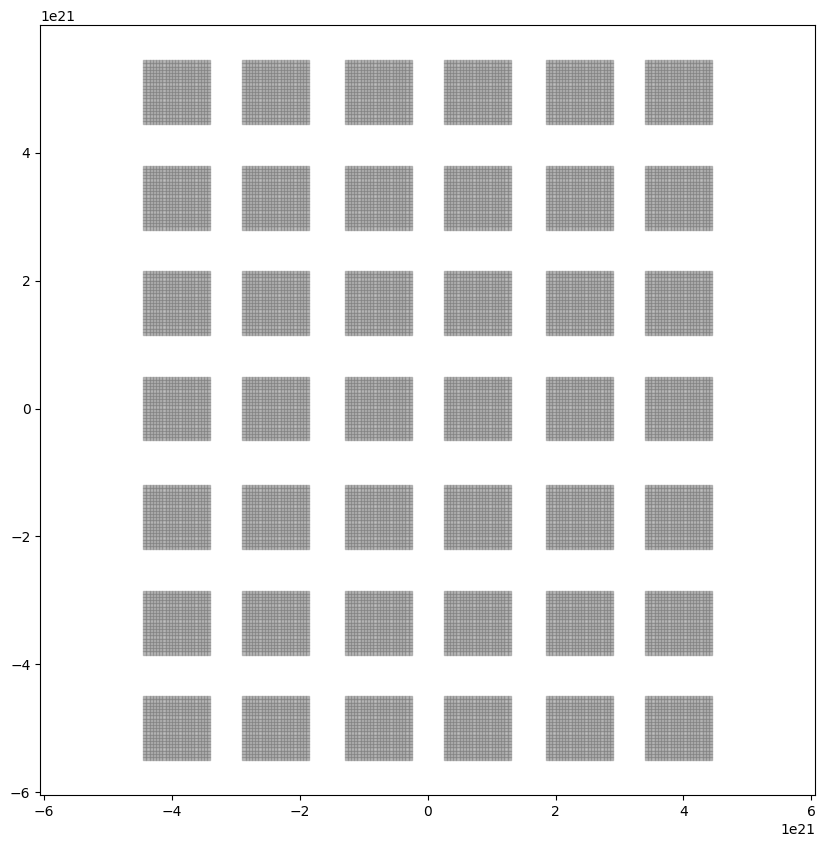

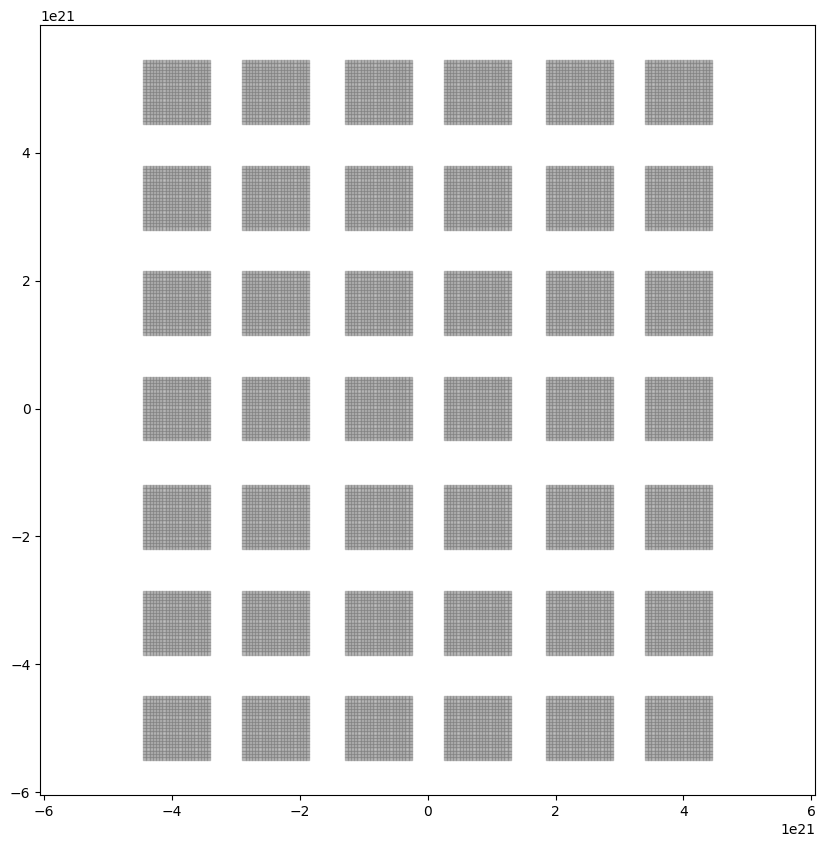

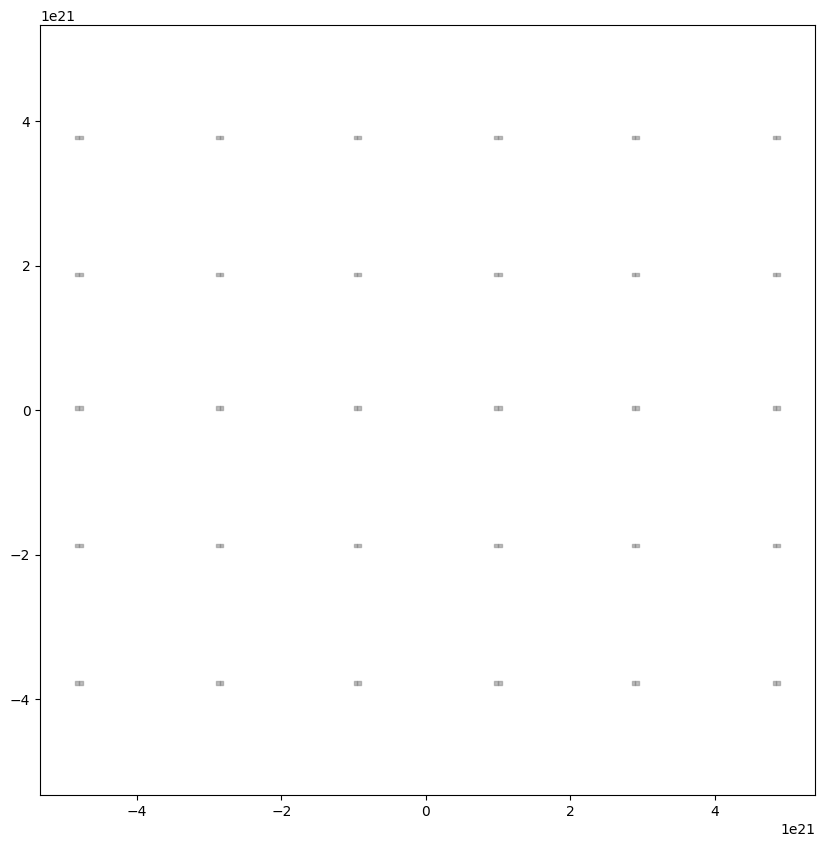

In [4]:
from src.grid.visualize_points import visualize_points


for i in range(COUNT - 1):
    visualize_points(
        child_vent_list[i].pattern.pattern_matrix,
        child_vent_list[i].pattern.pattern_unit.grid.k,
    )